# Portfolio Optimization of Some Indonesian-Based Banking Sector Stocks (Sample Project)
### By Muhammad Kevin Alrahmanto (muhammad.kevin@mail.ugm.ac.id)

In [1]:
getwd()

[1] "C:/Users/Kevin"

# 1. Load Libraries

In [283]:
library(pacman)
pacman::p_load(readxl, dplyr, tidyr, forcats, reactable, reactablefmtr, ggplot2, ggpubr, ggalluvial, ggsankey, plot3D, rgl,frenchdata,
               repr, psych, psy, polycor, Gifi, eRm, MPsychoR, mice, ShinyItemAnalysis, smacof, performance, MVN, gtheory,lubridate,stringr,
              lavaan,semPlot, corrplot, ggstance,rstatix, fPortfolio, fMultivar, car, quantmod, PerformanceAnalytics, magrittr , gbm, ISLR, metan,MASS,
              PortfolioAnalytics,reshape2,ROI, ROI.plugin.glpk, ROI.plugin.quadprog, ggridges, iClick, ggcorrplot, ggrepel)

# 2. Data Cleaning

In [3]:
tickers <- c('BBCA.JK','BBRI.JK', 'BRIS.JK', 'MEGA.JK', 'BBTN.JK', 'BBHI.JK',
             'BABP.JK', 'BBNI.JK', 'NISP.JK', 'BDMN.JK', 'BNGA.JK', 'BNLI.JK')
portfolioPrices <- NULL
for(ticker in tickers){
    portfolioPrices <- cbind(portfolioPrices,getSymbols.yahoo(ticker, from='2021-01-01',
                                            periodicity='daily', auto.assign=FALSE)[, 6])
}

In [4]:
portfolioPrices<- na.approx(portfolioPrices)

In [5]:
head(portfolioPrices)

           BBCA.JK.Adjusted BBRI.JK.Adjusted BRIS.JK.Adjusted MEGA.JK.Adjusted
2021-01-04         6461.678         3817.472         2318.609         6182.008
2021-01-05         6702.750         3782.043         2308.785         6182.008
2021-01-06         6565.669         3720.042         2465.979         6182.008
2021-01-07         6584.577         3790.900         2662.471         6535.265
2021-01-08         6664.934         3888.330         2809.840         7837.903
2021-01-11         6943.822         4118.619         2986.683         9405.483
           BBTN.JK.Adjusted BBHI.JK.Adjusted BABP.JK.Adjusted BBNI.JK.Adjusted
2021-01-04         1736.953              396               50         5954.959
2021-01-05         1727.409              424               50         6071.722
2021-01-06         1722.637              428               50         5978.311
2021-01-07         1727.409              432               50         6001.664
2021-01-08         1770.356              422        

In [6]:
summary(portfolioPrices)

     Index            BBCA.JK.Adjusted BBRI.JK.Adjusted BRIS.JK.Adjusted
 Min.   :2021-01-04   Min.   :5713     Min.   :3160     Min.   :1094    
 1st Qu.:2021-09-02   1st Qu.:6547     1st Qu.:3810     1st Qu.:1498    
 Median :2022-04-26   Median :7454     Median :4136     Median :1680    
 Mean   :2022-04-30   Mean   :7520     Mean   :4232     Mean   :1805    
 3rd Qu.:2022-12-22   3rd Qu.:8431     3rd Qu.:4495     3rd Qu.:2053    
 Max.   :2023-09-01   Max.   :9400     Max.   :5700     Max.   :3704    
 MEGA.JK.Adjusted BBTN.JK.Adjusted BBHI.JK.Adjusted BABP.JK.Adjusted
 Min.   : 4603    Min.   :1135     Min.   : 396     Min.   : 50     
 1st Qu.: 5175    1st Qu.:1310     1st Qu.:1592     1st Qu.: 87     
 Median : 5741    Median :1468     Median :2215     Median :123     
 Mean   : 6392    Mean   :1477     Mean   :2980     Mean   :154     
 3rd Qu.: 7581    3rd Qu.:1632     3rd Qu.:3918     3rd Qu.:189     
 Max.   :11547    Max.   :2052     Max.   :8025     Max.   :610     
 BBNI.

In [7]:
names(portfolioPrices) <- tickers

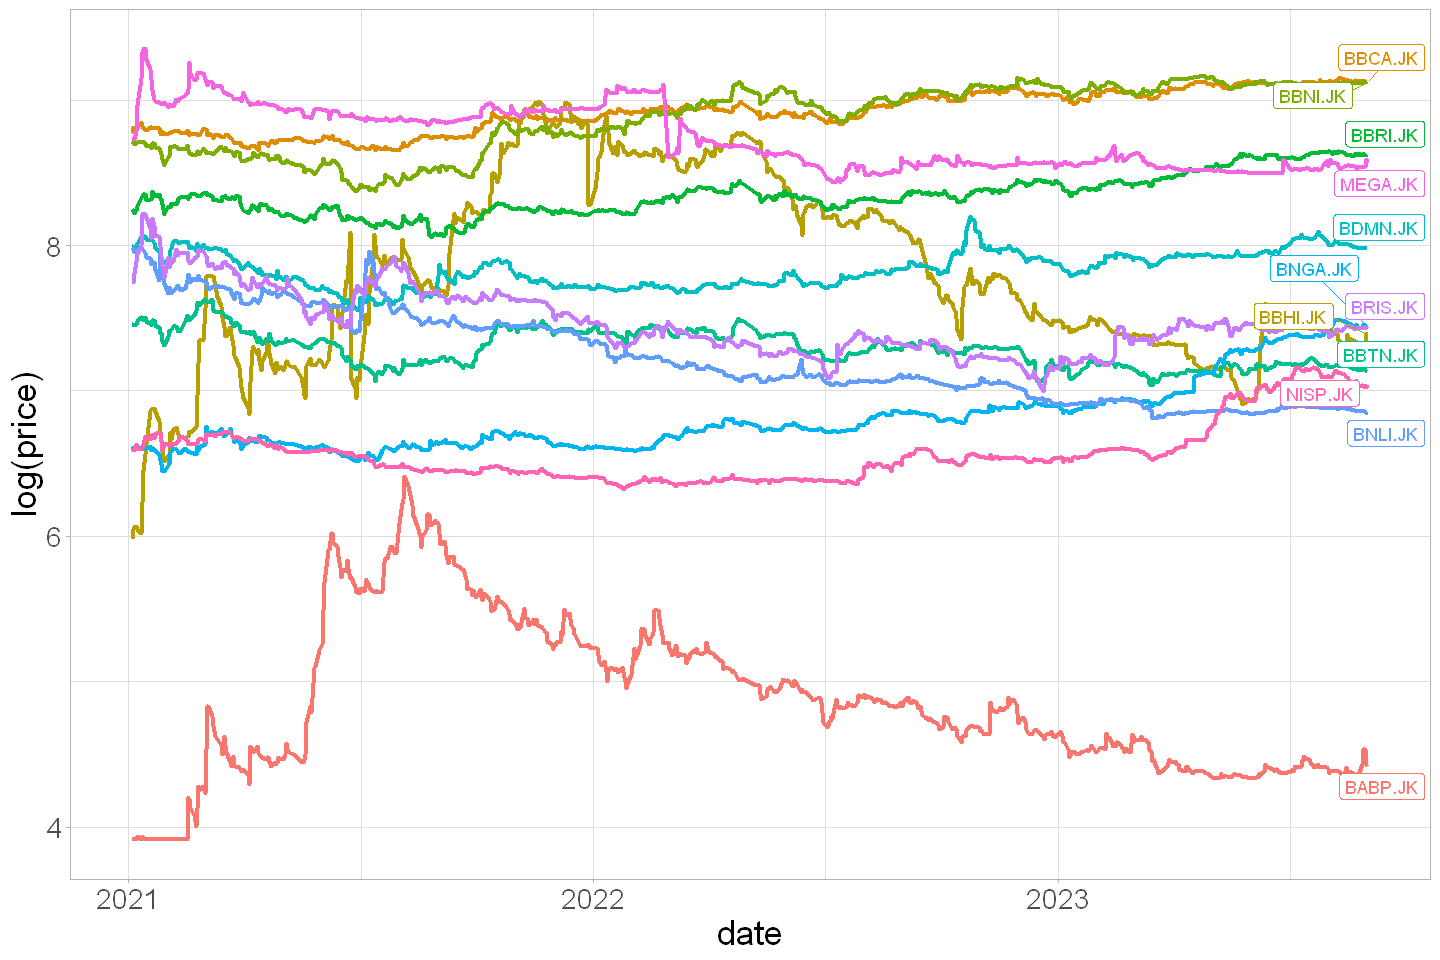

In [8]:
options(repr.plot.width=12, repr.plot.height=8)
dat_ends <- portfolioPrices %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)   %>%  mutate(Val=log(Val)) 
dat_ends  %>% mutate(label = if_else(date == max(date), as.character(Vars), NA_character_)) %>%
ggplot(aes(date, Val, colour=Vars)) + geom_line(aes(group=Vars, color=Vars), lwd=1.4) + theme_light() + theme(text=element_text(size=21))+
labs(y='log(price)')  + theme(legend.position = "none") +
geom_label_repel(aes(label = label),nudge_x = 1,na.rm = TRUE)

In [9]:
ts<- timeSeries(na.approx(portfolioPrices),
                units= tickers)
colSums(is.na(ts))

BBCA.JK BBRI.JK BRIS.JK MEGA.JK BBTN.JK BBHI.JK BABP.JK BBNI.JK NISP.JK BDMN.JK 
      0       0       0       0       0       0       0       0       0       0 
BNGA.JK BNLI.JK 
      0       0

In [10]:
ts_returns<- returns(ts, method='simple')*100
summary(data.frame(ts_returns))

    BBCA.JK            BBRI.JK            BRIS.JK             MEGA.JK         
 Min.   :-6.46154   Min.   :-9.09248   Min.   :-6.976749   Min.   :-39.67654  
 1st Qu.:-0.76104   1st Qu.:-0.90090   1st Qu.:-1.403504   1st Qu.: -0.64309  
 Median : 0.00000   Median : 0.00000   Median :-0.296736   Median :  0.00000  
 Mean   : 0.06427   Mean   : 0.07249   Mean   :-0.001849   Mean   :  0.02623  
 3rd Qu.: 0.82645   3rd Qu.: 0.95695   3rd Qu.: 0.970871   3rd Qu.:  0.49020  
 Max.   : 6.38299   Max.   : 6.12692   Max.   :23.684209   Max.   : 27.83209  
    BBTN.JK             BBHI.JK            BABP.JK           BBNI.JK        
 Min.   :-11.47697   Min.   :-63.2667   Min.   :-9.6774   Min.   :-6.55271  
 1st Qu.: -0.99010   1st Qu.: -2.2556   1st Qu.:-2.1739   1st Qu.:-0.85715  
 Median : -0.26177   Median : -0.3663   Median : 0.0000   Median : 0.00000  
 Mean   : -0.03046   Mean   :  0.4746   Mean   : 0.2127   Mean   : 0.08195  
 3rd Qu.:  0.84507   3rd Qu.:  1.4706   3rd Qu.: 1.2500   3rd 

In [11]:
data_arrange <- assetsArrange(ts_returns, method = "hclust")
ts_returns <- ts_returns[,data_arrange]

# 3. Exploratory Data Analysis 

## 3.1 Calendar 

Warning message:
"tz(): Don't know how to compute timezone for object of class timeDate; returning "UTC"."


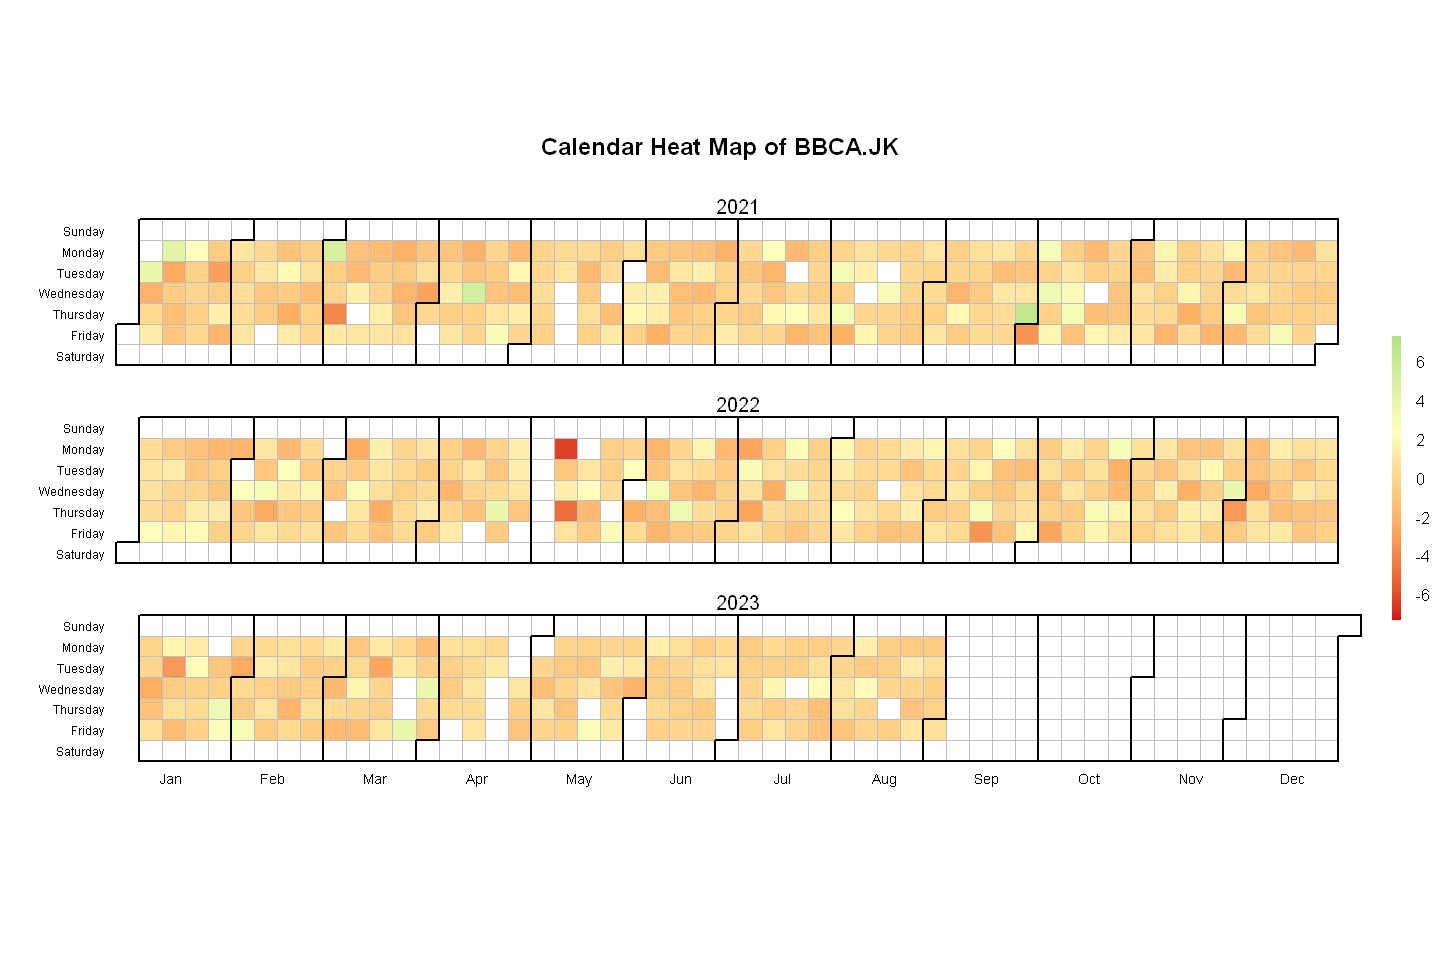

In [12]:
stock_ret_bbca <-ts_returns[, 'BBCA.JK']
calendarHeat(stock_ret_bbca, ncolors = 99, color='r2g', date.form='%Y-%m-%d')

## 3.2 Line Plot

### 3.2.1 Daily Return

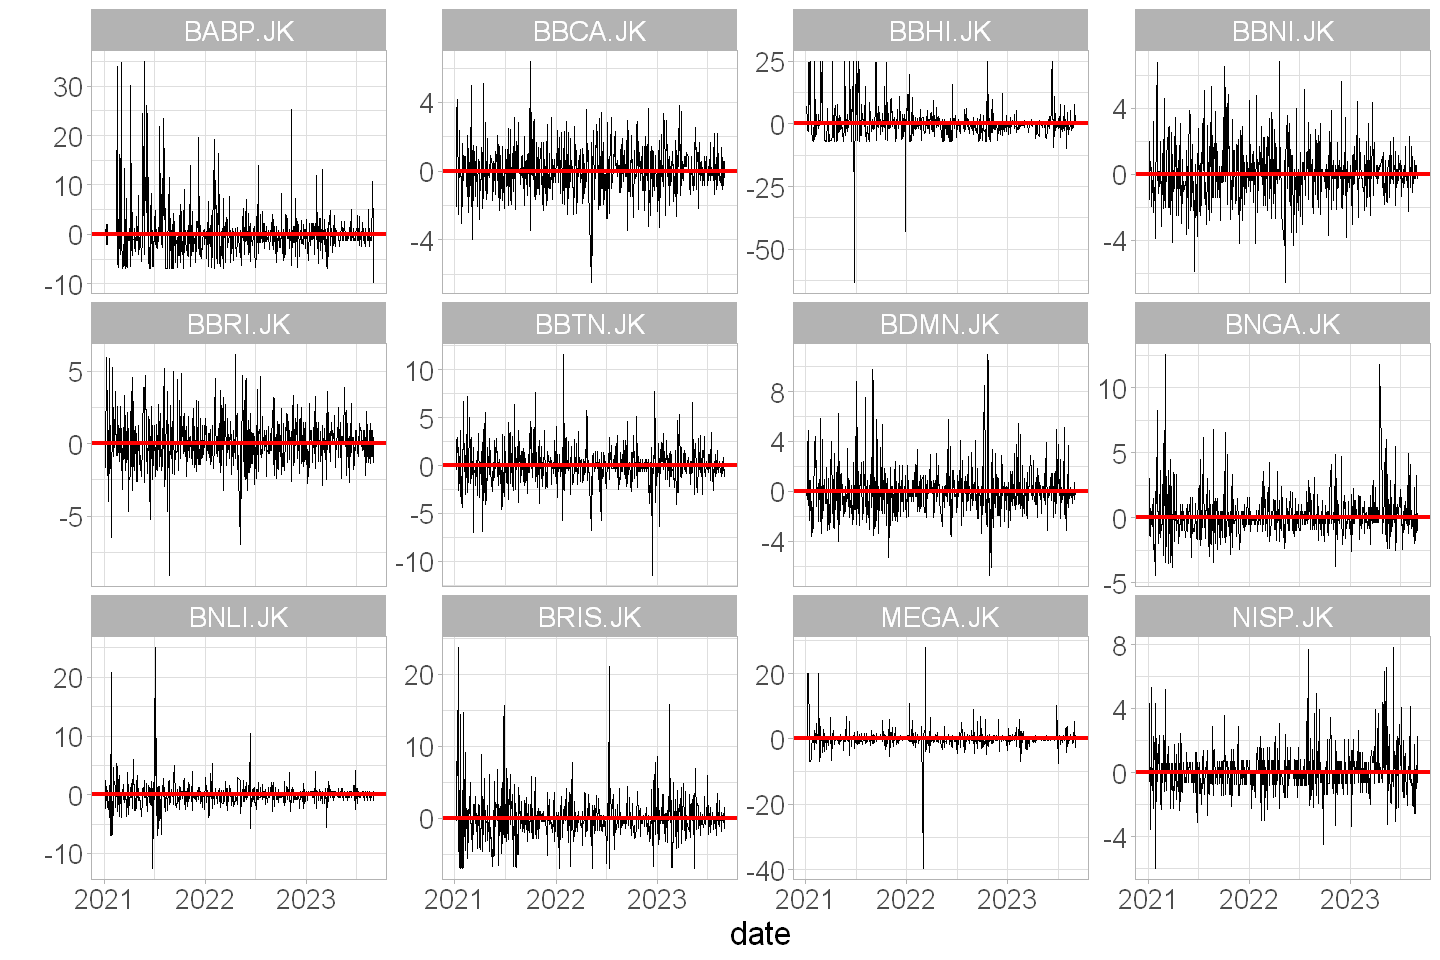

In [13]:
ts_returns  %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)  %>% 
ggplot(aes(date, Val)) + geom_line() + facet_wrap(~Vars, scales = 'free_y') + theme_light() + theme(text=element_text(size=20))+
geom_hline(yintercept = 0, col='red', lwd=1.2) + labs(y='') 

### 3.2.2 Drawdown

#### A. Drawdown Plot

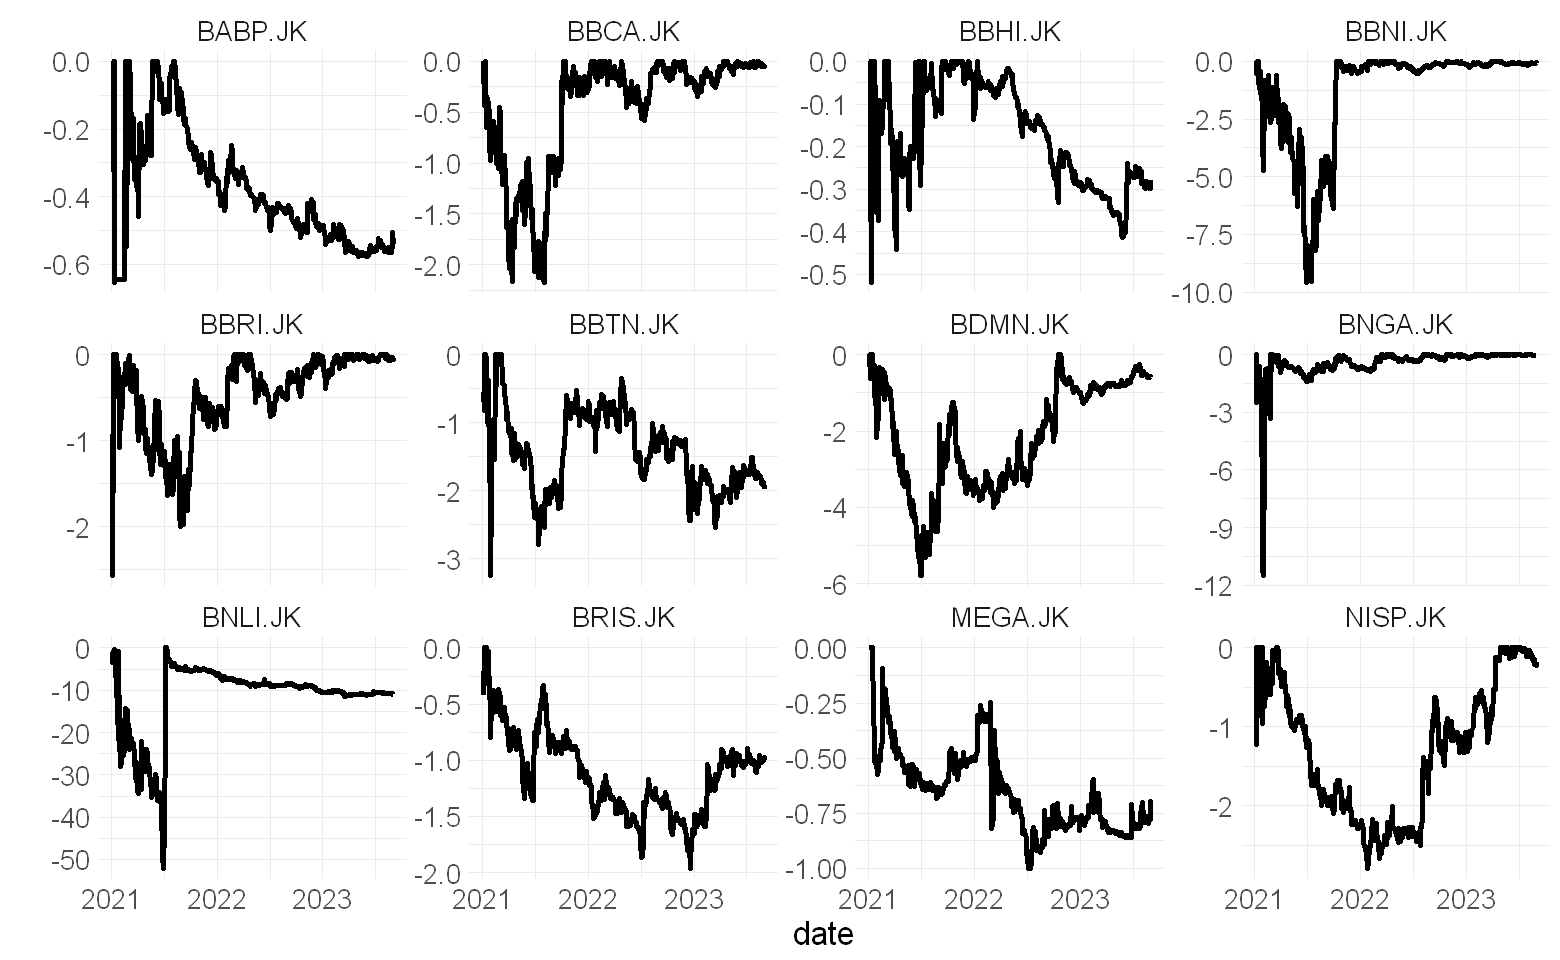

In [14]:
options(repr.plot.width=13, repr.plot.height=8)
Drawdowns(ts_returns, geometric = FALSE)  %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)  %>% 
ggplot(aes(date, Val)) + geom_line(lwd=1.5) + facet_wrap(~Vars,scales = 'free_y') + theme_minimal() + theme(text=element_text(size=20))+
labs(y='')

#### B. Drawdown Stat

In [15]:
stock<- 'BBCA.JK'
stock_dd <- table.Drawdowns(ts_returns[, stock], geometric = FALSE)
stock_dd

From       Trough     To         Depth   Length To Trough Recovery
1 2021-01-12 2021-08-02 2021-10-06 -2.1724 181    136       45      
2 2022-04-28 2022-07-13 2022-08-29 -0.5811  78     46       32      
3 2021-01-06 2021-01-06 2021-01-11 -0.4323   4      1        3      
4 2021-10-15 2021-11-02 2022-01-11 -0.3437  61     12       49      
5 2022-12-01 2023-01-13 2023-04-17 -0.3436  94     32       62

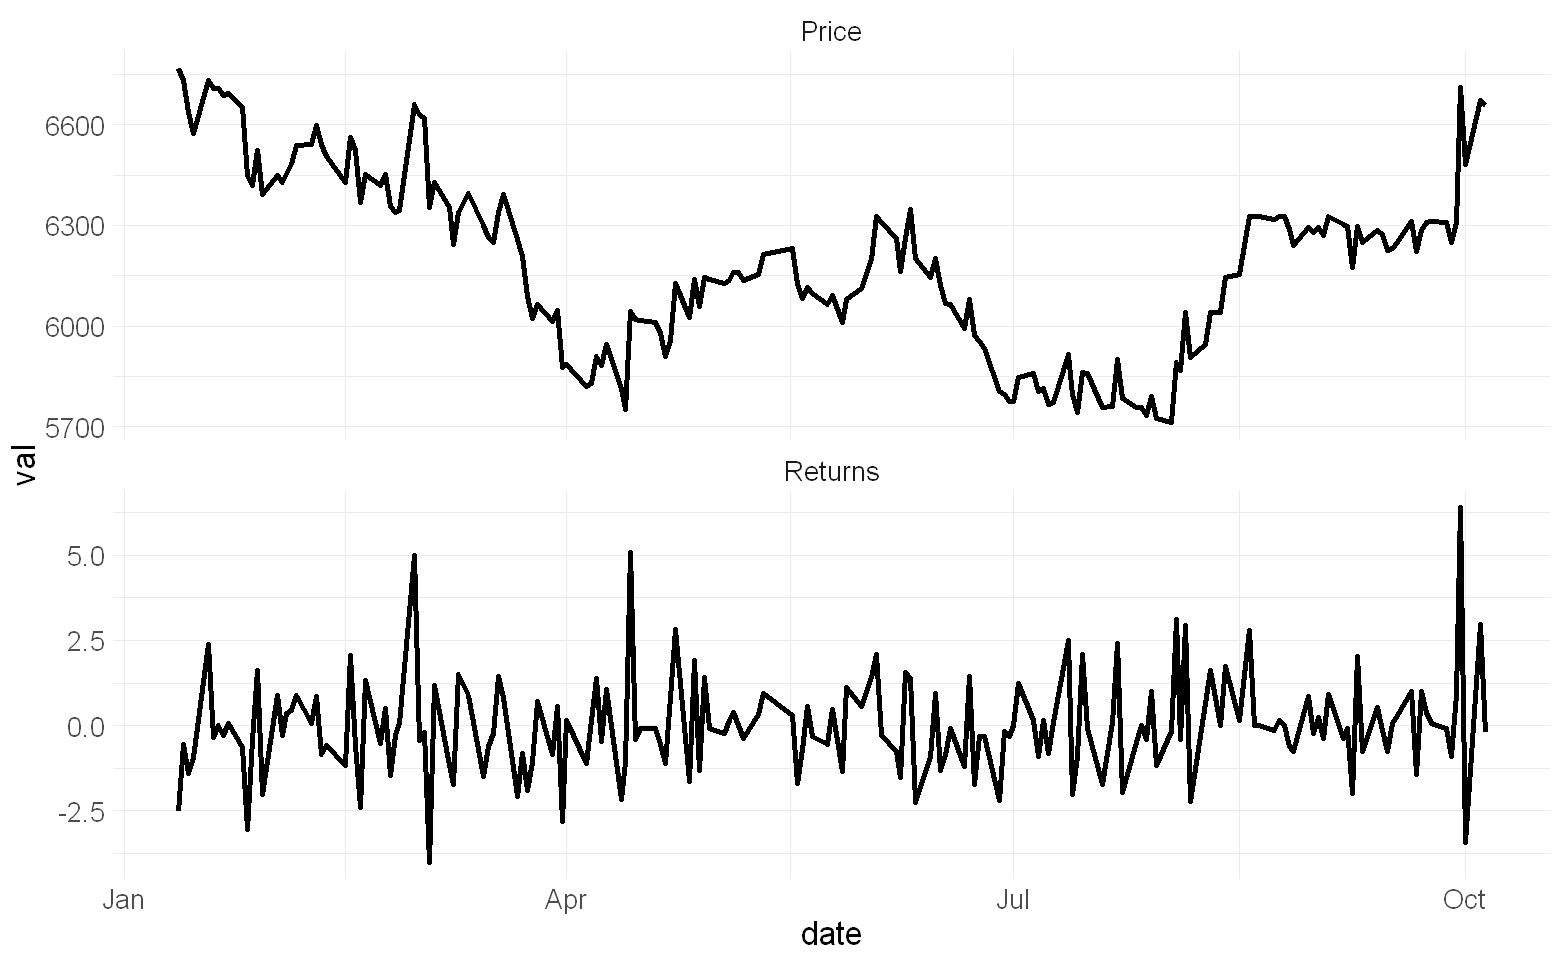

In [16]:
start<-stock_dd[1, 'From']
end<-stock_dd[1, 'To']
cbind(Returns=window(ts_returns[,stock], start = start, end = end),
      Price=window(ts[,stock], start = start, end = end))  %>% data.frame()  %>% 
mutate(date=as.Date(row.names(.)))  %>% gather('var', 'val', -date)  %>% ggplot(aes(date, val)) + geom_line(lwd=1.5) +
facet_wrap(~var, scale='free_y', nrow = 3) +  theme_minimal() + theme(text=element_text(size=20))

## 3.2 Descriptive Statistics

### 3.2.1 Table Stats

In [17]:
df_stat <- data.frame(t(round(basicStats(ts_returns),2)))
reactable(df_stat, pagination = FALSE,static = getOption("reactable.static", TRUE),
          defaultColDef = colDef(cell = data_bars(df_stat, fill_color = c("lightblue","royalblue","navy"))))

HTML widgets cannot be represented in plain text (need html)

### 3.2.2 Stats Comparison

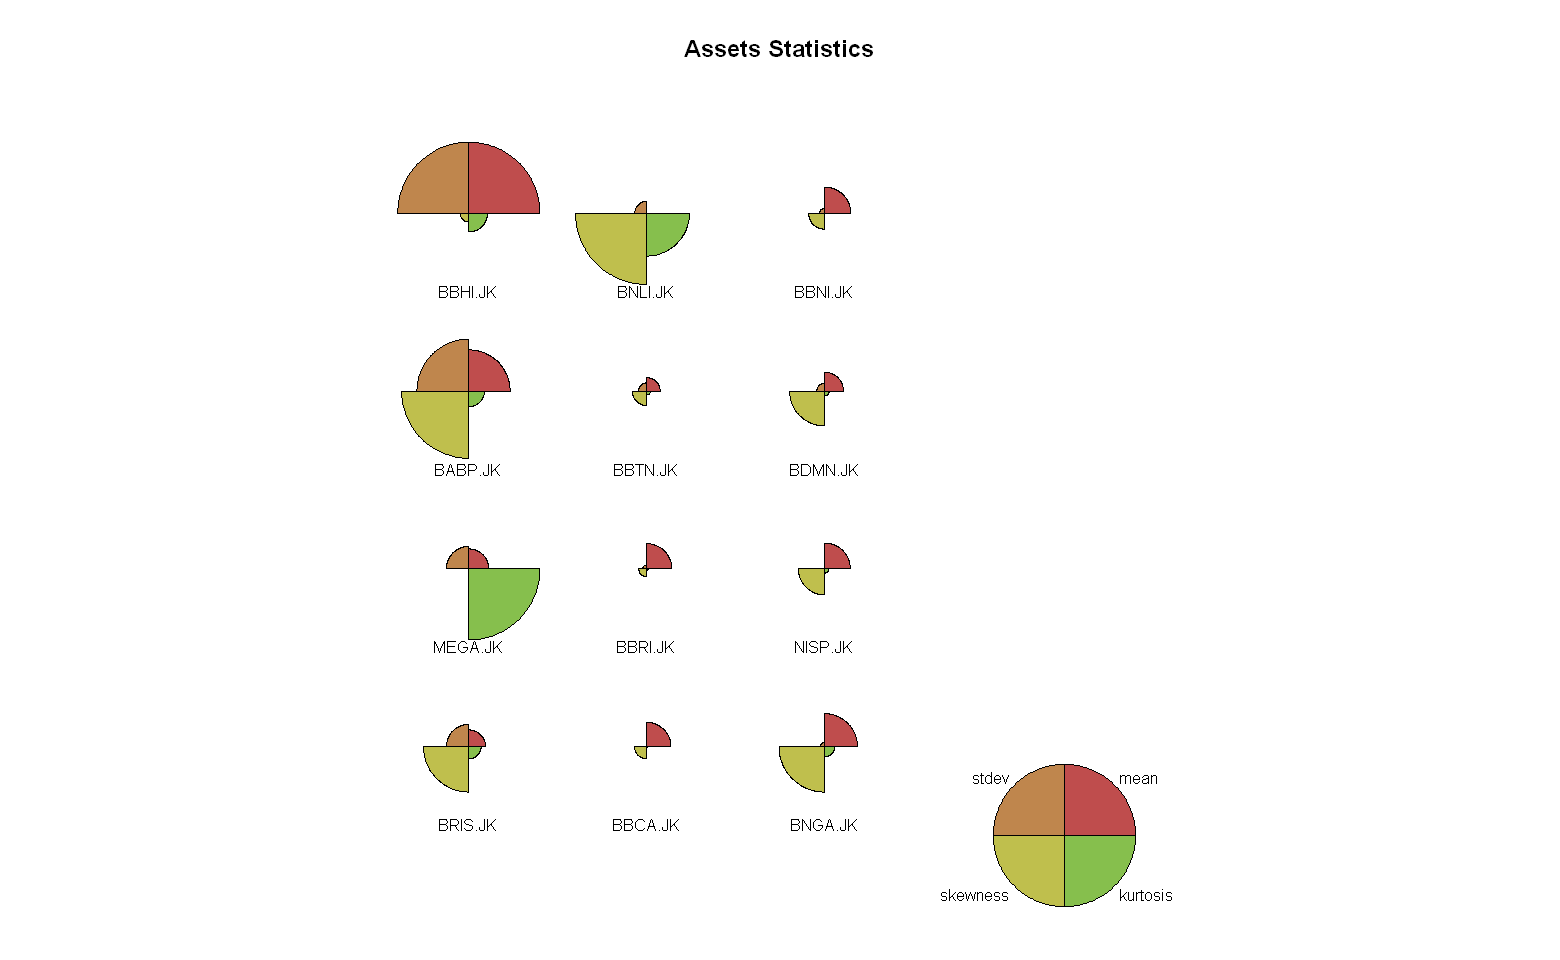

In [18]:
assetsMomentsPlot(ts_returns, title = "", description = "")

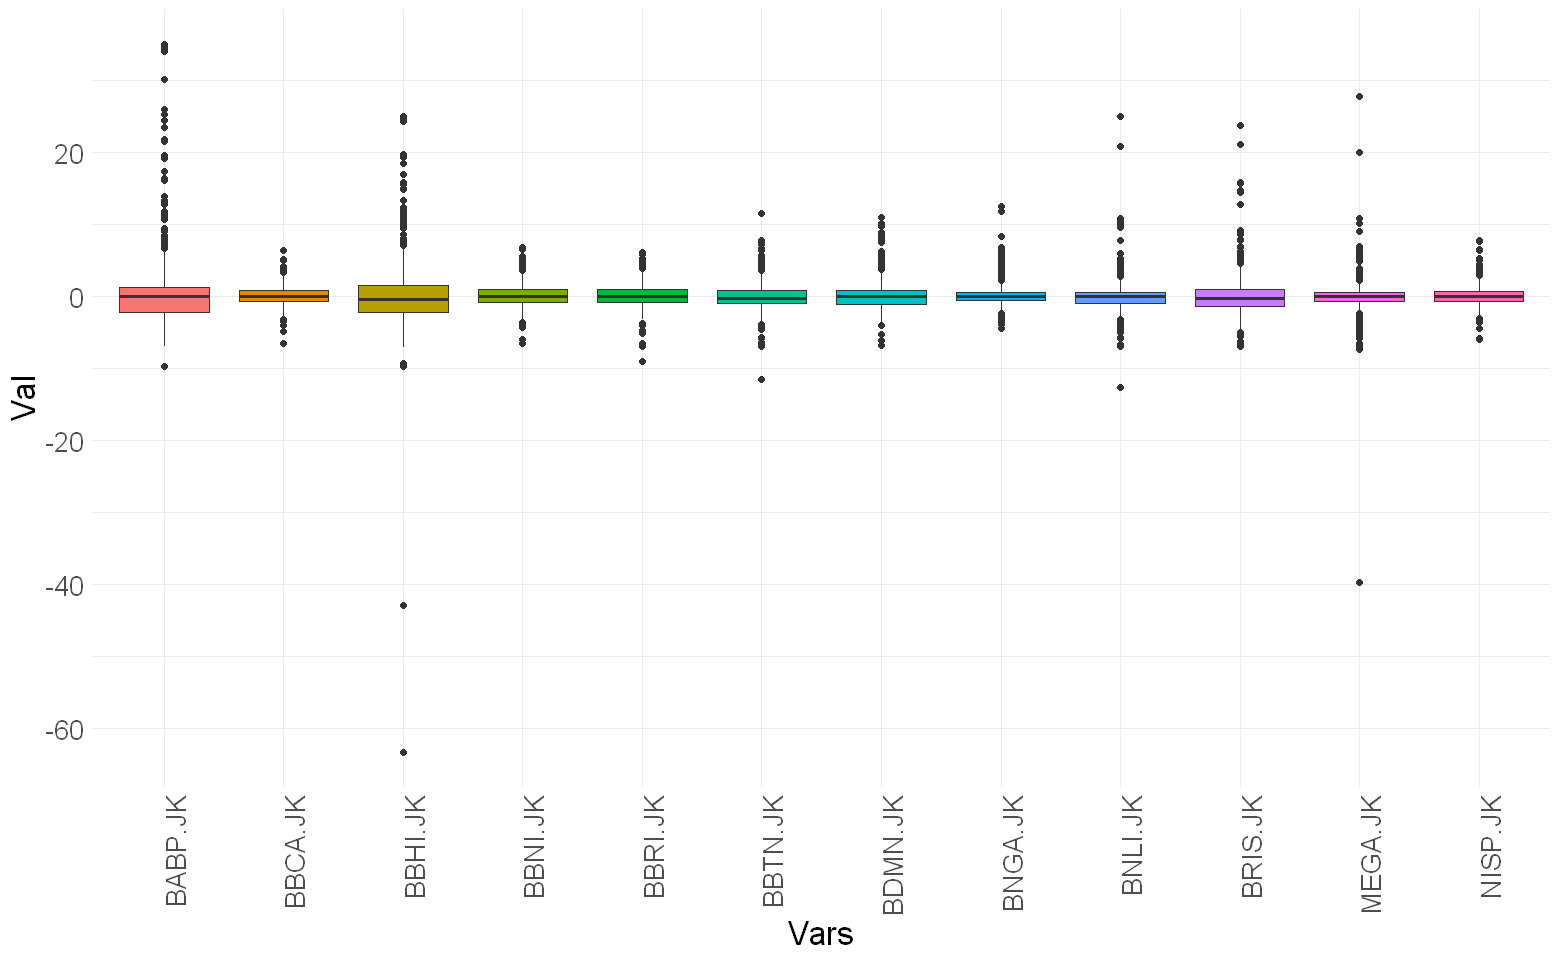

In [19]:
ts_returns  %>% data.frame()  %>% gather('Vars', 'Val')  %>% ggplot(aes(Vars, Val, fill=Vars)) + geom_boxplot() +
theme_minimal() + theme(text=element_text(size=20))  + theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))+
 theme(legend.position = "none")

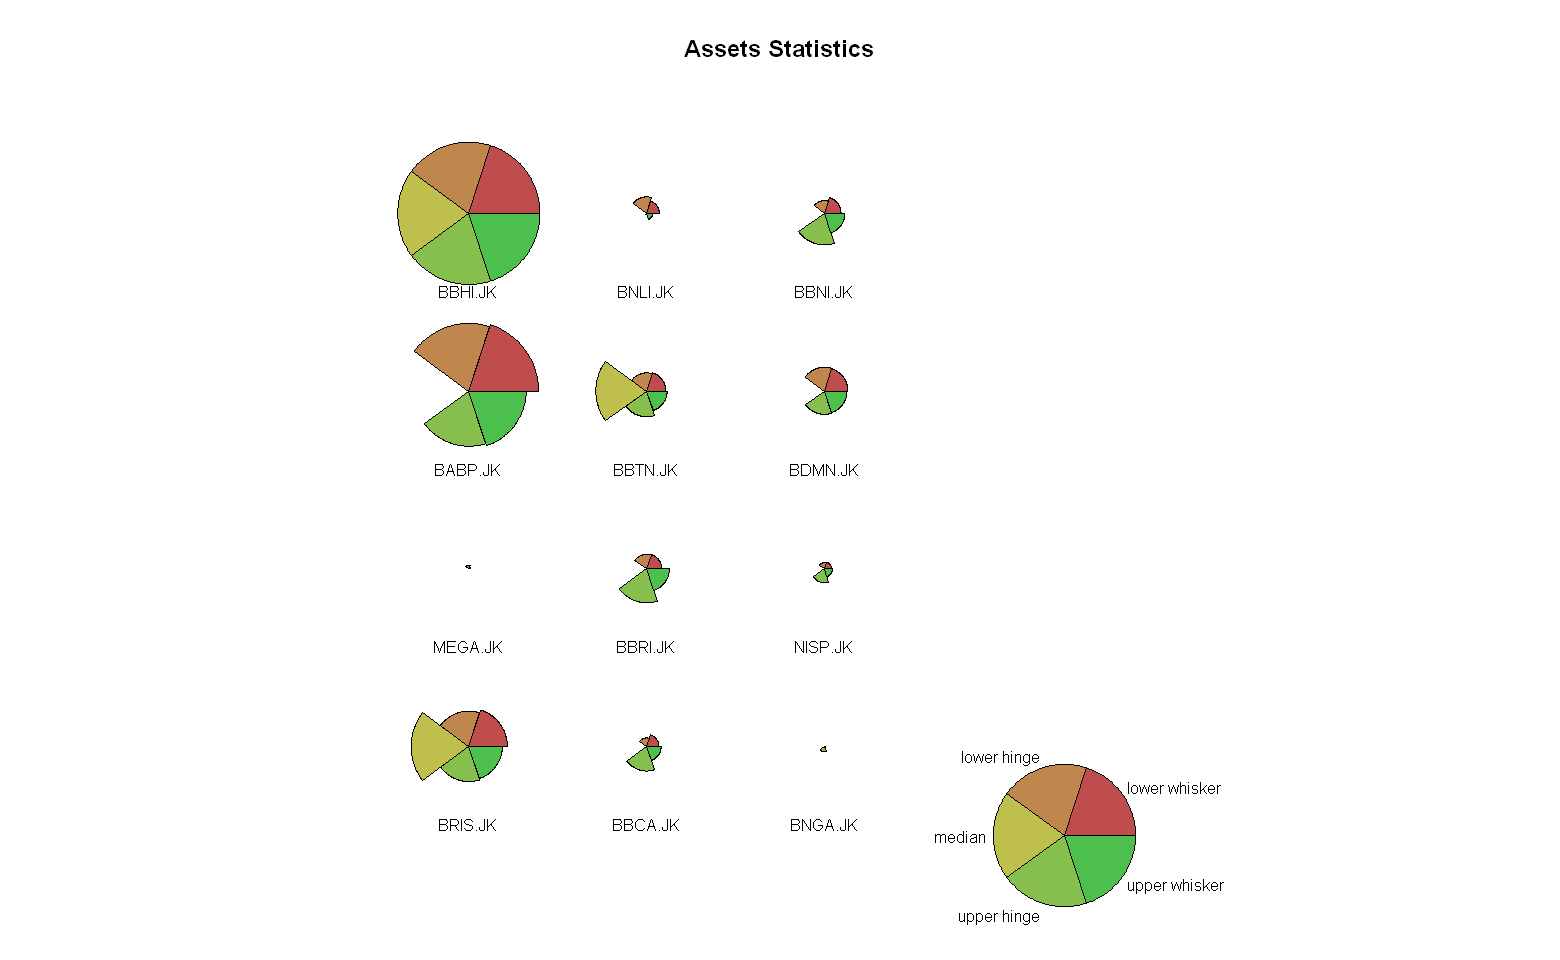

In [20]:
assetsBoxStatsPlot(ts_returns, title = "", description = "")

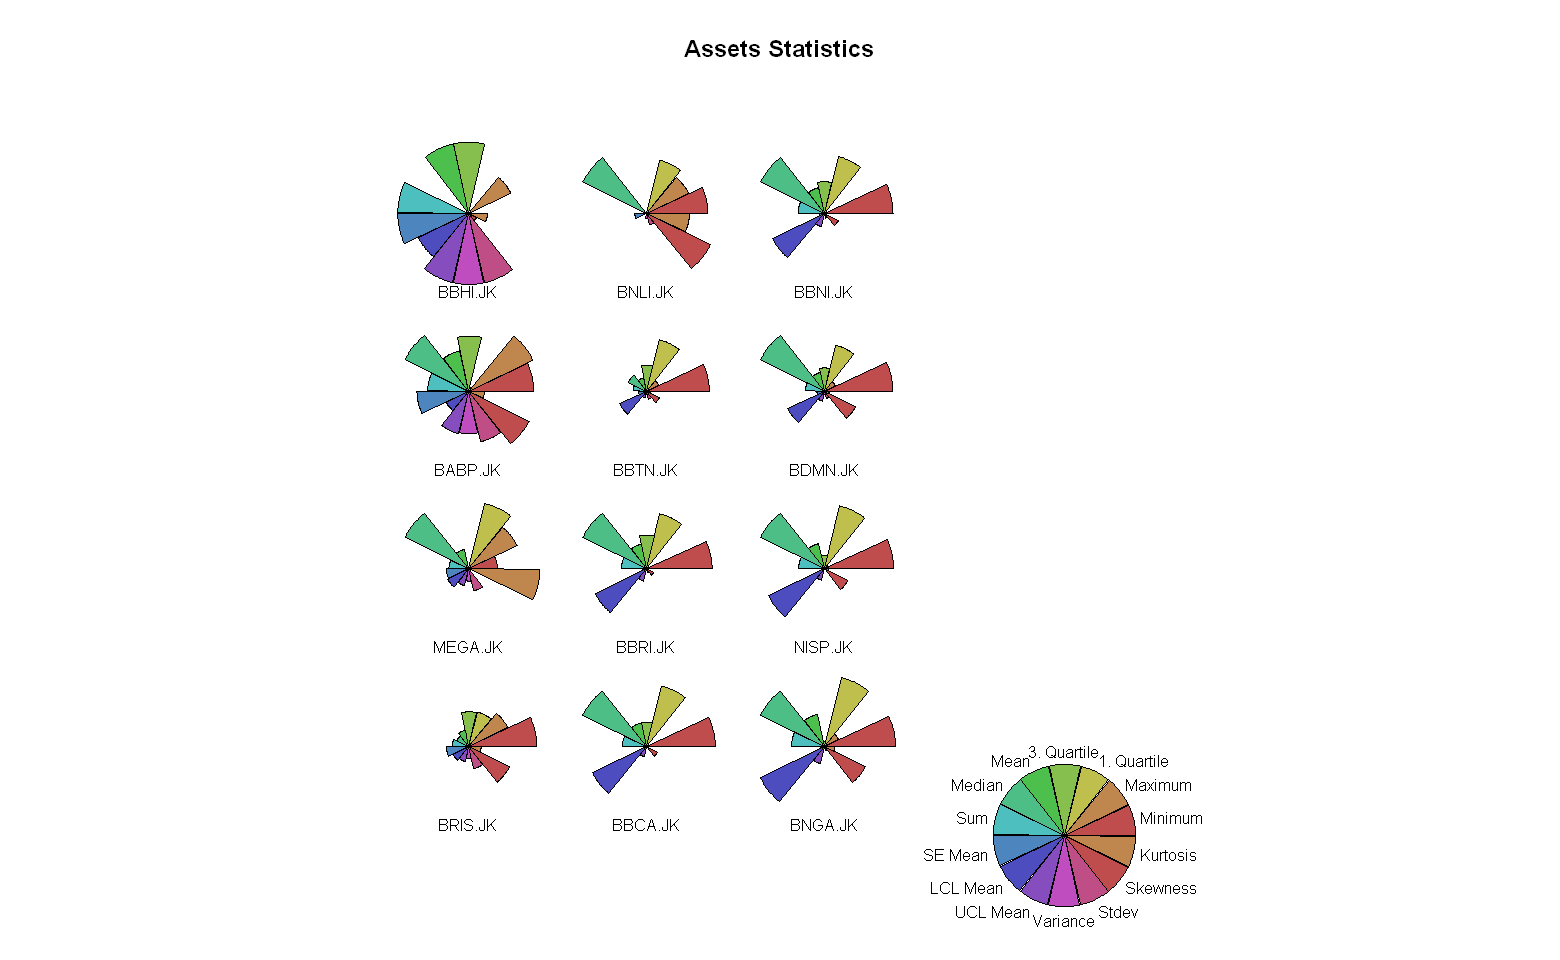

In [21]:
assetsBasicStatsPlot(ts_returns, title = "", description = "")

### 3.2.2 Rolling stats

In [22]:
by <- periods(time(ts_returns), "4m","1m")
rollapply <- function(x, by, FUN, ...){
    ans <- applySeries(x, from = by$from, to = by$to, by = NULL,
                       FUN = FUN, format = x@format,
                       zone = finCenter(x), FinCenter = finCenter(x),
                       title = x@title, documentation = x@documentation, ...)
    attr(ans, "by") <- data.frame(from = format(by$from), to = format(by$to) )
    ans
}

Warning message:
"ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


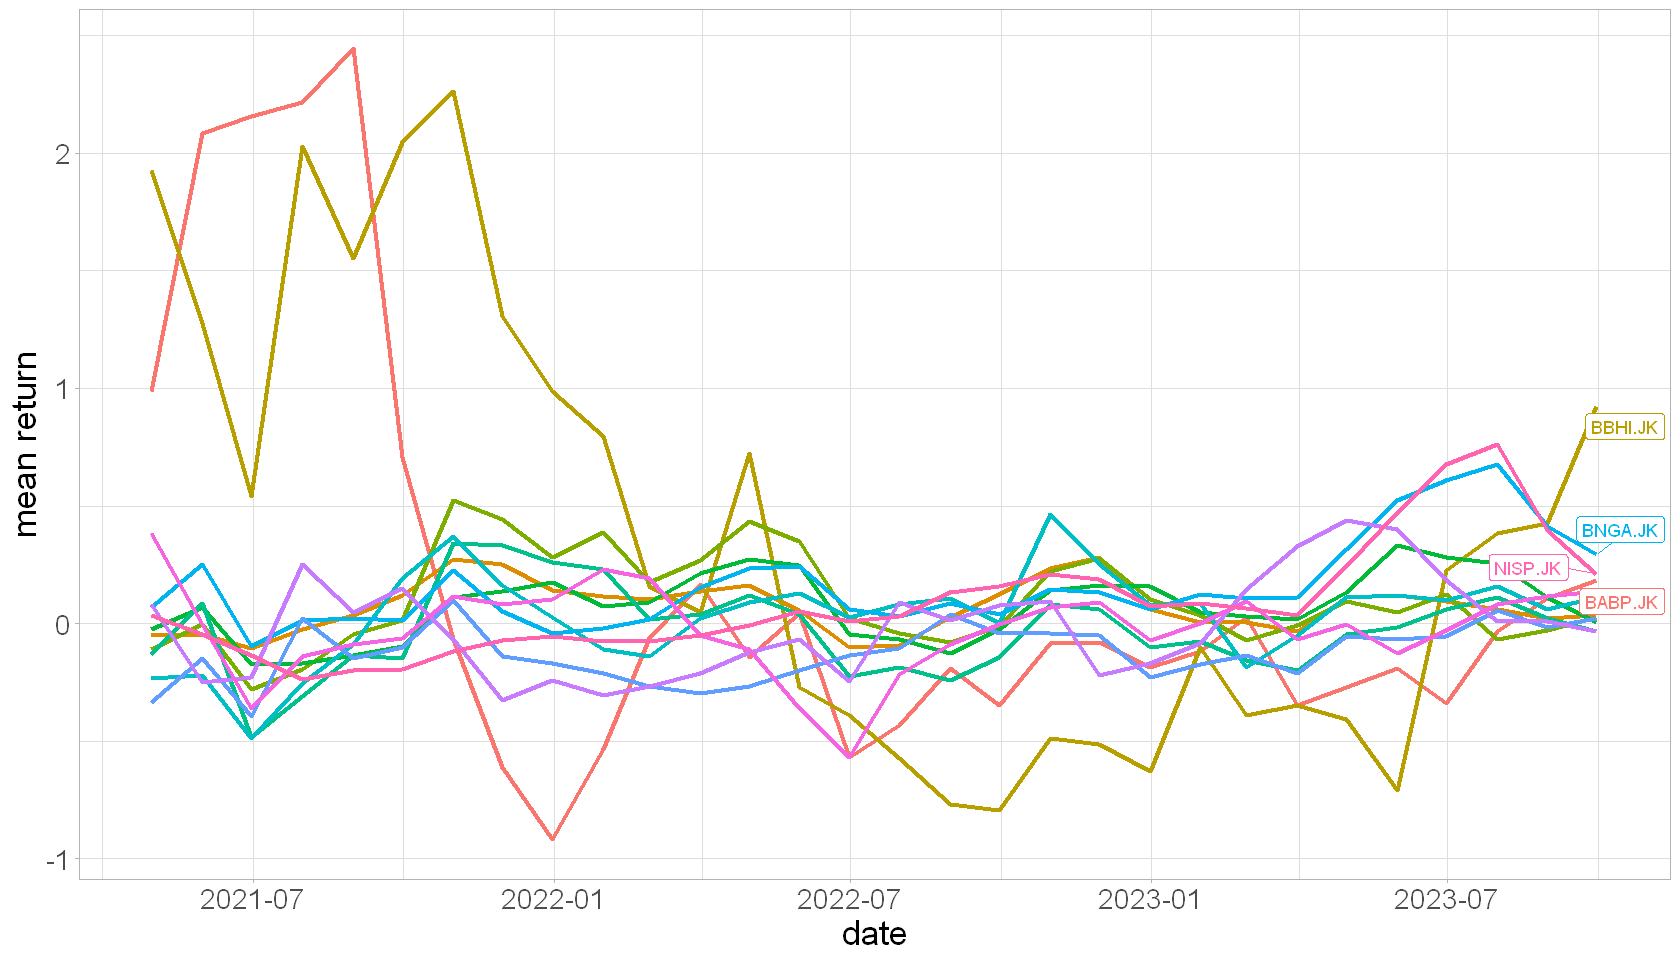

In [23]:
options(repr.plot.width=14, repr.plot.height=8)
ts.ROLL <- rollapply(ts_returns, by, FUN = "colMeans")
dat_ends <- ts.ROLL %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)
dat_ends %>% mutate(label = if_else(date == max(date), as.character(Vars), NA_character_)) %>%
ggplot(aes(date, Val, colour=Vars)) + geom_line(aes(group=Vars, color=Vars), lwd=1.4) + theme_light() + theme(text=element_text(size=21))+
labs(y='mean return')  + theme(legend.position = "none") +
geom_label_repel(aes(label = label),nudge_x = 1,na.rm = TRUE)

Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


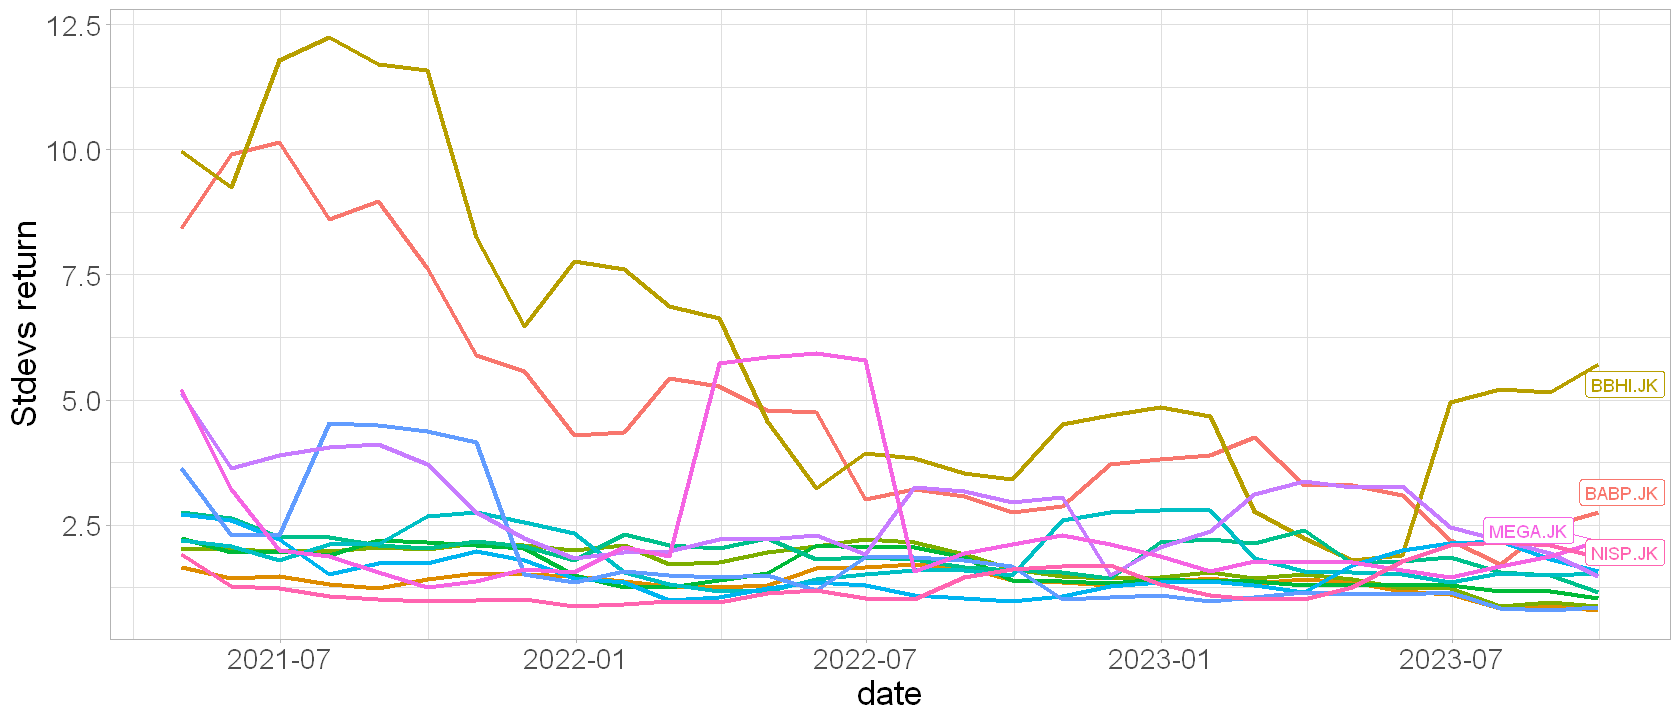

In [24]:
options(repr.plot.width=14, repr.plot.height=6)
ts.ROLL <- rollapply(ts_returns, by, FUN = "colStdevs")
dat_ends <- ts.ROLL %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)
dat_ends %>% mutate(label = if_else(date == max(date), as.character(Vars), NA_character_)) %>%
ggplot(aes(date, Val, colour=Vars)) + geom_line(aes(group=Vars, color=Vars), lwd=1.4) + theme_light() + theme(text=element_text(size=21))+
labs(y='Stdevs return')  + theme(legend.position = "none") +
geom_label_repel(aes(label = label),nudge_x = 1,na.rm = TRUE)

### 3.2.3 Risk vs Return

#### A. Static Mean/Std

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


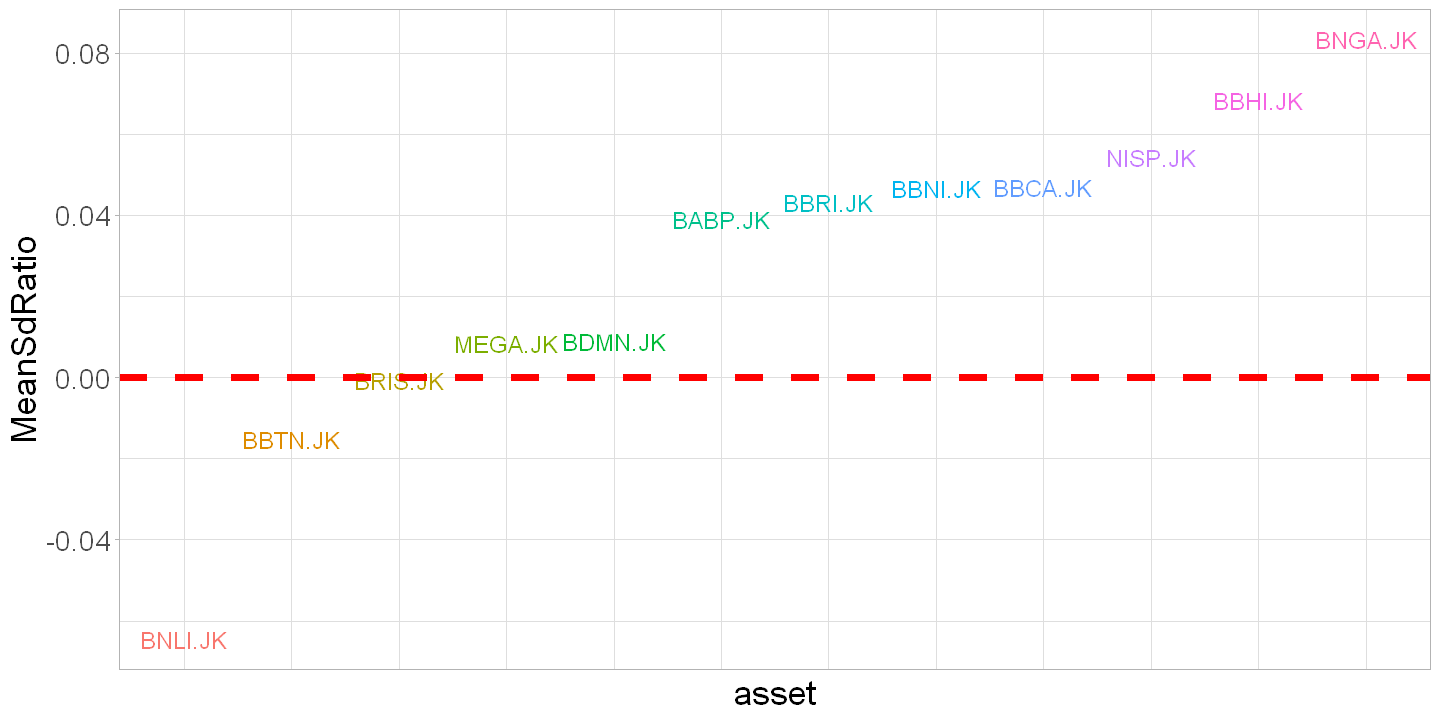

In [25]:
options(repr.plot.width=12, repr.plot.height=6)
mean_sd <- sort(colMeans(ts_returns)/colStdevs(ts_returns))  %>% data.frame() 
names(mean_sd) <-'MeanSdRatio'
mean_sd$asset <- factor(rownames(mean_sd), levels=rownames(mean_sd))
mean_sd  %>% ggplot(aes(asset, MeanSdRatio, label=asset, color=asset)) + geom_text(size=5)+ 
theme_light() + theme(text=element_text(size=21)) + geom_hline(yintercept=0, linetype="dashed", 
                color = "red", size=2) + theme(legend.position = "none") +theme(axis.text.x=element_blank(),axis.ticks.x=element_blank() )

In [26]:
mean_sd_roll <- function(data) {
    return(colMeans(data)/colStdevs(data))}

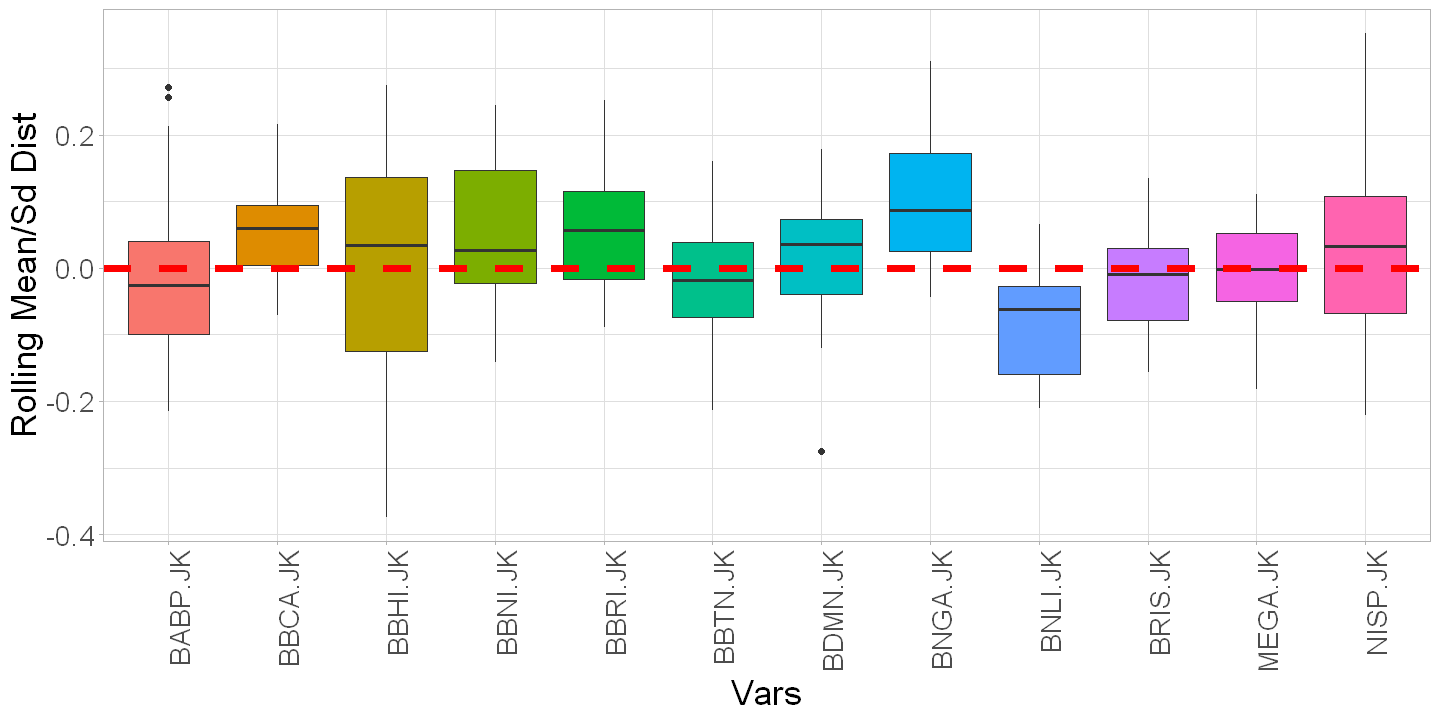

In [27]:
results <- sapply(1:length(by$from), function(x) mean_sd_roll(window(ts_returns,by$from[x],by$to[x] )))
results  %>% t()  %>% data.frame()  %>% mutate(date=as.Date(data.frame(by$from)[,1]))  %>% 
gather('Vars','Val', -date)  %>% ggplot(aes(Vars, Val, fill=Vars)) + geom_boxplot()  + theme_light() + theme(text=element_text(size=21))+
labs(y='Rolling Mean/Sd Dist')  + theme(legend.position = "none") + geom_hline(yintercept=0, linetype="dashed", 
                color = "red", size=2) + theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))

#  4. Clustering

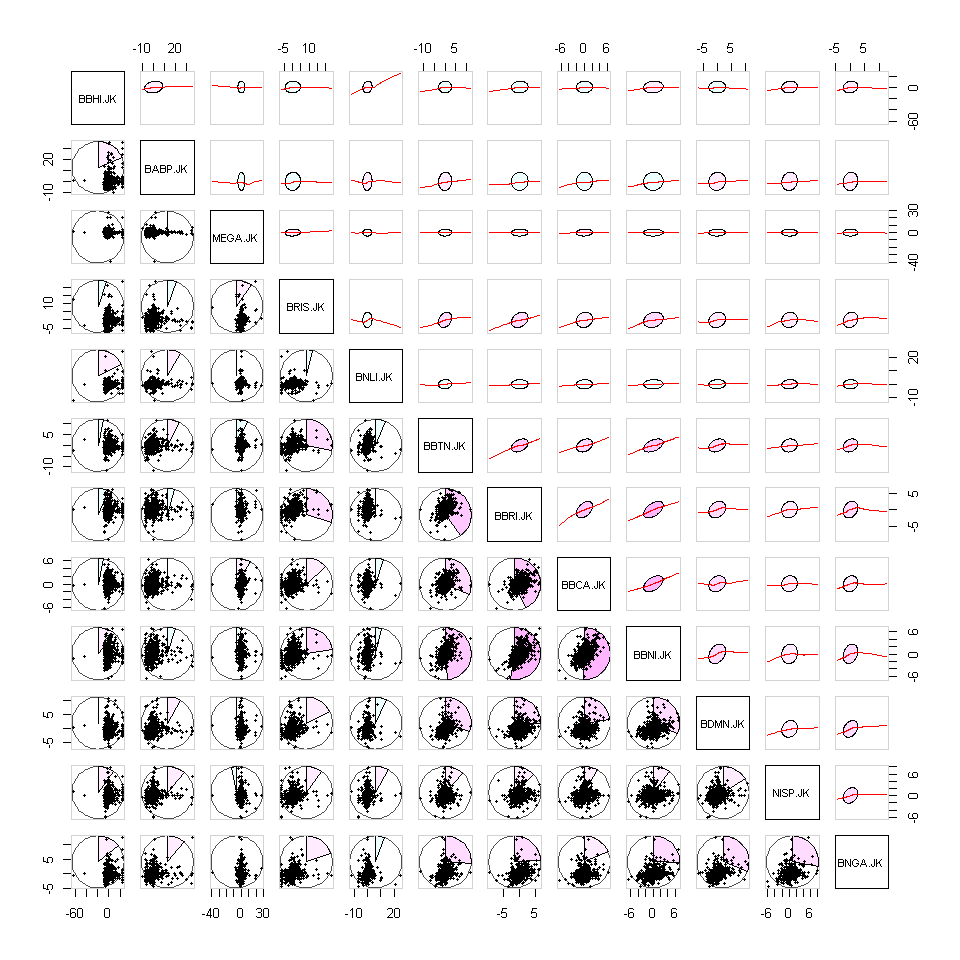

In [28]:
options(repr.plot.width=8, repr.plot.height=8)
assetsCorgramPlot(ts_returns, pch = 19, cex = 0.5)

## 3.3.1 Eigenvalue

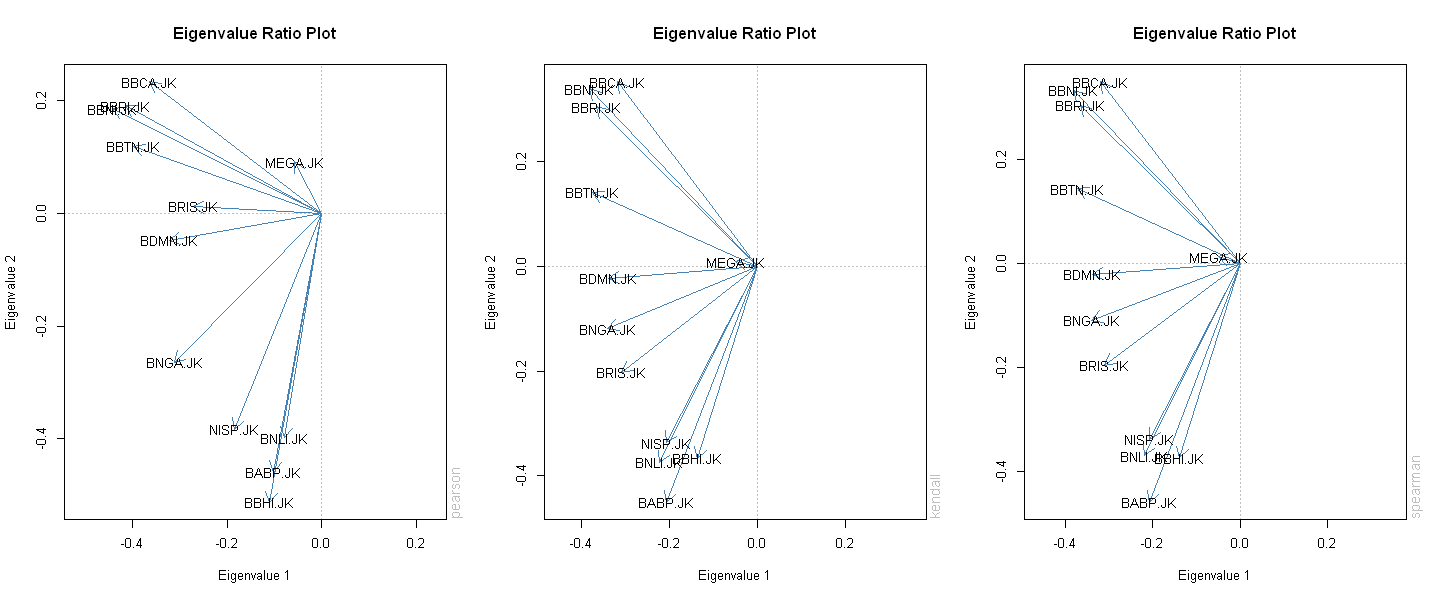

In [29]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1, 3))
assetsCorEigenPlot(ts_returns, method = "pearson")
assetsCorEigenPlot(ts_returns, method = "kendall")
assetsCorEigenPlot(ts_returns, method = "spearman")
options(repr.plot.width=12, repr.plot.height=5)

## 3.3.2 KNN

In [30]:
knn_ret<- assetsSelect(ts_returns, "kmeans", control = c(centers = 3, algorithm = "Hartigan-Wong"))
knn_ret

K-means clustering with 3 clusters of sizes 10, 1, 1

Cluster means:
  2021-01-05 2021-01-06 2021-01-07 2021-01-08 2021-01-11 2021-01-12 2021-01-13
1  0.0709959 -0.3281090  2.6292631   2.964323   4.588136   4.126775  0.3757834
2  0.0000000  0.0000000  0.0000000   2.000000  -1.960784   2.000000 -1.9607843
3  7.0707071  0.9433962  0.9345794  -2.314815  -2.843602  24.390244 24.5098039
  2021-01-14 2021-01-15 2021-01-18 2021-01-19 2021-01-20 2021-01-21 2021-01-22
1   0.328805  -2.406672  -1.438613  -2.145496   2.525394  -1.820563  -2.265215
2   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
3  11.811024   7.746479  24.836601   1.047120   0.000000   1.036269  -2.051282
  2021-01-25 2021-01-26 2021-01-27 2021-01-28 2021-01-29 2021-02-01 2021-02-02
1  -1.292684 -0.3292913  -2.915846  -3.634135  -2.518219   3.033187   0.494252
2   0.000000  0.0000000   0.000000   0.000000   0.000000   0.000000   0.000000
3  -6.806283 -6.7415730  -6.626506  -6.451613  -6.896552   4.444444  -6.382979
  2021-02-03 2021-02-04 2021-02-05 2021-02-08 2021-02-09 2021-02-10  2021-02-11
1   2.152481  0.2870825   1.211472   1.636006 -0.6278202   0.366117 -0.07092227
2   0.000000  0.0000000   0.000000   0.000000  0.0000000   0.000000  0.00000000
3  25.000000 -4.8484848   7.006369   1.190476 -4.1176471  -2.453988  0.62893082
  2021-02-15 2021-02-16 2021-02-17 2021-02-18 2021-02-19  2021-02-22 2021-02-23
1   1.308136   1.179267 -0.9582591  0.9352281 -0.5772426  0.02538981  0.1590244
2   0.000000   0.000000 34.0000000 -1.4925373 -6.0606061 -4.83870968 -6.7796610
3  -1.875000   1.910828  0.0000000  3.7500000 -0.6024096  1.81818182  1.1904762
  2021-02-24 2021-02-25 2021-02-26 2021-03-01 2021-03-02 2021-03-03 2021-03-04
1   2.174795  0.7273124  -1.044215   2.045065  -1.102745   1.058208  -1.929151
2  12.727273 16.1290323  -2.777778   2.857143  -4.166667  34.782609  34.408602
3  24.705882 25.0000000  16.981132   0.000000  24.838710  24.547804   0.000000
  2021-03-05 2021-03-08 2021-03-09 2021-03-10 2021-03-12  2021-03-15 2021-03-16
1 -0.4332664  0.5450906  -1.881305  0.1771417  0.5473373  0.07416953  0.0941449
2  0.0000000 -6.4000000  -6.837607 -6.4220183 -1.9607843 -4.00000000 -6.2500000
3  0.0000000  0.0000000   0.000000 -6.6390041 -6.6666667 -6.90476190 -6.9053708
  2021-03-17 2021-03-18 2021-03-19 2021-03-22 2021-03-23 2021-03-24 2021-03-25
1  -1.108384   1.114631 -0.9510321 -0.6117142  -1.236388  -1.969227  -1.273165
2  13.333333  -6.862745 -4.2105263 -6.5934066  -2.352941   7.228916  -6.741573
3  -6.868132  -6.194690  0.6289308  6.2500000  -5.294118  -6.832298  -7.000000
  2021-03-26 2021-03-29 2021-03-30 2021-03-31 2021-04-01 2021-04-05 2021-04-06
1   1.911026  -1.177185  -2.454206  -1.980760  0.7123496 -0.8108146   0.890988
2   0.000000  -1.204819  -1.219512  -1.234568  1.2500000 -3.7037037  -6.410256
3  -1.075269  -6.884058  -6.614786  -6.666667 -6.6964286 -6.6985646  -4.615385
  2021-04-07 2021-04-08 2021-04-09 2021-04-12 2021-04-13 2021-04-14  2021-04-15
1 -0.5041324   1.501354  0.4756229  -2.474914 -0.3991296   2.335870 -0.05075344
2 30.1369863  -1.052632 -3.1914894   4.395604 -4.2105263  -1.098901 -1.11111111
3 24.7311828  25.000000  2.7586207  -5.369128  3.1914894  -6.872852 -6.64206642
   2021-04-16 2021-04-19 2021-04-20 2021-04-21 2021-04-22 2021-04-23 2021-04-26
1 -0.09649766  0.5518291  -1.058725 -1.0275971  0.8839224 -0.4616589  -1.145428
2 -1.12359551 -1.1363636   1.149425  0.0000000 -2.2727273 -3.4883721   2.409639
3  6.32411067  5.9479554   7.368421 -0.6535948 -6.9078947 -6.7137809  -6.439394
  2021-04-27 2021-04-28 2021-04-29 2021-04-30 2021-05-03 2021-05-04 2021-05-05
1  0.3165296 -0.4203014  0.3335369 -0.4982211 -0.5892173 0.09295915   0.468073
2 -1.1764706  1.1904762  3.5294118 -1.1363636  0.0000000 3.44827586   7.777778
3  7.6923077 -3.3834586 -1.1673152  2.3622047 -3.0769231 3.57142857   2.681992
  2021-05-06 2021-05-07 2021-05-10 2021-05-11 2021-05-17 2021-05-18 2021-05-19
1   0.667867  -1.208466  0.1377826 -0.41

## 3.3.3 Distance based dendogram

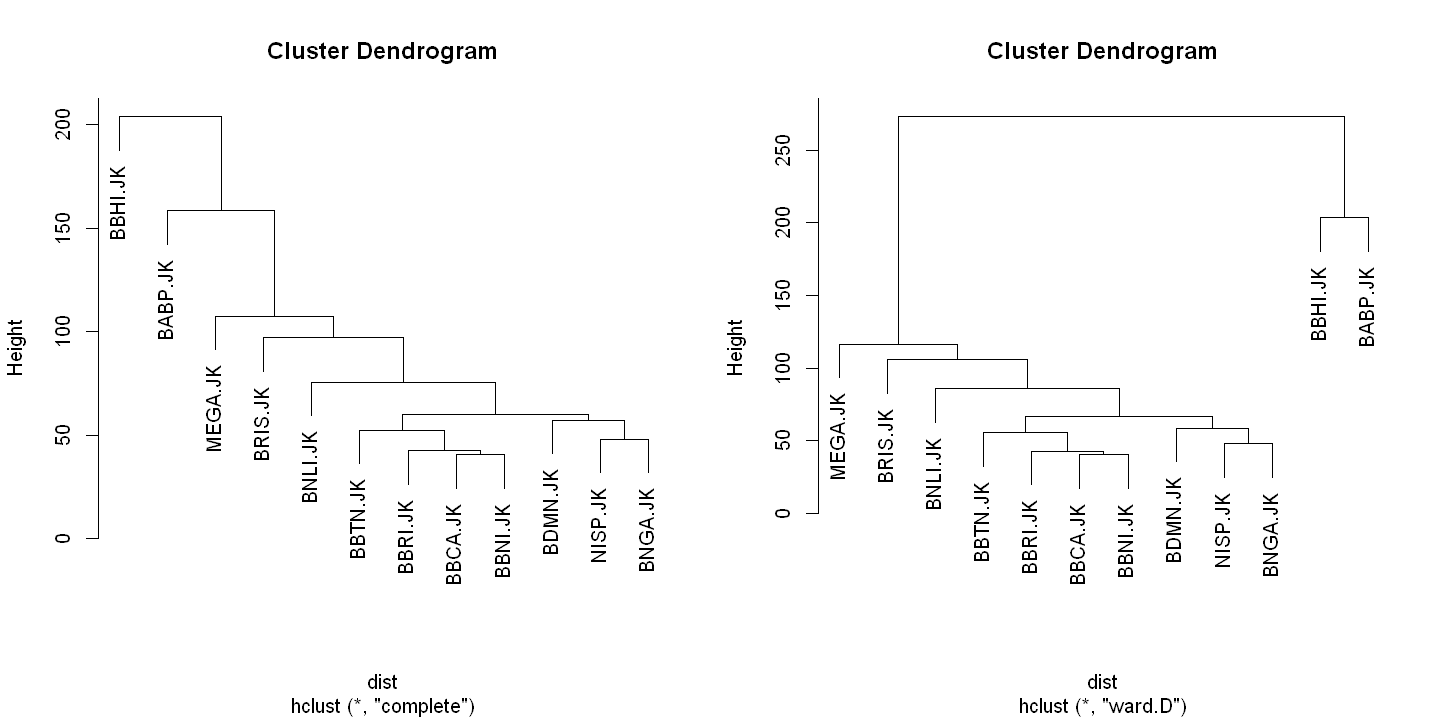

In [31]:
options(repr.plot.width=12, repr.plot.height=6)
clusteredAssets <- function(x, dist = "euclidean", method = "complete") {
    x = as.matrix(x)
    dist = dist(t(x), method = dist)
    clustering = hclust(dist, method = method)
    clustering
}
par(mfrow=c(1,2))
clusters1 <- clusteredAssets(ts_returns)
clusters2 <- clusteredAssets(ts_returns,method = 'ward.D')
plot(clusters1)
plot(clusters2)

## 3.3.4 Factor Analysis

In [32]:
factor_alpha_risk<- function(df){
    k <- ncol(df)
    covDF <- cov(df)
    tot_variance <- sum(covDF)
    variance_DFi <- tr(covDF)
    k/(k-1)*(1-variance_DFi/tot_variance)
}

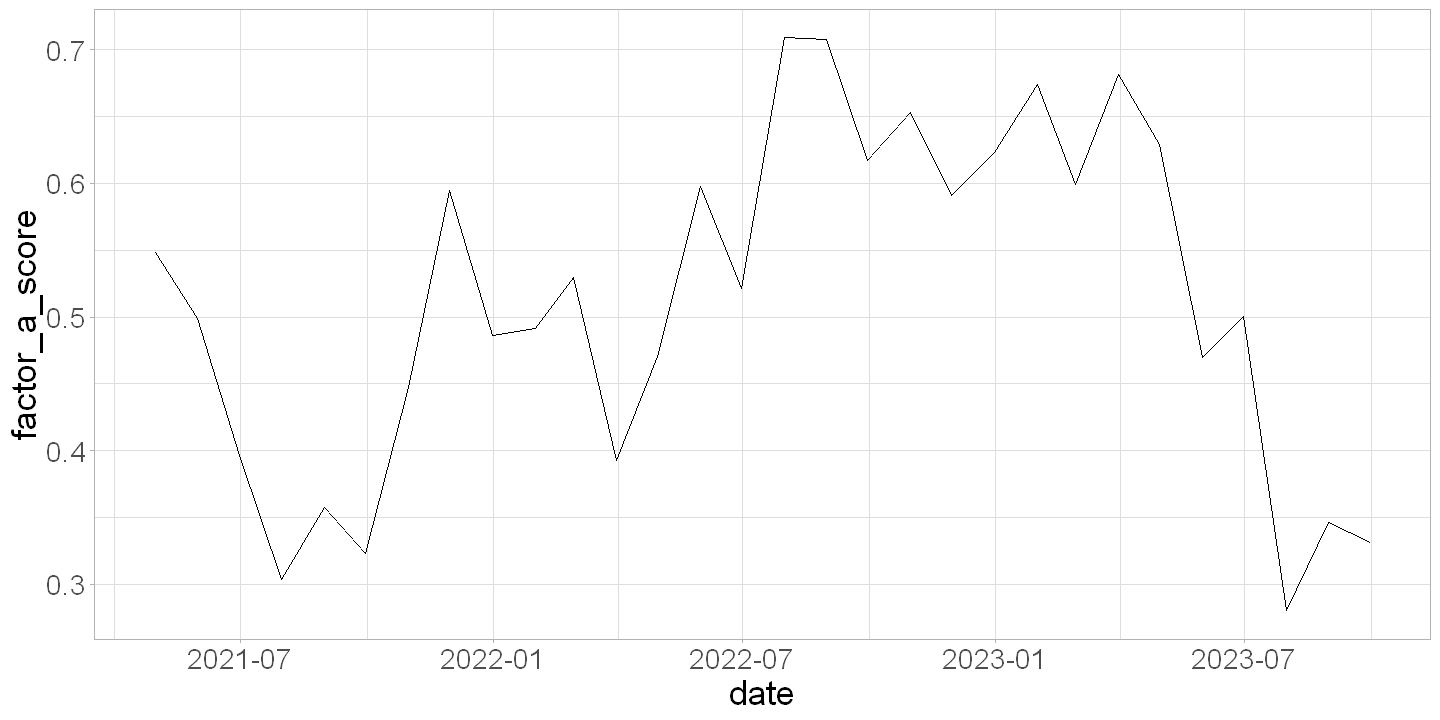

In [33]:
results <- sapply(1:length(by$from), function(x) factor_alpha_risk(window(ts_returns,by$from[x],by$to[x] ))) %>% data.frame()
names(results) <- 'factor_a_score'
results %>% mutate(date=as.Date(data.frame(by$to)[,1]))  %>%  ggplot(aes(date, factor_a_score)) + geom_line() +
theme_light() + theme(text=element_text(size=21))

[1] 0.7327503

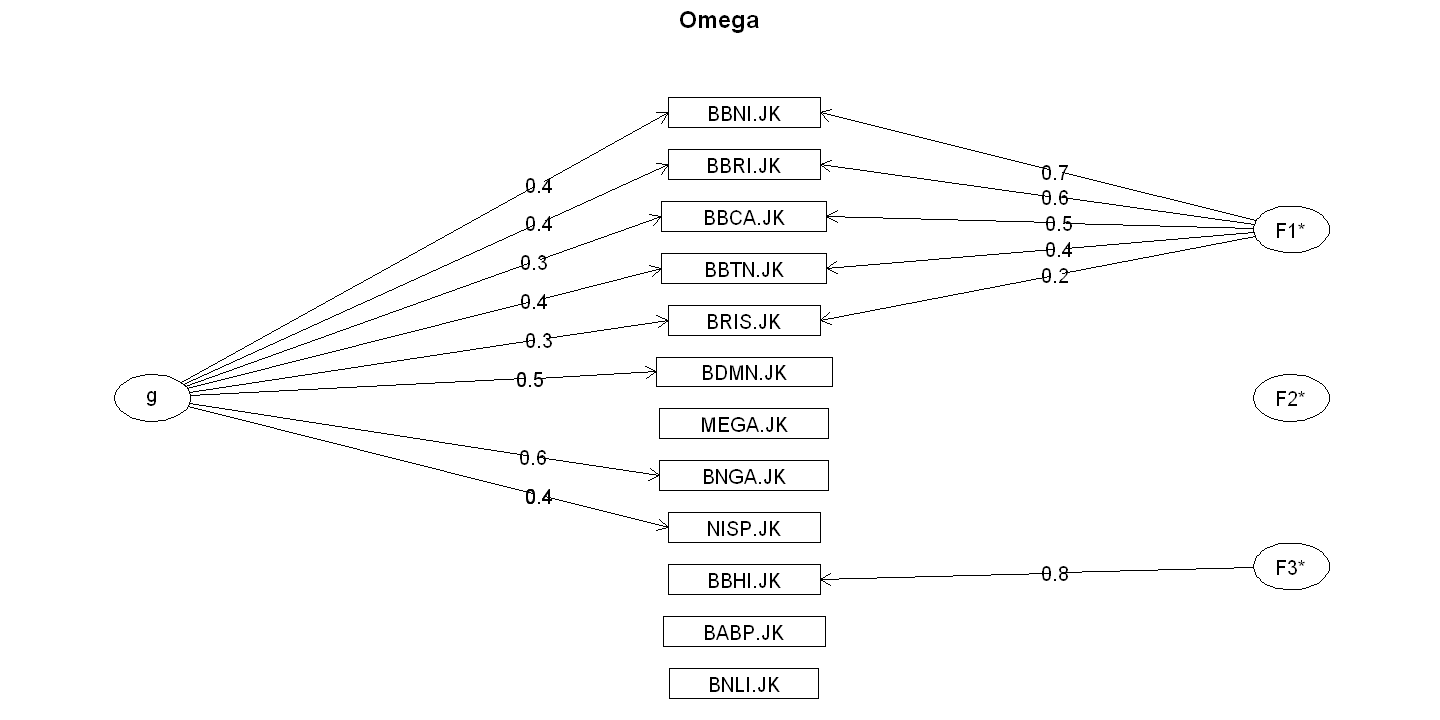

In [34]:
omega(ts_returns)$omega.tot

### 3.3.5 Dimensional Reduction Analysis

#### Data point perspective

initial  value 2.573803 
iter   5 value 1.081934
iter  10 value 0.472590
iter  15 value 0.312161
iter  20 value 0.166587
iter  25 value 0.142455
iter  30 value 0.134918
iter  35 value 0.098998
iter  40 value 0.033780
final  value 0.007455 
converged


Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`."


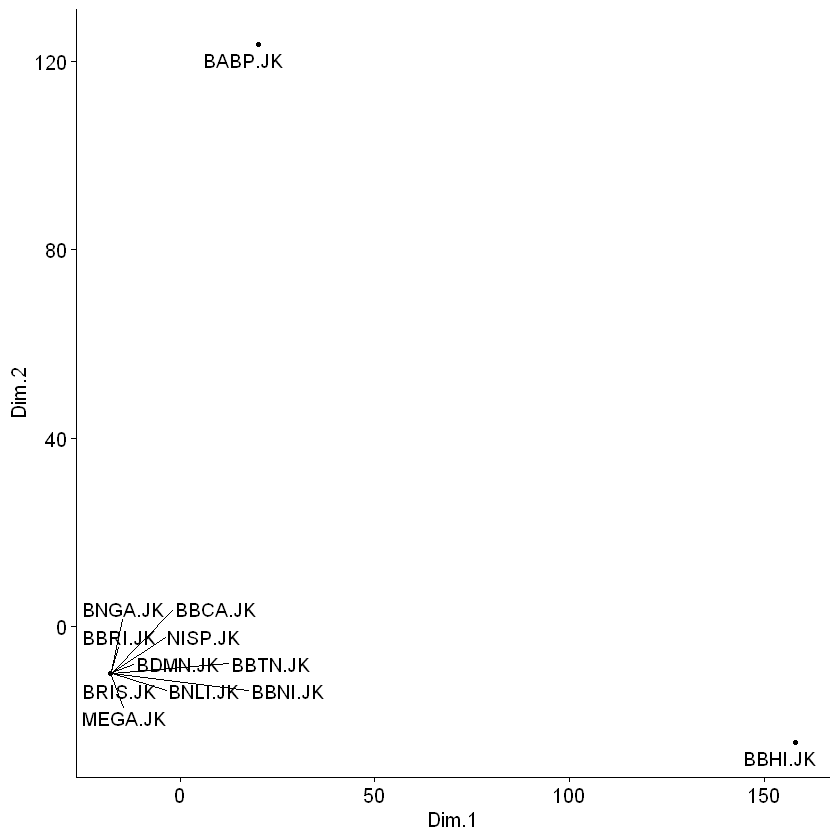

In [35]:
options(repr.plot.width=7, repr.plot.height=7)
mds <- t(ts_returns) %>% dist() %>% isoMDS() %>% .$points %>% as_tibble()
colnames(mds) <- c("Dim.1", "Dim.2")
ggscatter(mds, x = "Dim.1", y = "Dim.2", label = rownames(t(ts_returns)),
          size = 1,repel = TRUE)

#### Correlation perspective

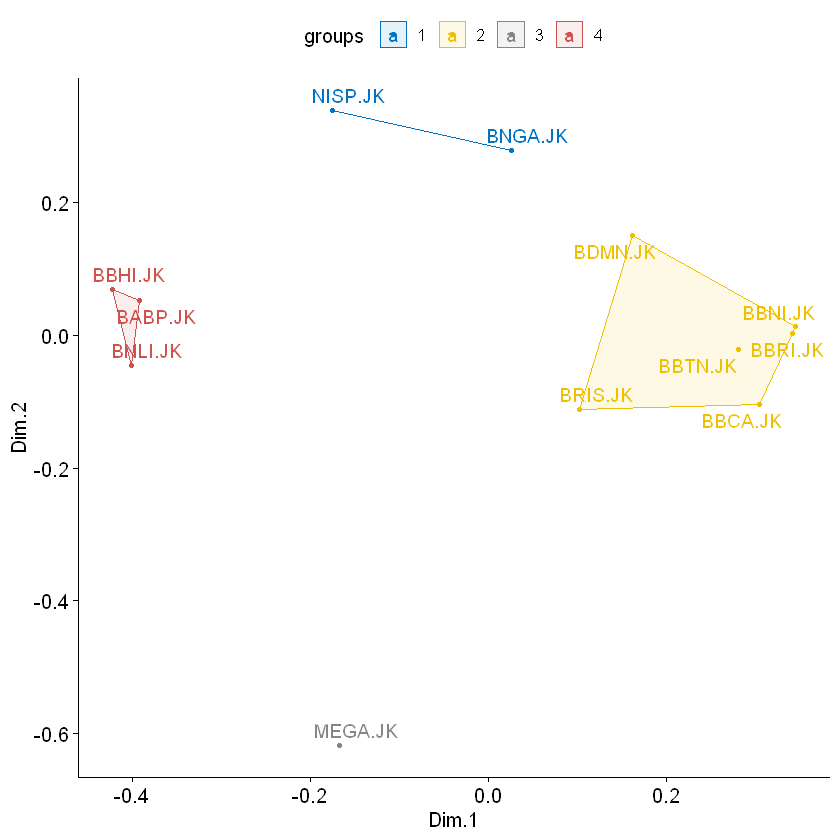

In [36]:
# K-means clustering
cordata<-cor(ts_returns)
mds.cor <- (1 - cordata) %>% cmdscale() %>% as_tibble();colnames(mds.cor) <- c("Dim.1", "Dim.2")
clust <- kmeans(mds.cor, 4)$cluster %>%
  as.factor()
mds.cor <- mds.cor %>%
  mutate(groups = clust)
# Plot and color by groups
ggscatter(mds.cor, x = "Dim.1", y = "Dim.2", 
          label = rownames(cordata), color = "groups",
          palette = "jco", size = 1, ellipse = TRUE, ellipse.type = "convex",
          repel = TRUE)

## 3.4 Distribution

###  3.4.1 Density 

In [37]:
ts_retDens<- ts_returns
ts_retDens$years <- factor(format(time(ts_returns), "%Y"), levels=c('2021', '2022', '2023'))
ts_retDens$months <- factor(format(time(ts_returns), "%B"), levels=month.name[rev(1:12)])
ts_retDens$days <- factor(format(time(ts_returns), "%A"),levels=c('Monday','Tuesday',
                                                                 'Wednesday','Thursday',
                                                                 'Friday'))

Picking joint bandwidth of 0.759

Picking joint bandwidth of 0.703

Picking joint bandwidth of 0.515



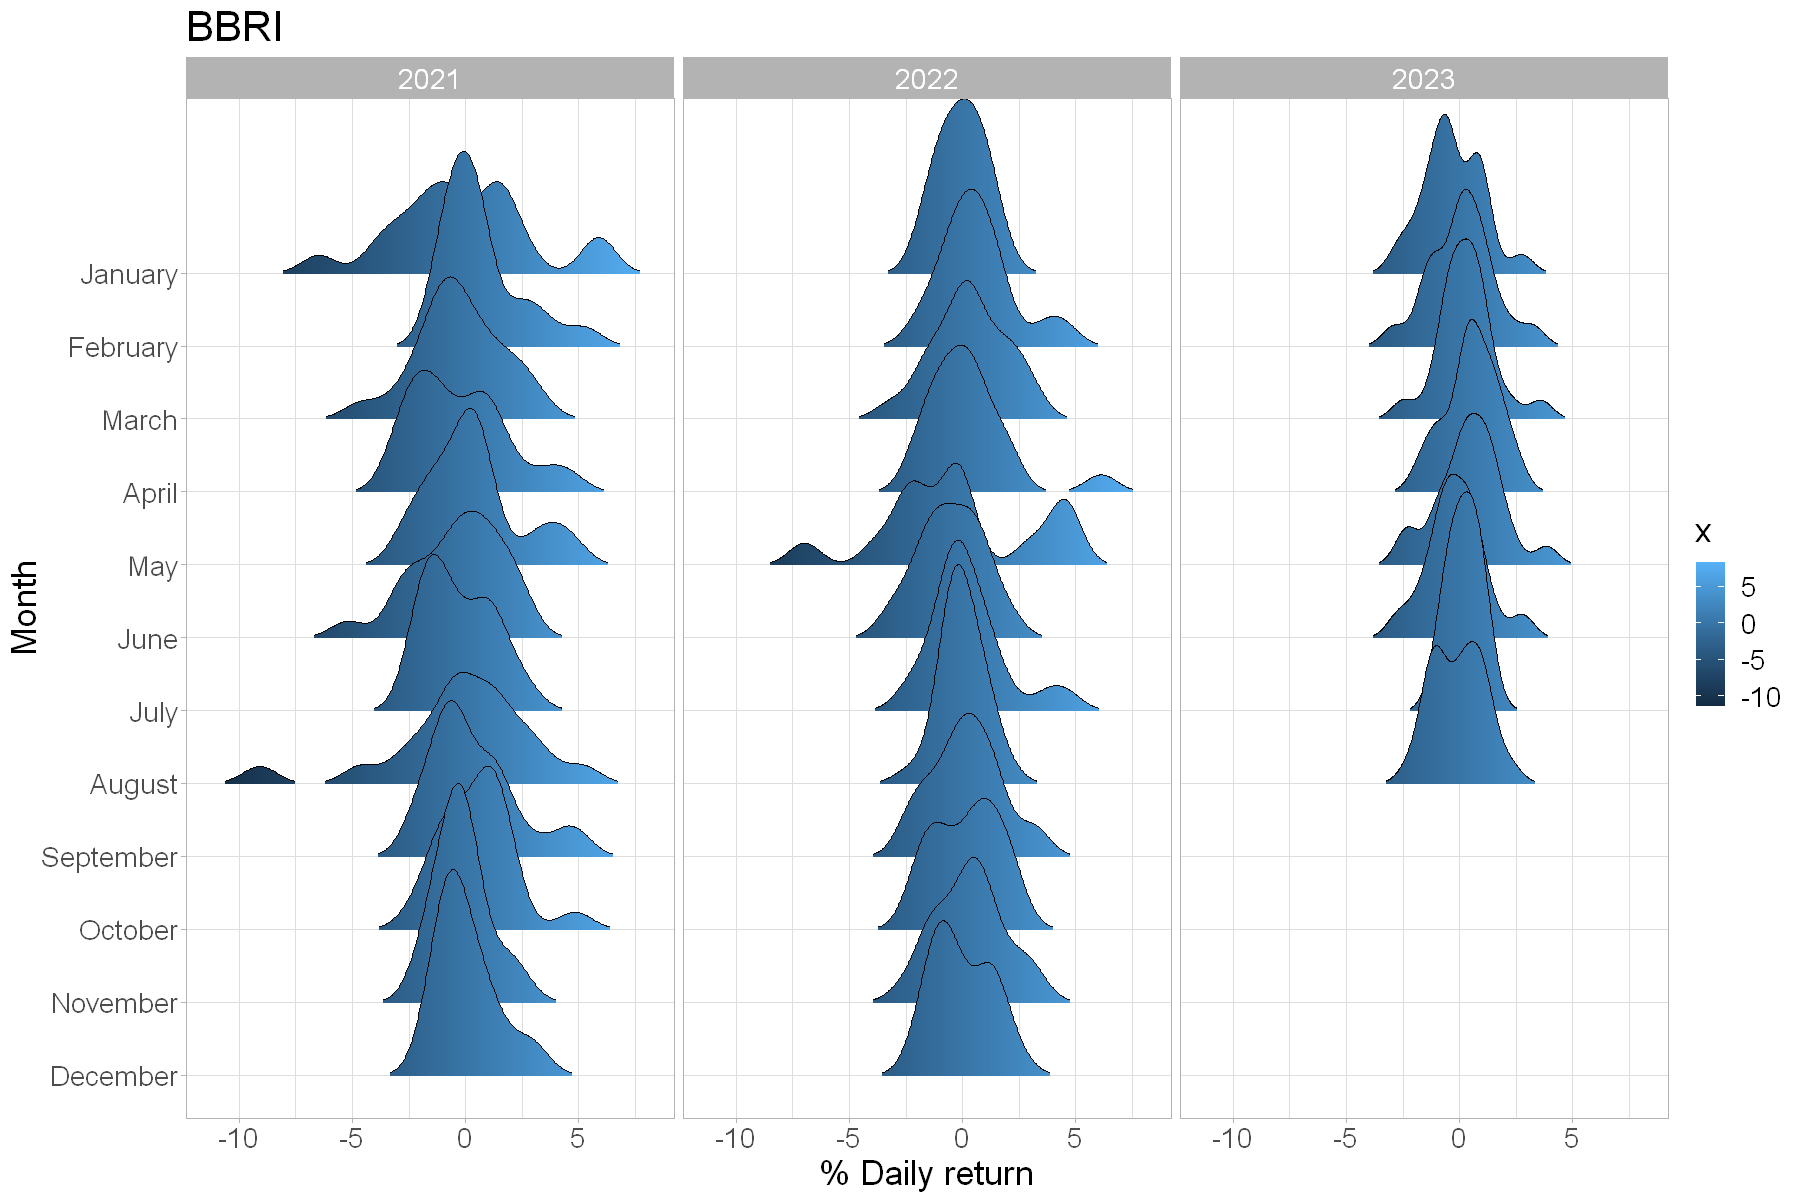

In [38]:
options(repr.plot.width=15, repr.plot.height=10)
df <- data.frame(ts_retDens)
df%>% 
ggplot( aes(x = BBRI.JK, y = months, fill = after_stat(x))) +
geom_density_ridges_gradient(scale = 3, size = 0.3, rel_min_height = 0.01) +
theme_minimal() + facet_grid(. ~ years) + theme(legend.position = "none") +
labs( x='% Daily return', y='Month', title='BBRI') + theme_light() + theme(text=element_text(size=21))


### 3.4.2 GED

In [39]:
dged <- function(x, mean = 0, sd = 1, nu = 1) {
    z = (x - mean)/sd
    lambda = sqrt(2^(-2/nu) * gamma(1/nu)/gamma(3/nu))
    g = nu/(lambda * (2^(1 + 1/nu)) * gamma(1/nu))
    density = g * exp(-0.5 * (abs(z/lambda))^nu)/sd
    density
}

gedFit <- function(x, ...) {
    start = c(mean = mean(x), sd = sqrt(var(x)), nu = 0.8)
    loglik = function(x, y = x) {
        f = -sum(log(dged(y, x[1], x[2], x[3])))
        f}
    fit = nlminb(start = start, objective = loglik, 
                 lower = c(-Inf,0, 0), 
                 upper = c(Inf, Inf, Inf), 
                 y = x, ...)
    names(fit$par) = c("mean", "sd", "nu")
    fit
}

- For ν = 2, it reduces to the normal distribution
- As ν decreases, the distribution becomes more leptokurtic (heavy-tailed)
- As ν increases, the distribution becomes more platykurtic (light-tailed)

In [40]:
param = NULL
for (i in 1:12) param = rbind(param, gedFit(ts_returns[, i])$par)
rownames(param) = colnames(ts_returns)
param

Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"


mean          sd       nu       
BBHI.JK  7.461555e-14 6.909607 0.4918056
BABP.JK -2.072861e-12 5.422774 0.6112335
MEGA.JK  1.000567e-14 3.066064 0.3455944
BRIS.JK  1.120401e-08 3.107802 0.6580733
BNLI.JK -1.742033e-14 2.203516 0.5619000
BBTN.JK  6.673645e-12 2.038876 0.8919454
BBRI.JK  9.584016e-04 1.671069 1.2351483
BBCA.JK  4.811709e-09 1.382969 1.1332748
BBNI.JK -2.423344e-10 1.785092 1.0346109
BDMN.JK -7.116966e-13 1.990123 0.8308160
NISP.JK  3.779495e-16 1.475987 0.4276640
BNGA.JK  5.848731e-15 1.939475 0.4111594

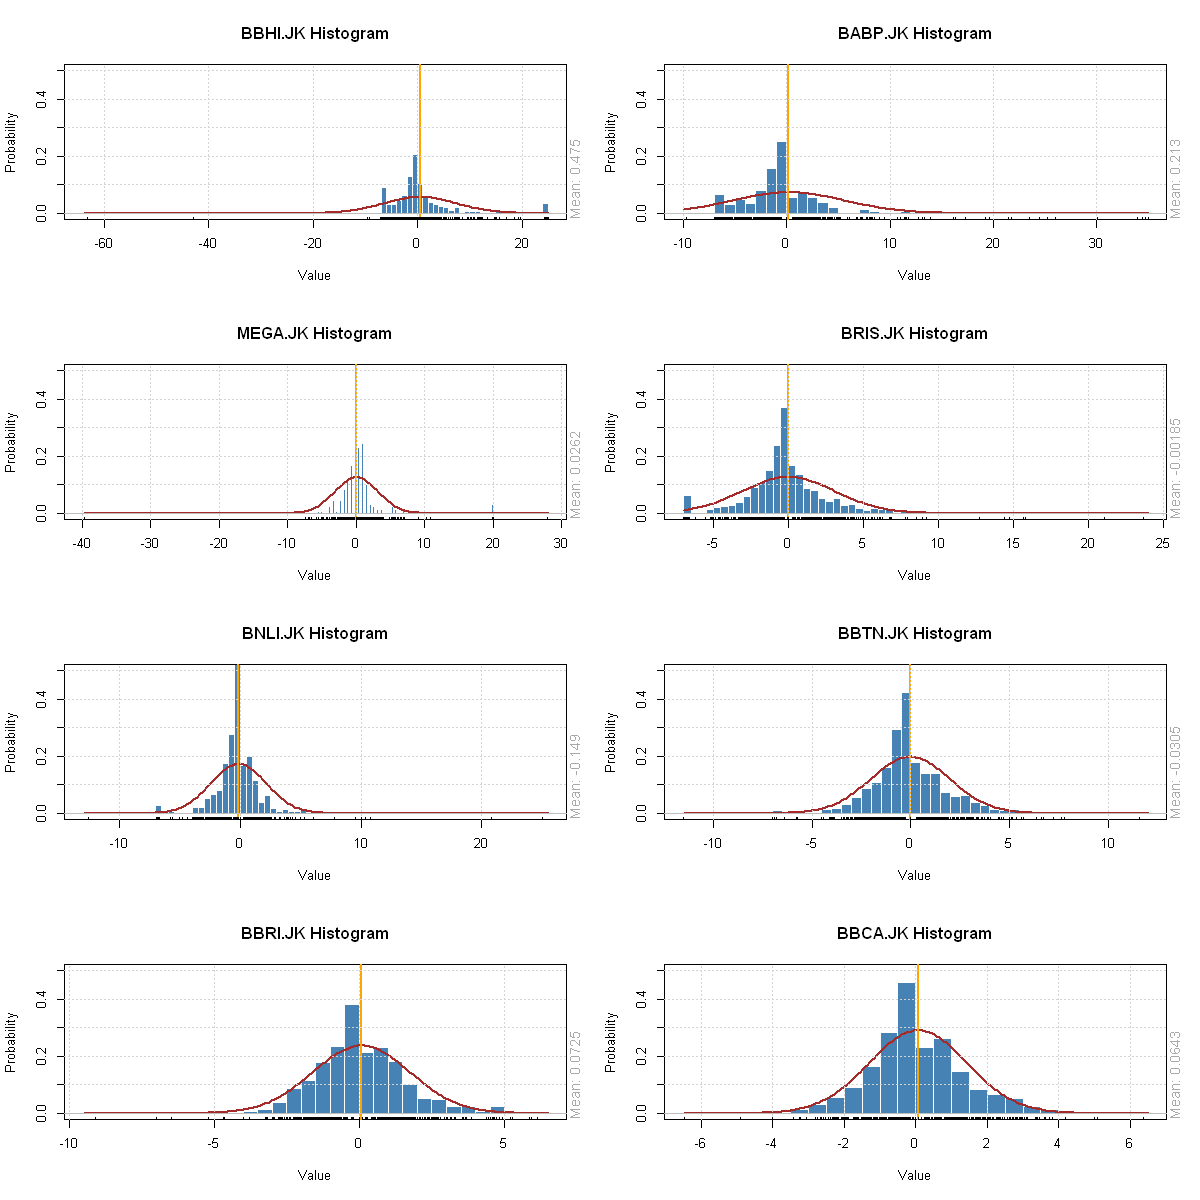

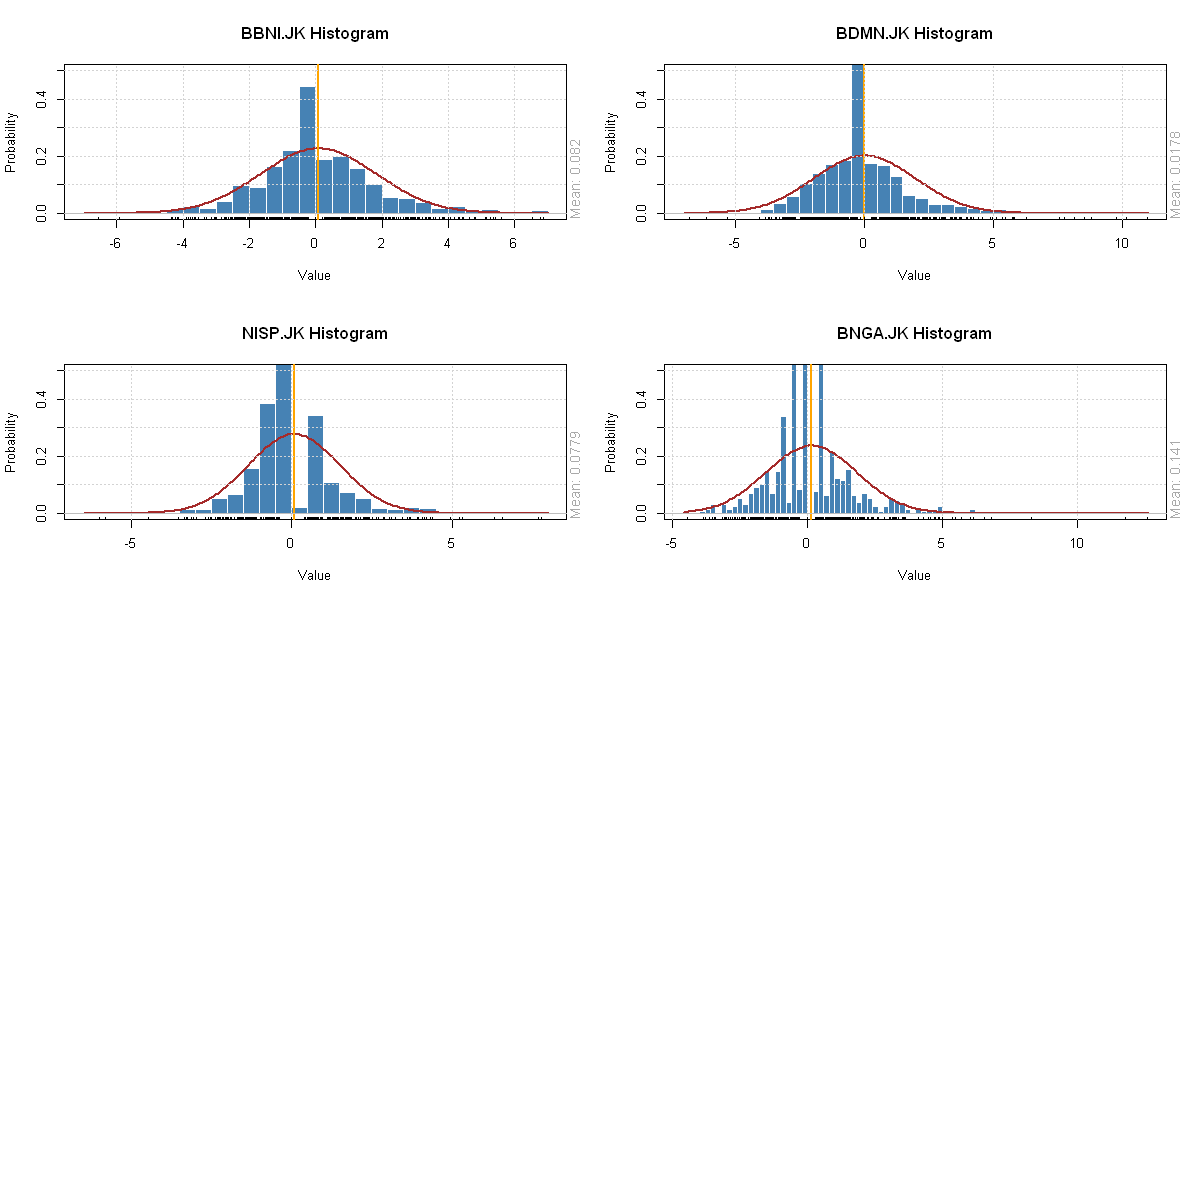

In [41]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(4, 2))
main = colnames(ts_returns)
for (i in 1:12) {
    u = histPlot(ts_returns[, i], main = main[i], col = "steelblue",
                 border = "white", xlab = "Returns", ylim = c(0, 0.5))
    v = dged(u, mean = param[i, 1], sd = param[i, 2], nu = param[i,3])
    lines(u, v, col = "darkgreen", lwd = 2)
}

### 3.4.3  5% Quantile Distribution

In [42]:
quantile_05 <- function (x) {quantile(x, probs = 0.05)}

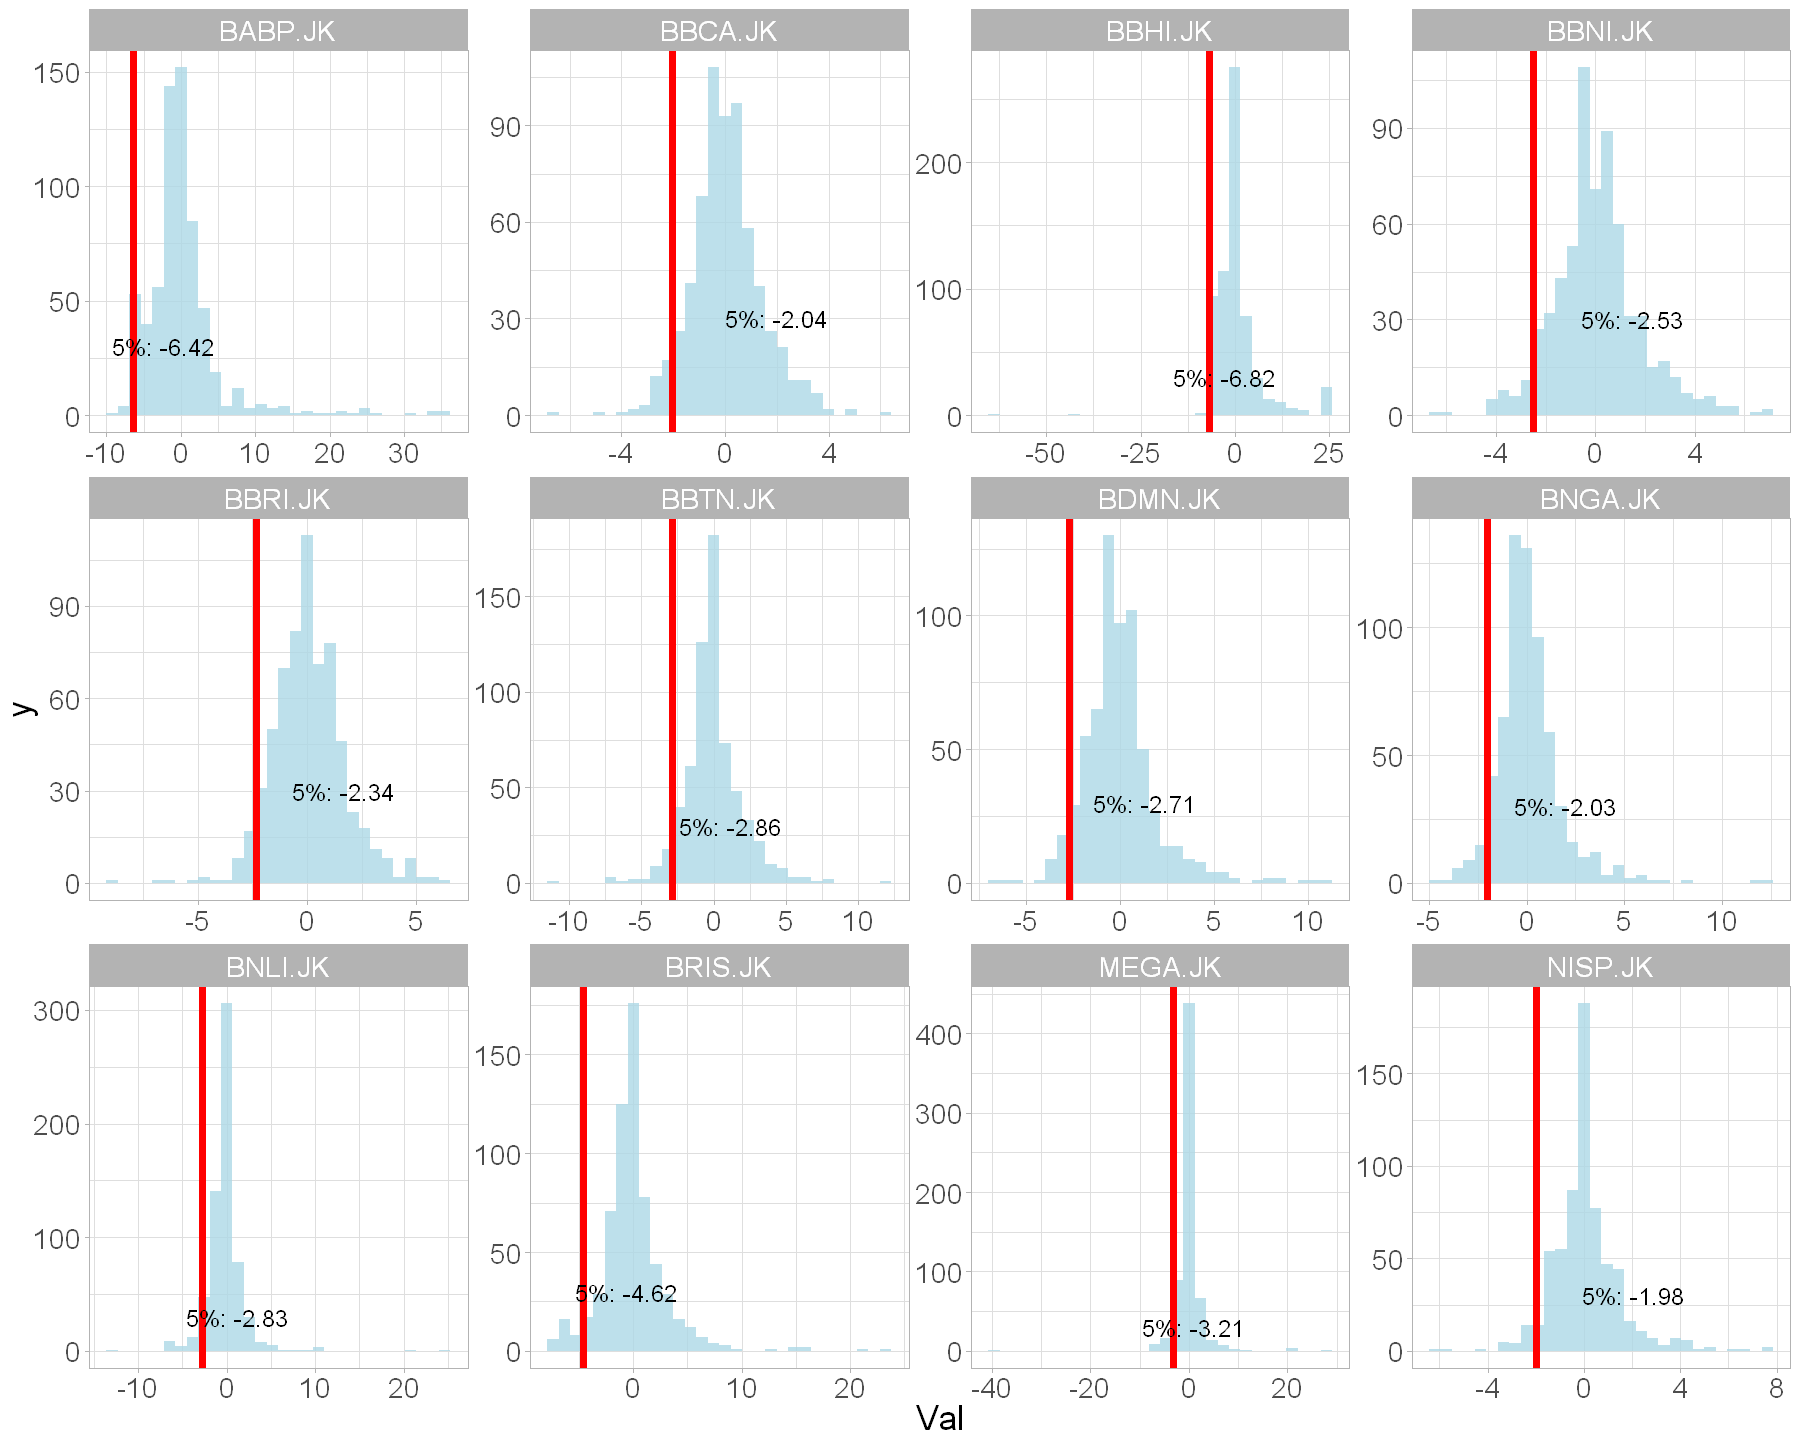

In [43]:
options(repr.plot.width=15, repr.plot.height=12)
ts_returns %>% data.frame() %>% gather('Vars', 'Val') %>% ggplot(aes(x=Val)) + theme_light()+theme(text=element_text(size=21))+
geom_histogram(bins=30, fill='lightblue', alpha=0.8) + stat_summaryh(fun.x=quantile_05, geom="vline", aes(xintercept=after_stat(x), y=10), col='red', lwd=2) +
    stat_summaryh(fun.x=quantile_05, geom="text", aes( label=paste0("5%: ",round(after_stat(x),2)), y=30), size=5, angle=0, position=position_nudge(x=4))+
facet_wrap(~Vars, scale='free')

### 3.4.4  Volume Distribution

In [44]:
tickers <- c('BBCA.JK','BBRI.JK', 'BRIS.JK', 'MEGA.JK', 'BBTN.JK', 'BBHI.JK',
             'BABP.JK', 'BBNI.JK', 'NISP.JK', 'BDMN.JK', 'BNGA.JK', 'BNLI.JK')
portfolioVolume <- NULL
for(ticker in tickers){
    portfolioVolume <- cbind(portfolioVolume,getSymbols.yahoo(ticker, from='2021-01-01',
                                            periodicity='daily', auto.assign=FALSE)[,5])
}

In [45]:
summary(portfolioVolume)

     Index            BBCA.JK.Volume      BBRI.JK.Volume     
 Min.   :2021-01-04   Min.   : 10653900   Min.   : 27676500  
 1st Qu.:2021-09-02   1st Qu.: 58005700   1st Qu.: 96590775  
 Median :2022-04-26   Median : 74823600   Median :133564150  
 Mean   :2022-04-30   Mean   : 86171645   Mean   :153995007  
 3rd Qu.:2022-12-22   3rd Qu.:102206075   3rd Qu.:183293425  
 Max.   :2023-09-01   Max.   :722827900   Max.   :898453700  
 BRIS.JK.Volume      MEGA.JK.Volume    BBTN.JK.Volume      BBHI.JK.Volume    
 Min.   :  2243800   Min.   :      0   Min.   :  3908300   Min.   :       0  
 1st Qu.: 11165575   1st Qu.:   6400   1st Qu.: 14999250   1st Qu.: 1350700  
 Median : 22311800   Median :  15450   Median : 24062350   Median : 3229200  
 Mean   : 44984365   Mean   :  41913   Mean   : 32296909   Mean   : 7450748  
 3rd Qu.: 43890200   3rd Qu.:  37450   3rd Qu.: 39839550   3rd Qu.: 8275875  
 Max.   :788319700   Max.   :1148936   Max.   :211664700   Max.   :95732200  
 BABP.JK.Volume     

In [46]:
df_stat <- data.frame(t(round(basicStats(portfolioVolume),2)))
reactable(df_stat, pagination = FALSE,static = getOption("reactable.static", TRUE),
          defaultColDef = colDef(cell = data_bars(df_stat, fill_color = c("lightblue","royalblue","navy"))))

HTML widgets cannot be represented in plain text (need html)

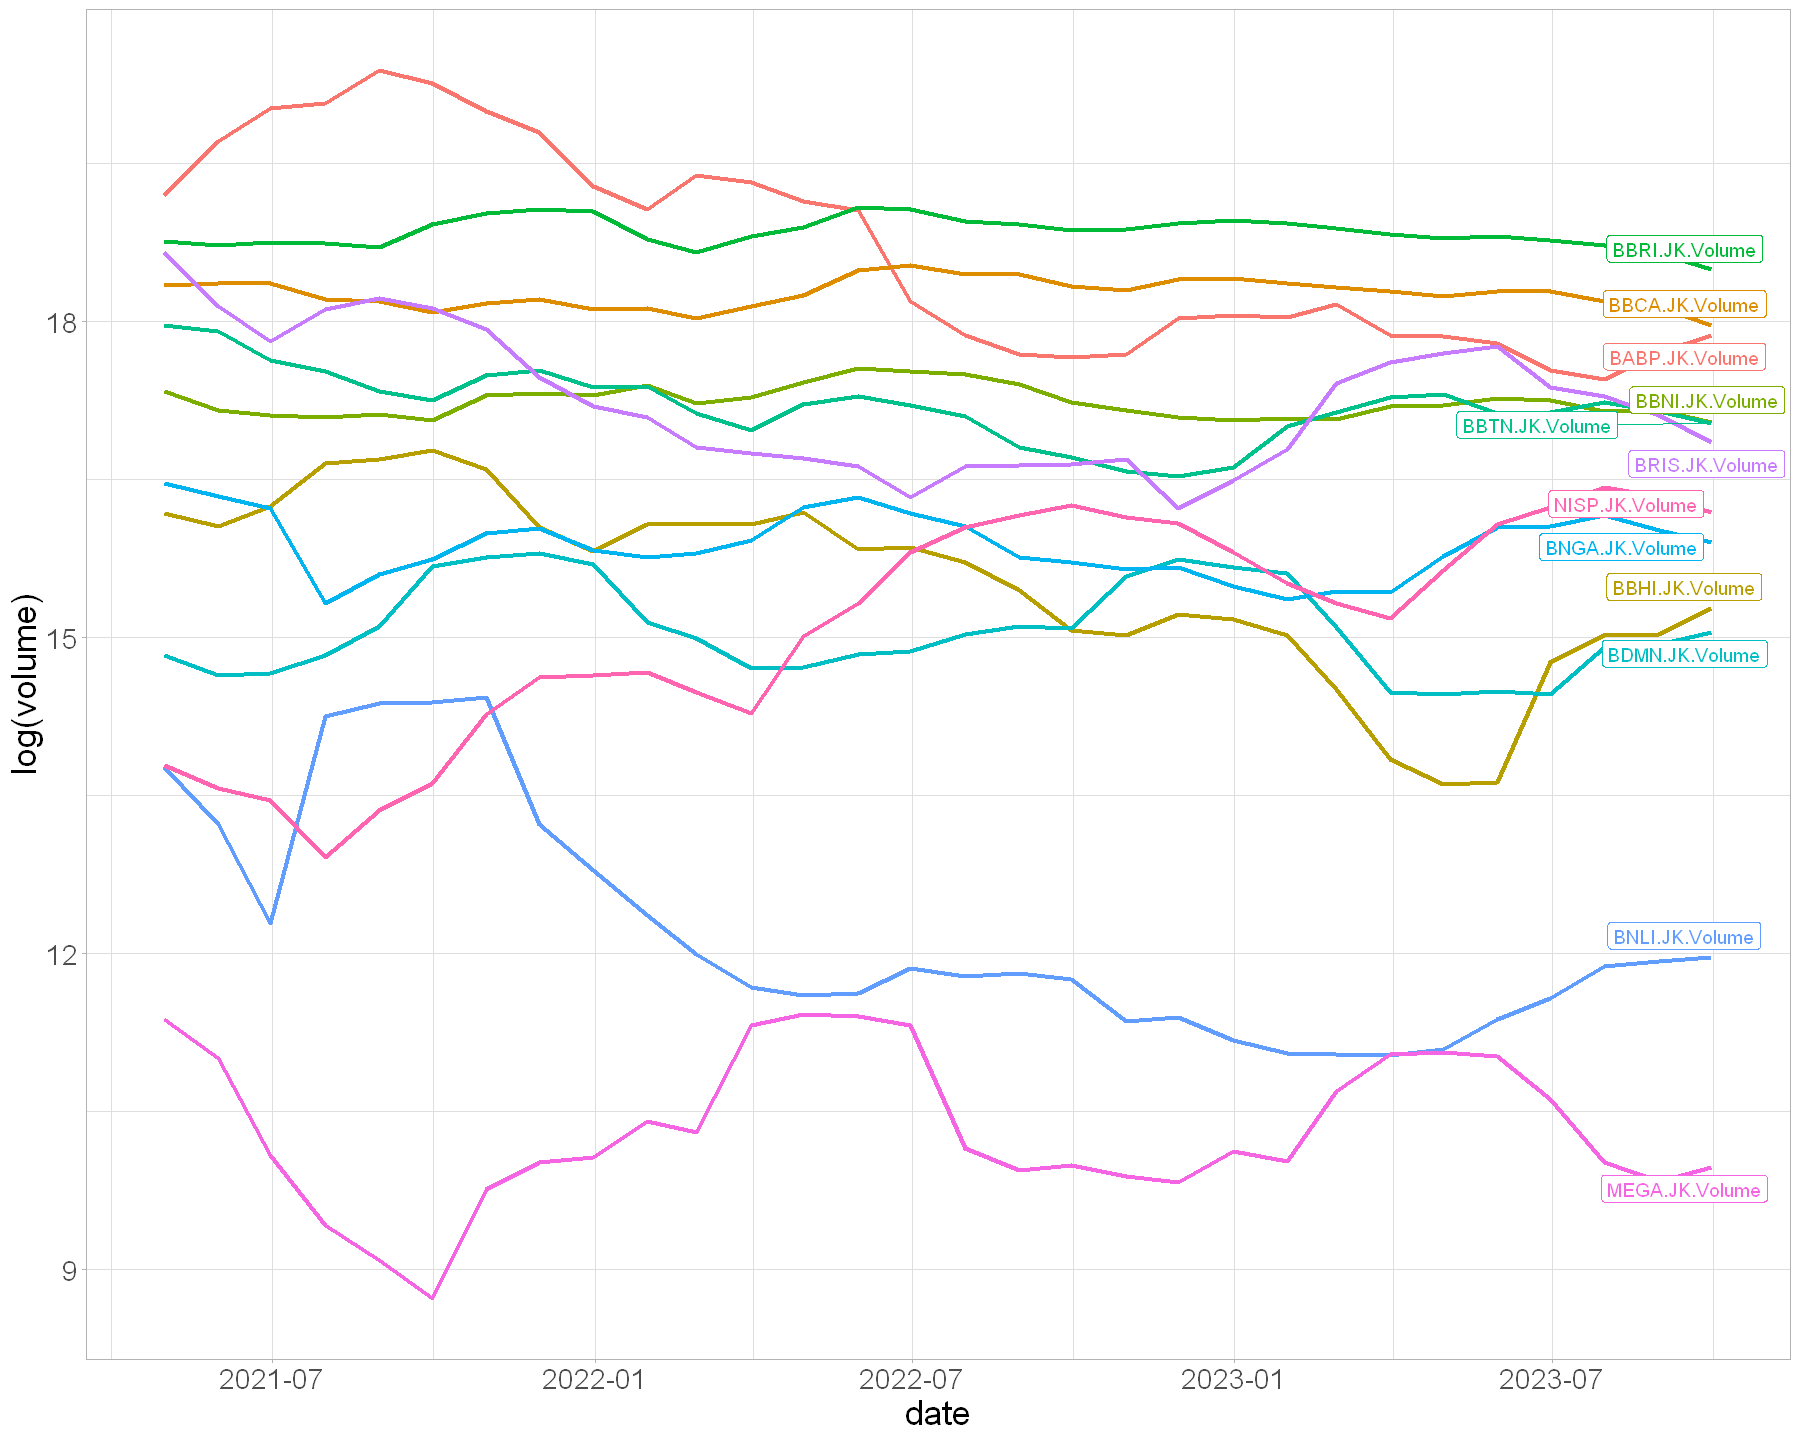

In [47]:
rollapply(as.timeSeries(portfolioVolume), by, FUN = "colMeans") %>% log()  %>% data.frame()  %>% mutate(date=as.Date(rownames(.))) %>% gather('Vars', 'Val', -date) %>% 
mutate(label = if_else(date == max(date), as.character(Vars), NA_character_)) %>%
ggplot(aes(date, Val, colour=Vars)) + geom_line(aes(group=Vars, color=Vars), lwd=1.4) + theme_light() + theme(text=element_text(size=21))+
labs(y='log(volume)')  + theme(legend.position = "none") +
geom_label_repel(aes(label = label),nudge_x = 1,na.rm = TRUE, size=4)


## 3.4 Robust Covariance

$center
     BBHI.JK      BABP.JK      MEGA.JK      BRIS.JK      BNLI.JK      BBTN.JK 
-0.433514111 -0.632847200 -0.082468393 -0.210699357 -0.229404013 -0.081310965 
     BBRI.JK      BBCA.JK      BBNI.JK      BDMN.JK      NISP.JK      BNGA.JK 
 0.076152823  0.087972151  0.080887663 -0.073061814  0.038514096 -0.002386762 

$cov
           BBHI.JK    BABP.JK      MEGA.JK   BRIS.JK    BNLI.JK      BBTN.JK
BBHI.JK 12.7164657  2.1912765  0.251422846 1.1778177 0.33854269  0.635420062
BABP.JK  2.1912765  9.7488437 -0.265003688 1.8267736 0.76500361  1.061367022
MEGA.JK  0.2514228 -0.2650037  2.213827321 0.2720696 0.06096412 -0.003829154
BRIS.JK  1.1778177  1.8267736  0.272069596 4.7828940 0.71390514  1.146948972
BNLI.JK  0.3385427  0.7650036  0.060964123 0.7139051 1.12474469  0.306151674
BBTN.JK  0.6354201  1.0613670 -0.003829154 1.1469490 0.30615167  2.549586508
BBRI.JK  0.5137266  1.0830934 -0.059828415 1.0233104 0.29686705  0.945514542
BBCA.JK  0.4353846  0.4814617  0.174740572 0.5700735 0.16560582  0.633027046
BBNI.JK  0.8276608  0.8661647  0.049405752 0.8460631 0.20096510  1.162002038
BDMN.JK  0.5975417  1.3058054  0.006188691 0.7695502 0.28700986  0.765167755
NISP.JK  0.5405230  0.5492352  0.071469543 0.4984951 0.24533294  0.340844741
BNGA.JK  0.5643516  0.6478284 -0.045752185 0.8312819 0.39321288  0.645748447
            BBRI.JK   BBCA.JK    BBNI.JK     BDMN.JK    NISP.JK     BNGA.JK
BBHI.JK  0.51372662 0.4353846 0.82766076 0.597541715 0.54052297  0.56435158
BABP.JK  1.08309342 0.4814617 0.86616465 1.305805372 0.54923515  0.64782837
MEGA.JK -0.05982842 0.1747406 0.04940575 0.006188691 0.07146954 -0.04575218
BRIS.JK  1.02331037 0.5700735 0.84606314 0.769550176 0.49849513  0.83128186
BNLI.JK  0.29686705 0.1656058 0.20096510 0.287009862 0.24533294  0.39321288
BBTN.JK  0.94551454 0.6330270 1.16200204 0.765167755 0.34084474  0.64574845
BBRI.JK  2.14677746 0.8122659 1.13715435 0.559957026 0.24755696  0.62270759
BBCA.JK  0.81226592 1.6745391 1.00606667 0.374602326 0.22427848  0.36311952
BBNI.JK  1.13715435 1.0060667 2.49581609 0.624817056 0.22772962  0.48160563
BDMN.JK  0.55995703 0.3746023 0.62481706 2.482137388 0.33191002  0.58179548
NISP.JK  0.24755696 0.2242785 0.22772962 0.331910015 1.41326835  0.40241019
BNGA.JK  0.62270759 0.3631195 0.48160563 0.581795477 0.40241019  1.43011379

$mu
     BBHI.JK      BABP.JK      MEGA.JK      BRIS.JK      BNLI.JK      BBTN.JK 
-0.433514111 -0.632847200 -0.082468393 -0.210699357 -0.229404013 -0.081310965 
     BBRI.JK      BBCA.JK      BBNI.JK      BDMN.JK      NISP.JK      BNGA.JK 
 0.076152823  0.087972151  0.080887663 -0.073061814  0.038514096 -0.002386762 

$Sigma
           BBHI.JK    BABP.JK      MEGA.JK   BRIS.JK    BNLI.JK      BBTN.JK
BBHI.JK 12.7164657  2.1912765  0.251422846 1.1778177 0.33854269  0.635420062
BABP.JK  2.1912765  9.7488437 -0.265003688 1.8267736 0.76500361  1.061367022
MEGA.JK  0.2514228 -0.2650037  2.213827321 0.2720696 0.06096412 -0.003829154
BRIS.JK  1.1778177  1.8267736  0.272069596 4.7828940 0.71390514  1.146948972
BNLI.JK  0.3385427  0.7650036  0.060964123 0.7139051 1.12474469  0.306151674
BBTN.JK  0.6354201  1.0613670 -0.003829154 1.1469490 0.30615167  2.549586508
BBRI.JK  0.5137266  1.0830934 -0.059828415 1.0233104 0.29686705  0.945514542
BBCA.JK  0.4353846  0.4814617  0.174740572 0.5700735 0.16560582  0.633027046
BBNI.JK  0.8276608  0.8661647  0.049405752 0.8460631 0.20096510  1.162002038
BDMN.JK  0.5975417  1.3058054  0.006188691 0.7695502 0.28700986  0.765167755
NISP.JK  0.5405230  0.5492352  0.071469543 0.4984951 0.24533294  0.340844741
BNGA.JK  0.5643516  0.6478284 -0.045752185 0.8312819 0.39321288  0.645748447
            BBRI.JK   BBCA.JK    BBNI.JK     BDMN.JK    NISP.JK     BNGA.JK
BBHI.JK  0.51372662 0.4353846 0.82766076 0.597541715 0.54052297  0.56435158
BABP.JK  1.08309342 0.4814617 0.86616465 1.305805372 0.54923515  0.64782837
MEGA.JK -0.05982842 0.1747406 0.04940575 0.006188691 0.07146954 -0.04575218
BRIS.JK  1.02331037 0.5700735 0.84606314 0.7695

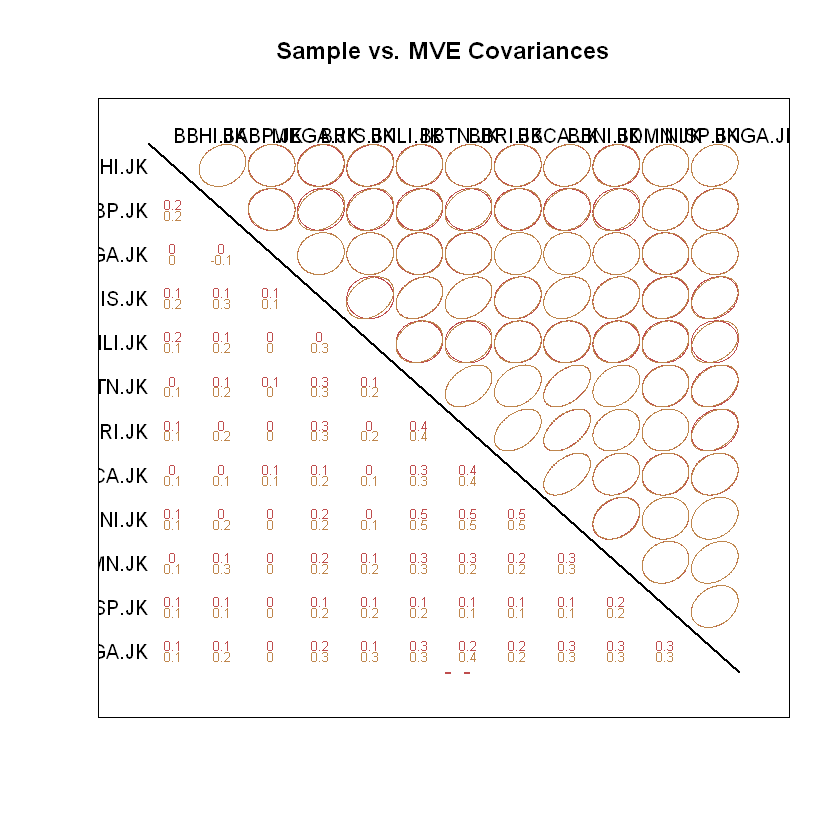

In [48]:
options(repr.plot.width=7, repr.plot.height=7)
ans.mve <- assetsMeanCov(ts_returns, method = "mve")
ans.mve
covEllipsesPlot(list(cov(ts_returns), ans.mve$Sigma))
title(main = "Sample vs. MVE Covariances")

ans.bagged <- assetsMeanCov(ts_returns, "bagged")
ans.bagged
covEllipsesPlot(list(cov(ts_returns), ans.bagged$cov))

## 3.5 Multivariate Outliers Detection

In [49]:
outliers <- assetsOutliers(ts_returns, ans.mve$center, ans.mve$cov)
outliers$outliers

2021-01-06 2021-01-07 2021-01-08 2021-01-11 2021-01-12 2021-01-13 2021-01-14 
         2          3          4          5          6          7          8 
2021-01-15 2021-01-18 2021-01-19 2021-01-20 2021-01-21 2021-01-22 2021-01-25 
         9         10         11         12         13         14         15 
2021-01-26 2021-01-27 2021-01-28 2021-01-29 2021-02-01 2021-02-02 2021-02-03 
        16         17         18         19         20         21         22 
2021-02-08 2021-02-09 2021-02-15 2021-02-16 2021-02-17 2021-02-18 2021-02-19 
        25         26         29         30         31         32         33 
2021-02-22 2021-02-24 2021-02-25 2021-02-26 2021-03-02 2021-03-03 2021-03-04 
        34         36         37         38         40         41         42 
2021-03-09 2021-03-15 2021-03-16 2021-03-17 2021-03-22 2021-03-24 2021-03-30 
        45         48         49         50         53         55         59 
2021-04-01 2021-04-05 2021-04-07 2021-04-08 2021-04-12 2021-04-14 2021-04-15 
        61         62         64         65         67         69         70 
2021-04-16 2021-04-19 2021-04-22 2021-04-23 2021-04-28 2021-05-03 2021-05-21 
        71         72         75         76         79         82         93 
2021-05-24 2021-05-27 2021-05-31 2021-06-03 2021-06-04 2021-06-07 2021-06-08 
        94         96         98        100        101        102        103 
2021-06-09 2021-06-10 2021-06-16 2021-06-18 2021-06-21 2021-06-23 2021-06-24 
       104        105        109        111        112        114        115 
2021-06-25 2021-06-28 2021-06-30 2021-07-02 2021-07-05 2021-07-06 2021-07-07 
       116        117        119        121        122        123        124 
2021-07-08 2021-07-09 2021-07-12 2021-07-13 2021-07-14 2021-07-15 2021-07-19 
       125        126        127        128        129        130        132 
2021-07-21 2021-07-22 2021-07-26 2021-08-02 2021-08-04 2021-08-05 2021-08-06 
       133        134        136        141        143        144        145 
2021-08-10 2021-08-18 2021-08-25 2021-08-26 2021-09-01 2021-09-02 2021-09-08 
       147        151        156        157        161        162        166 
2021-09-10 2021-09-13 2021-09-15 2021-09-30 2021-10-01 2021-10-04 2021-10-05 
       168        169        171        182        183        184        185 
2021-10-06 2021-10-14 2021-10-18 2021-10-21 2021-11-01 2021-11-08 2021-11-15 
       186        192        194        196        203        208        213 
2021-12-07 2021-12-09 2021-12-28 2022-01-03 2022-01-04 2022-01-10 2022-01-11 
       229        231        244        247        248        252        253 
2022-01-26 2022-01-28 2022-02-02 2022-02-18 2022-03-01 2022-03-07 2022-03-10 
       264        266        268        280        286        289        292 
2022-03-14 2022-03-24 2022-03-28 2022-04-20 2022-04-21 2022-05-09 2022-05-12 
       294        302        304        320        321        327        330 
2022-05-18 2022-05-30 2022-05-31 2022-06-08 2022-06-13 2022-06-14 2022-06-15 
       333        340        341        346        349        350        351 
2022-07-11 2022-07-12 2022-08-02 2022-08-31 2022-09-01 2022-09-26 2022-10-07 
       369        370        385        405        406        423        432 
2022-10-10 2022-10-14 2022-10-18 2022-10-19 2022-10-21 2022-10-24 2022-10-28 
       433        437        439        440        442        443        447 
2022-11-01 2022-11-08 2022-11-09 2022-11-30 2022-12-01 2022-12-14 2022-12-23 
       449        454        455        470        471        480        487 
2023-01-03 2023-02-03 2023-02-15 2023-02-28 2023-03-16 2023-04-18 2023-05-05 
       494        516        524        533        545        565        572 
2023-05-08 2023-05-09 2023-05-12 2023-05-16 2023-06-06 2023-06-09 2023-06-12 
       573        574        577        579        591        594        595 
2023-06-13 2023-06-26 2023-06-27 2023-07-03 2023-07-24 2023-07-31 2023-08-07 
       596        605 

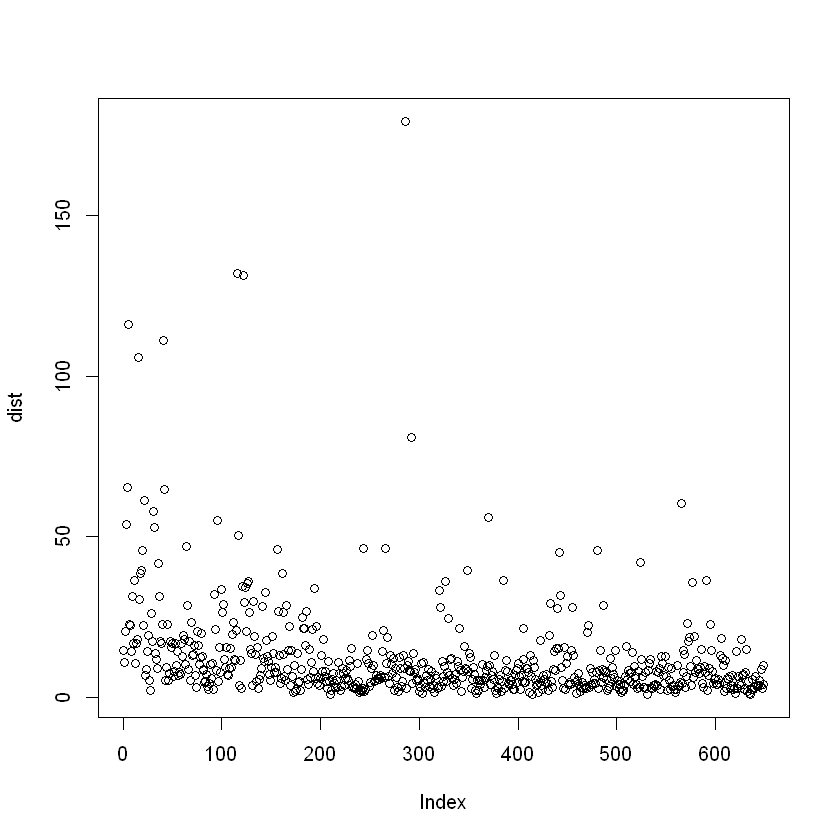

In [50]:
ans.cov <- assetsMeanCov(ts_returns, method = "cov")
dist <- mahalanobis(ts_returns, center = ans.cov$center, cov=ans.cov$cov)
plot(dist)

# 4. Portfolio Optimization

# 4.1 MINIMUM RISK MEAN-VARIANCE PORTFOLIOS

### 4.1.1  COMPUTE A FEASIBLE PORTFOLIO

In [51]:
summary(data.frame(ts_returns))

    BBHI.JK            BABP.JK           MEGA.JK             BRIS.JK         
 Min.   :-63.2667   Min.   :-9.6774   Min.   :-39.67654   Min.   :-6.976749  
 1st Qu.: -2.2556   1st Qu.:-2.1739   1st Qu.: -0.64309   1st Qu.:-1.403504  
 Median : -0.3663   Median : 0.0000   Median :  0.00000   Median :-0.296736  
 Mean   :  0.4746   Mean   : 0.2127   Mean   :  0.02623   Mean   :-0.001849  
 3rd Qu.:  1.4706   3rd Qu.: 1.2500   3rd Qu.:  0.49020   3rd Qu.: 0.970871  
 Max.   : 25.0000   Max.   :35.0000   Max.   : 27.83209   Max.   :23.684209  
    BNLI.JK            BBTN.JK             BBRI.JK            BBCA.JK        
 Min.   :-12.5922   Min.   :-11.47697   Min.   :-9.09248   Min.   :-6.46154  
 1st Qu.: -0.9479   1st Qu.: -0.99010   1st Qu.:-0.90090   1st Qu.:-0.76104  
 Median :  0.0000   Median : -0.26177   Median : 0.00000   Median : 0.00000  
 Mean   : -0.1488   Mean   : -0.03046   Mean   : 0.07249   Mean   : 0.06427  
 3rd Qu.:  0.5102   3rd Qu.:  0.84507   3rd Qu.: 0.95695   3rd Q

In [52]:
ewSpec <- portfolioSpec()
nAssets <- ncol(ts_returns)
setWeights(ewSpec) <- rep(1/nAssets, times = nAssets)

In [53]:
ewPortfolio <- feasiblePortfolio(data = ts_returns,
                                 spec = ewSpec,
                                 constraints = "LongOnly")
print(ewPortfolio)


Title:
 MV Feasible Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833 
NISP.JK BNGA.JK 
 0.0833  0.0833 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.2846  0.1904  0.0543  0.0908  0.0478  0.0620  0.0501  0.0337  0.0566  0.0514 
NISP.JK BNGA.JK 
 0.0293  0.0490 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0823 1.2630 2.5273 1.7434 

Description:
 Mon Sep  4 10:17:42 2023 by user: Kevin 


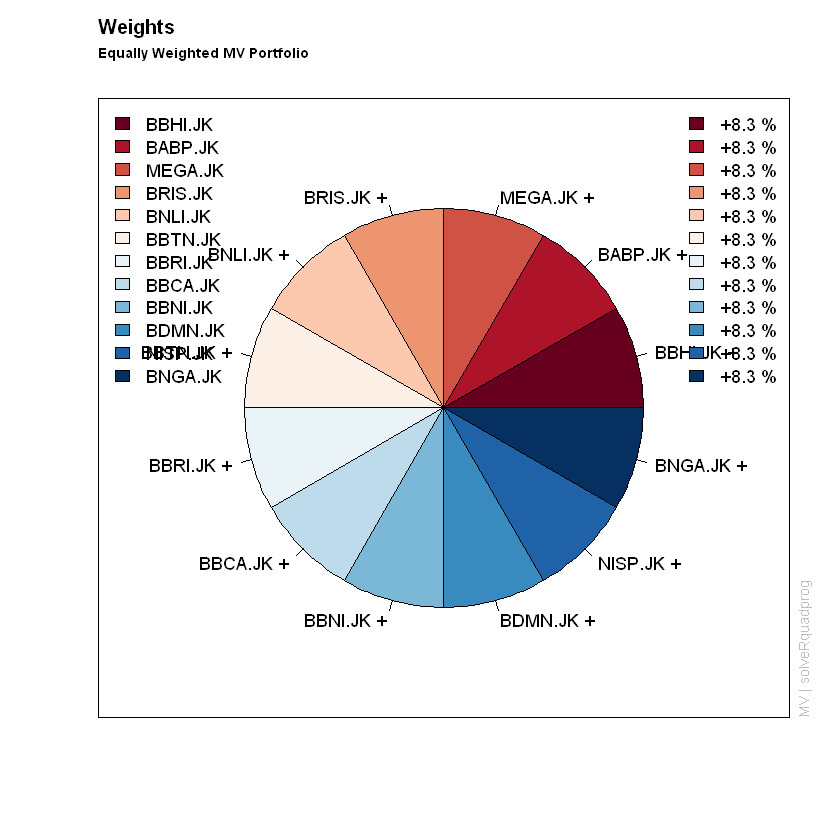

In [54]:
col <- divPalette(ncol(ts_returns), "RdBu")
weightsPie(ewPortfolio, radius = 0.7, col = col)
mtext(text = "Equally Weighted MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

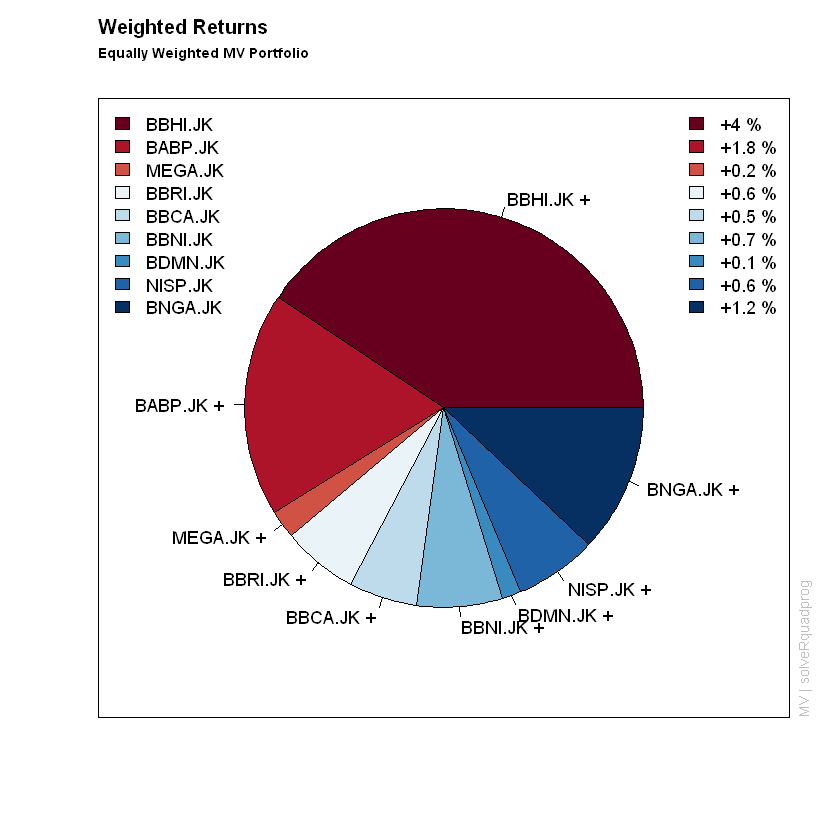

In [55]:
weightedReturnsPie(ewPortfolio, radius = 0.7, col = col)
mtext(text = "Equally Weighted MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

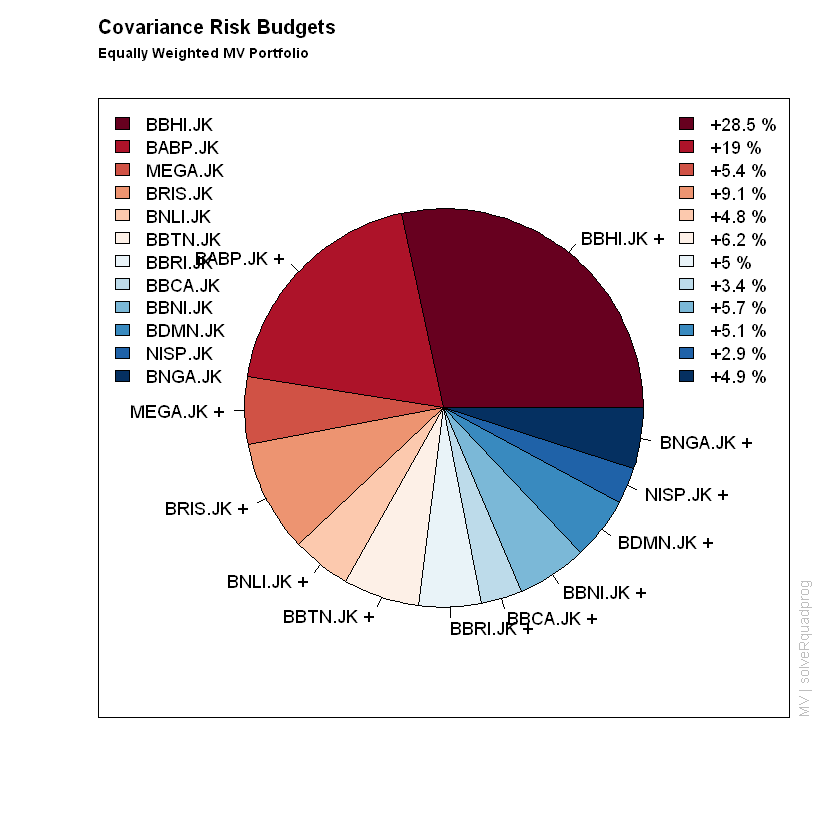

In [56]:
covRiskBudgetsPie(ewPortfolio, radius = 0.7, col = col)
mtext(text = "Equally Weighted MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

### 4.1.2 COMPUTE A MINIMUM RISK EFFICIENT PORTFOLIO

In [57]:
minriskSpec <- portfolioSpec()
targetReturn <- getTargetReturn(ewPortfolio@portfolio)["mean"]
setTargetReturn(minriskSpec) <- targetReturn

In [58]:
minriskPortfolio <- efficientPortfolio(data = ts_returns,
                                       spec = minriskSpec,
                                       constraints = "LongOnly")
print(minriskPortfolio)


Title:
 MV Efficient Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0142  0.0141  0.0647  0.0000  0.0250  0.0000  0.0864  0.2680  0.0368  0.0214 
NISP.JK BNGA.JK 
 0.2925  0.1770 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0280  0.0186  0.0557  0.0000  0.0107  0.0000  0.0844  0.2560  0.0367  0.0180 
NISP.JK BNGA.JK 
 0.2893  0.2025 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0823 0.9199 1.8782 1.3453 

Description:
 Mon Sep  4 10:17:44 2023 by user: Kevin 


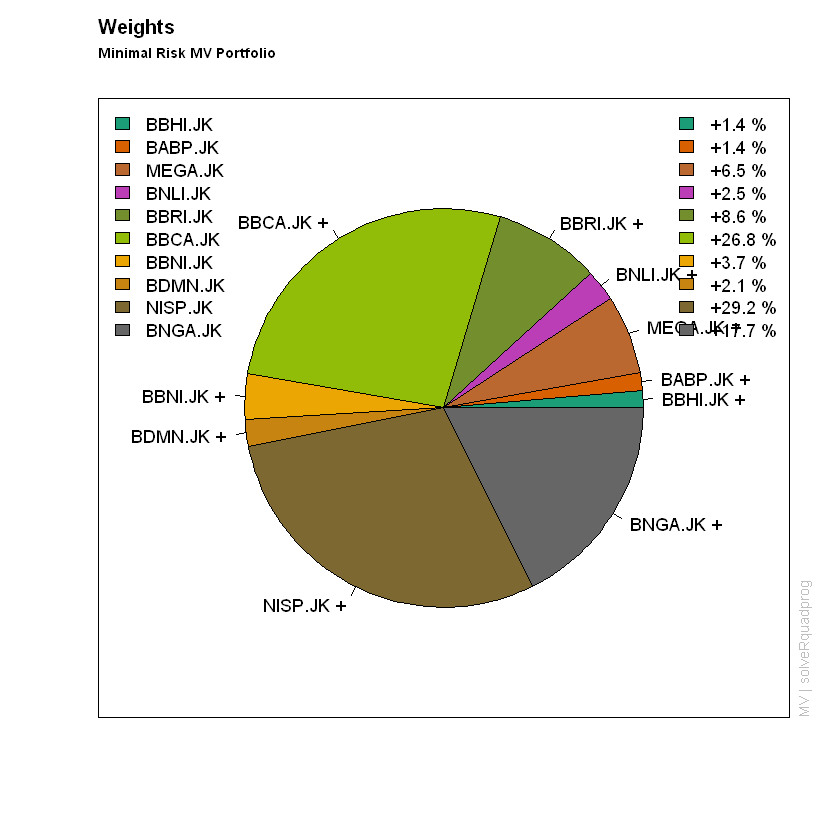

In [59]:
col <- qualiPalette(ncol(ts_returns), "Dark2")
weightsPie(minriskPortfolio, radius = 0.7, col = col)
mtext(text = "Minimal Risk MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

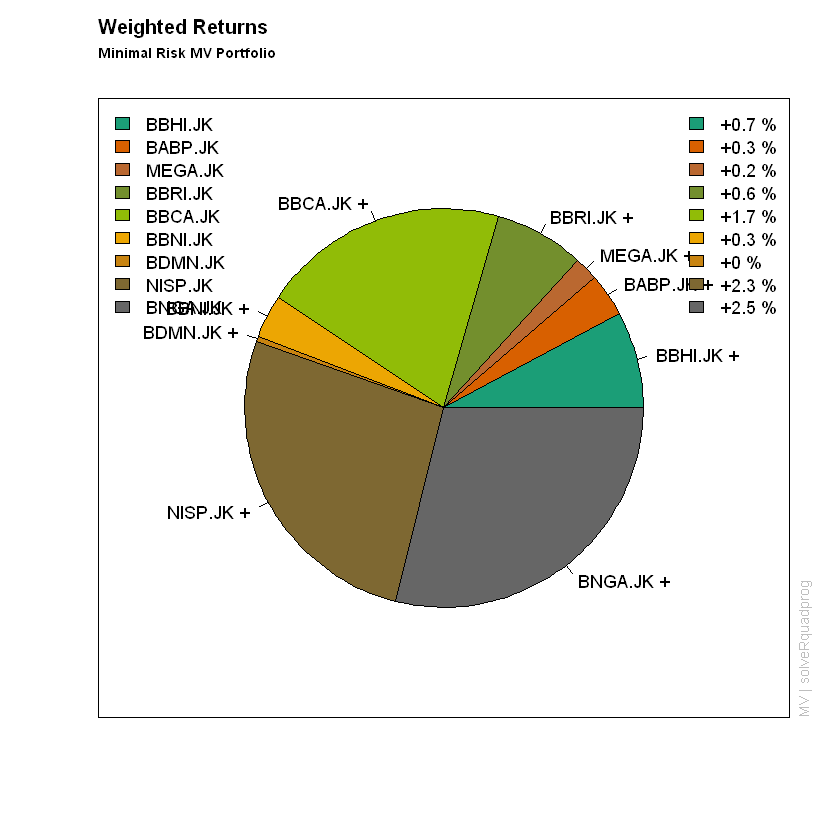

In [60]:
weightedReturnsPie(minriskPortfolio, radius = 0.7, col = col)
mtext(text = "Minimal Risk MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

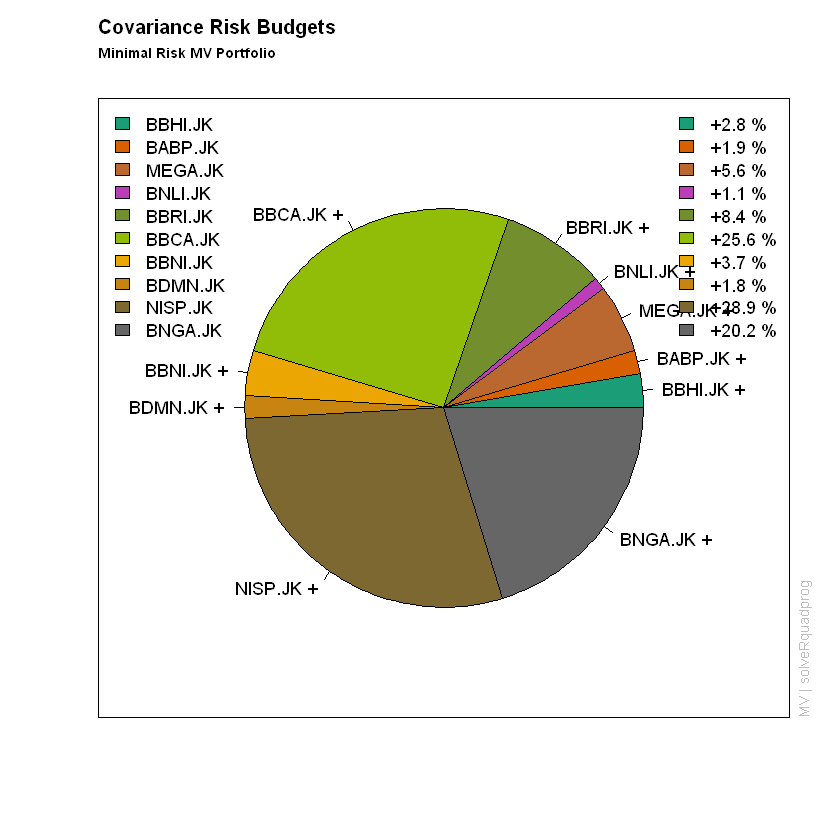

In [61]:
covRiskBudgetsPie(minriskPortfolio, radius = 0.7, col = col)
mtext(text = "Minimal Risk MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

### 4.1.3 COMPUTE THE GLOBAL MINIMUM VARIANCE PORTFOLIO

In [62]:
globminSpec <- portfolioSpec()
globminPortfolio <- minvariancePortfolio(data = ts_returns,
                                         spec = globminSpec,
                                         constraints = "LongOnly")
print(globminPortfolio)


Title:
 MV Minimum Variance Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0000  0.0044  0.0678  0.0050  0.1121  0.0203  0.0828  0.2546  0.0169  0.0552 
NISP.JK BNGA.JK 
 0.2768  0.1041 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0000  0.0044  0.0678  0.0050  0.1121  0.0203  0.0828  0.2546  0.0169  0.0552 
NISP.JK BNGA.JK 
 0.2768  0.1041 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0463 0.8780 1.8946 1.2911 

Description:
 Mon Sep  4 10:17:46 2023 by user: Kevin 


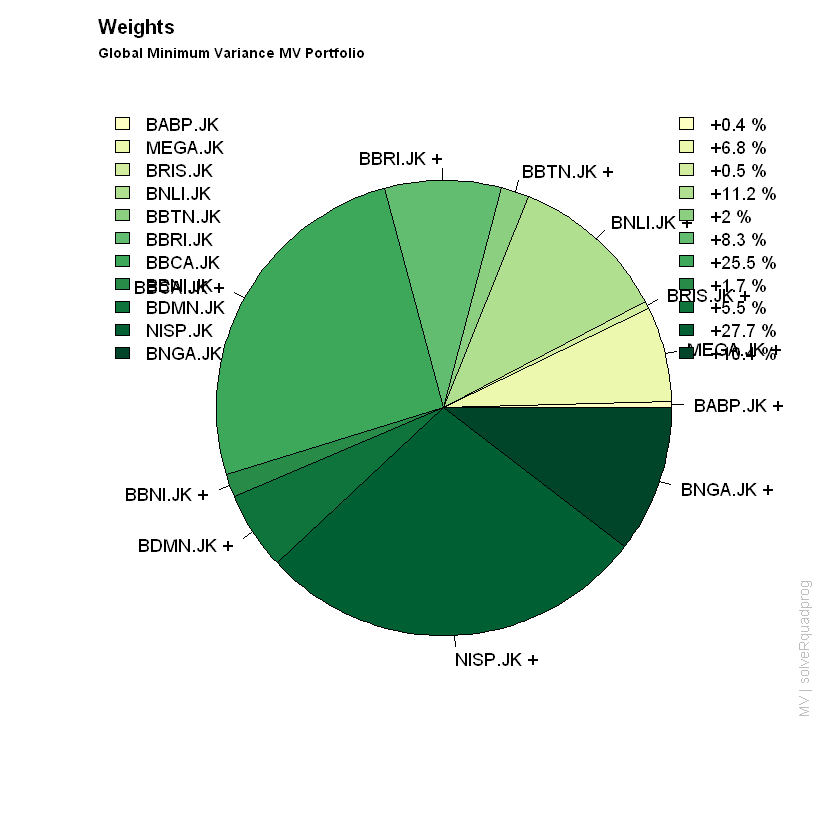

In [63]:
col <- seqPalette(ncol(ts_returns), "YlGn")
weightsPie(globminPortfolio, box = FALSE, col = col)
mtext(text = "Global Minimum Variance MV Portfolio", side = 3,
      line = 1.5, font = 2, cex = 0.7, adj = 0)

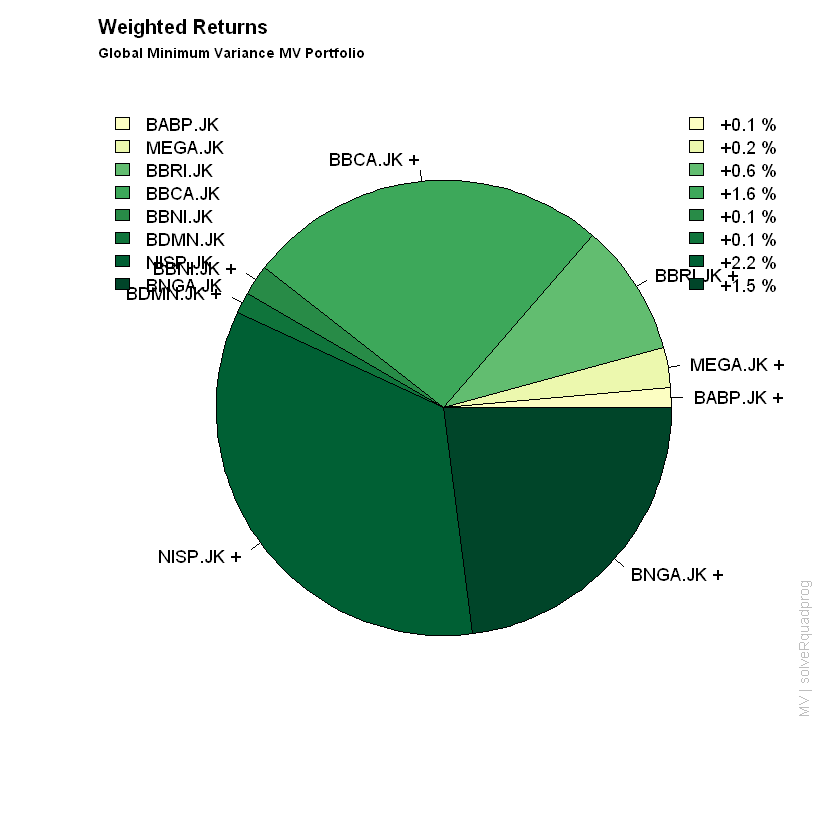

In [64]:
weightedReturnsPie(globminPortfolio, box = FALSE, col = col)
mtext(text = "Global Minimum Variance MV Portfolio", side = 3,
      line = 1.5, font = 2, cex = 0.7, adj = 0)

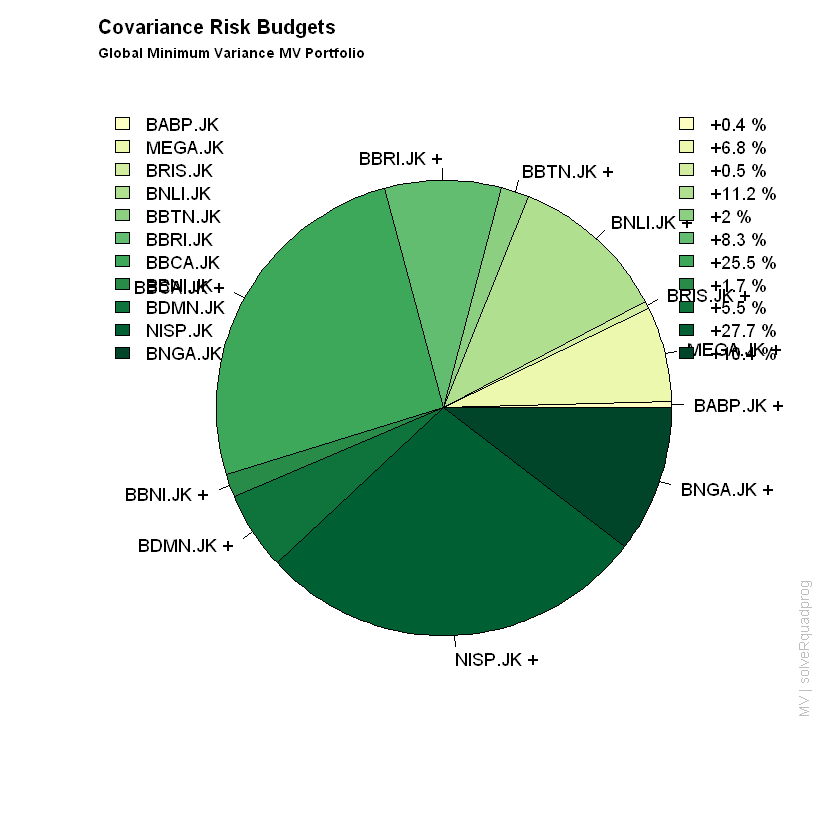

In [65]:
covRiskBudgetsPie(globminPortfolio, box = FALSE, col = col)
mtext(text = "Global Minimum Variance MV Portfolio", side = 3,
line = 1.5, font = 2, cex = 0.7, adj = 0)

### 4.1.4 COMPUTE THE TANGENCY PORTFOLIO

In [66]:
tgSpec <- portfolioSpec()
setRiskFreeRate(tgSpec) <- 0

In [67]:
tgPortfolio <- tangencyPortfolio(data = ts_returns,
                                 spec = tgSpec,
                                 constraints = "LongOnly")
print(tgPortfolio)


Title:
 MV Tangency Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0806  0.0371  0.0199  0.0000  0.0000  0.0000  0.0476  0.1967  0.0361  0.0000 
NISP.JK BNGA.JK 
 0.2046  0.3774 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.2841  0.0585  0.0039  0.0000  0.0000  0.0000  0.0256  0.0938  0.0220  0.0000 
NISP.JK BNGA.JK 
 0.1183  0.3938 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.1347 1.2090 2.3071 1.6240 

Description:
 Mon Sep  4 10:17:48 2023 by user: Kevin 


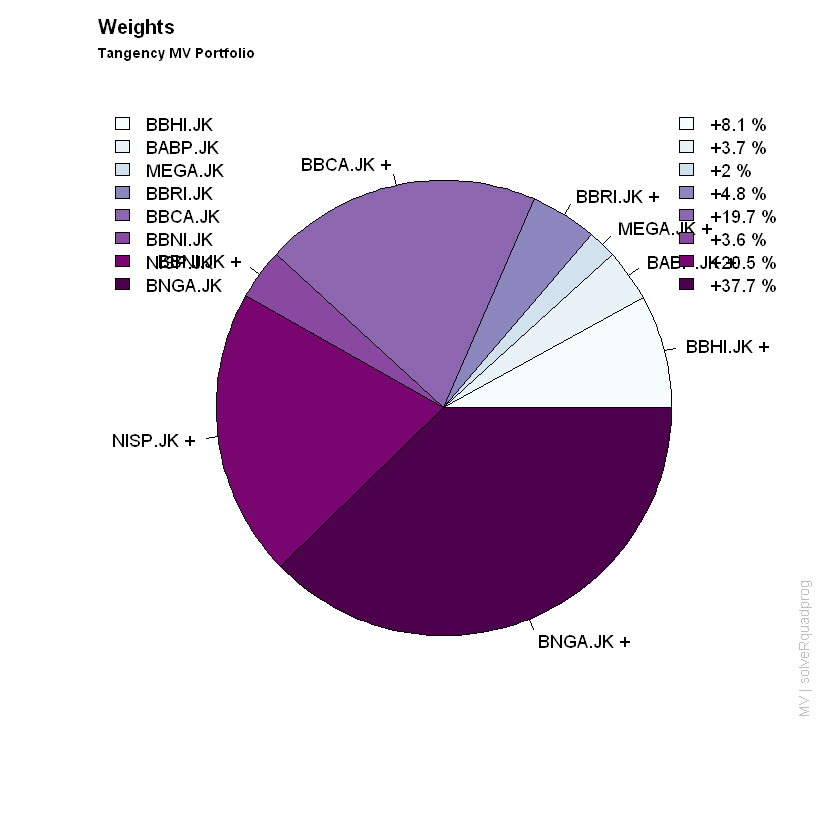

In [68]:
col <- seqPalette(ncol(ts_returns), "BuPu")
weightsPie(tgPortfolio, box = FALSE, col = col)
mtext(text = "Tangency MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

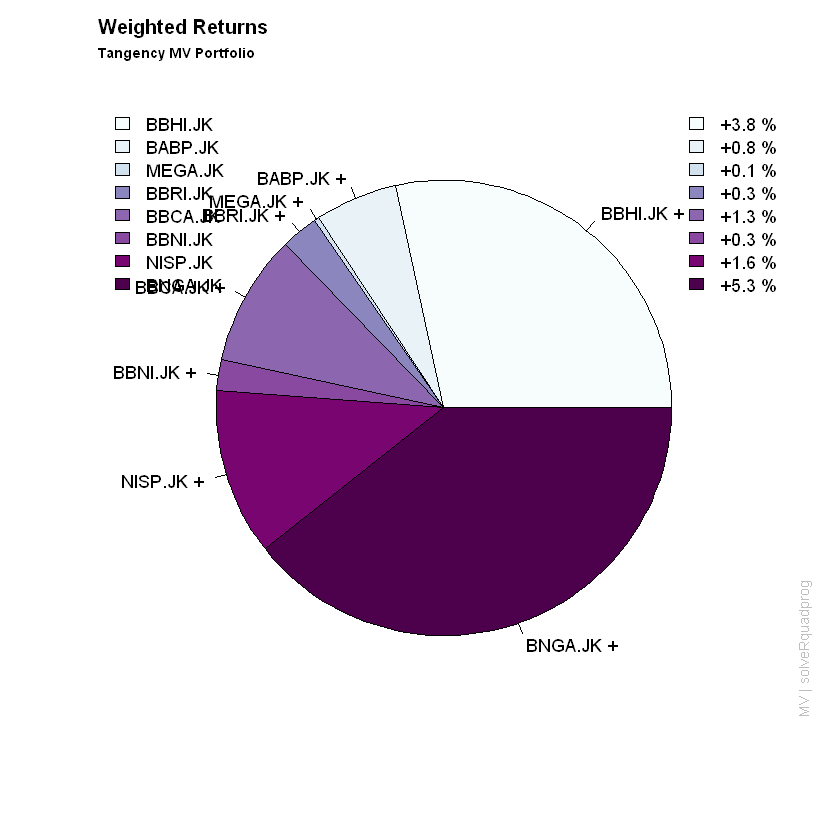

In [69]:
weightedReturnsPie(tgPortfolio, box = FALSE, col = col)
mtext(text = "Tangency MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

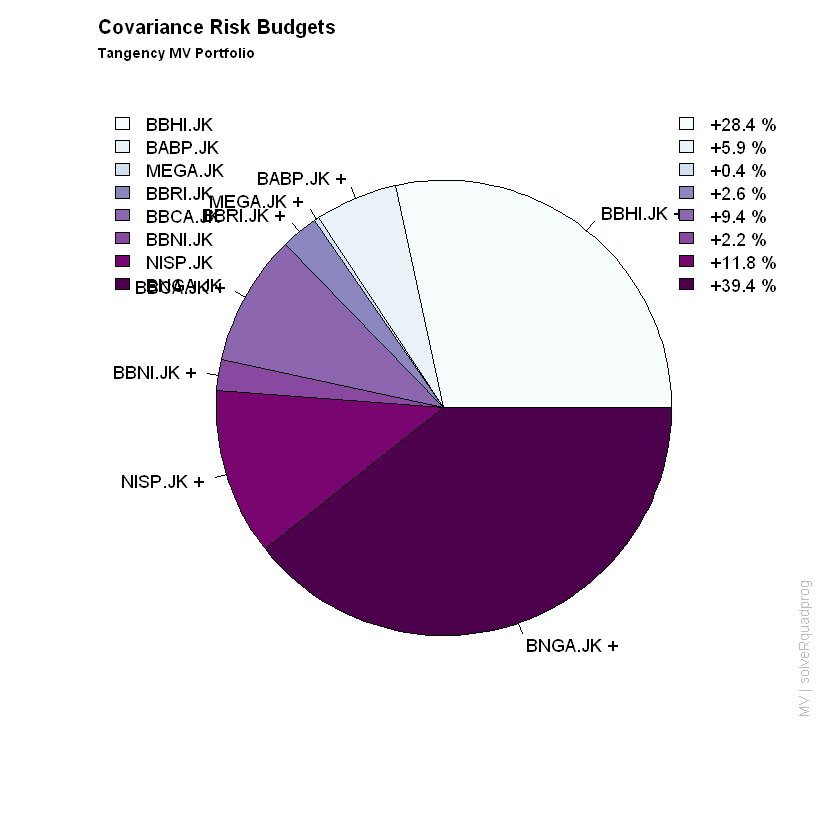

In [70]:
covRiskBudgetsPie(tgPortfolio, box = FALSE, col = col)
mtext(text = "Tangency MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)

## 5. MEAN-VARIANCE PORTFOLIO FRONTIERS

### 5.1 FRONTIER COMPUTATION AND GRAPHICAL DISPLAYS

In [71]:
lppSpec <- portfolioSpec()
setNFrontierPoints(lppSpec) <- 5
longFrontier <- portfolioFrontier(ts_returns, lppSpec)

In [72]:
print(longFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 Portfolio Points:  4 of 4 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.0687  0.0190  0.2069  0.0949  0.0512  0.2261  0.0000
2  0.1228  0.0510  0.0000  0.0000  0.0000  0.0000  0.0194  0.1381  0.0320
3  0.5098  0.1093  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
4  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.0871  0.2462  0.0000
2  0.0000  0.1377  0.4991
3  0.0000  0.0000  0.3809
4  0.0000  0.0000  0.0000

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.0648  0.0195  0.3023  0.1055  0.0413  0.1878  0.0000
2  0.4059  0.0697  0.0000  0.0000  0.0000  0.0000  0.0064  0.0374  0.0128
3  0.8944  0.0532  0.0000  0.0000  0.0000  

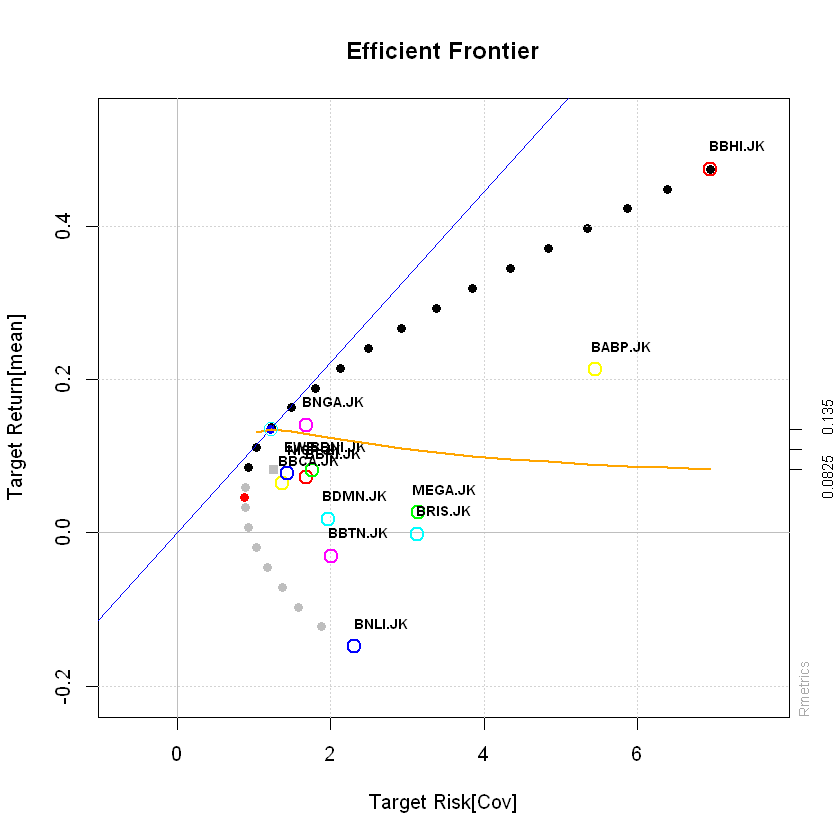

In [73]:
setNFrontierPoints(lppSpec) <- 25
longFrontier <- portfolioFrontier(ts_returns, lppSpec)
tailoredFrontierPlot(object = longFrontier, mText = "MV Portfolio - LongOnly Constraints",risk = "Cov")


### 5.3 UNLIMITED ‘SHORT’ PORTFOLIO FRONTIER

In [74]:
shortSpec <- portfolioSpec()
setNFrontierPoints(shortSpec) <- 5
setSolver(shortSpec) <- "solveRshortExact"
shortFrontier <- portfolioFrontier(
data = ts_returns,
spec = shortSpec,
constraints = "Short")
print(shortFrontier)


Warning message in as.vector(invSigma %*% one)/(one %*% invSigma %*% one):
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"



Title:
 MV Portfolio Frontier 
 Estimator:         covEstimator 
 Solver:            solveRshortExact 
 Optimize:          minRisk 
 Constraints:       Short 
 Portfolio Points:  5 of 5 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1 -0.0910 -0.0367  0.0708  0.0625  0.5069  0.3104  0.0100  0.1781 -0.1399
2 -0.0219 -0.0027  0.0683  0.0162  0.1899  0.0751  0.0688  0.2388 -0.0112
3  0.0473  0.0314  0.0659 -0.0301 -0.1270 -0.1602  0.1277  0.2994  0.1175
4  0.1164  0.0655  0.0634 -0.0765 -0.4440 -0.3955  0.1865  0.3601  0.2462
5  0.1856  0.0996  0.0610 -0.1228 -0.7609 -0.6308  0.2454  0.4207  0.3749
  BDMN.JK NISP.JK BNGA.JK
1  0.1711  0.1988 -0.2410
2  0.0765  0.2624  0.0396
3 -0.0181  0.3261  0.3201
4 -0.1127  0.3898  0.6007
5 -0.2073  0.4535  0.8813

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.1154  0.0116  0.0257  0.0291  0.5069  0.1768  0.0019  0.0401 -0.0225
2  0.0002 -0.0015 

Warning message in as.vector(invSigma %*% one)/(one %*% invSigma %*% one):
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in as.vector(invSigma %*% one)/(one %*% invSigma %*% one):
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in as.vector(invSigma %*% one)/(one %*% invSigma %*% one):
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"


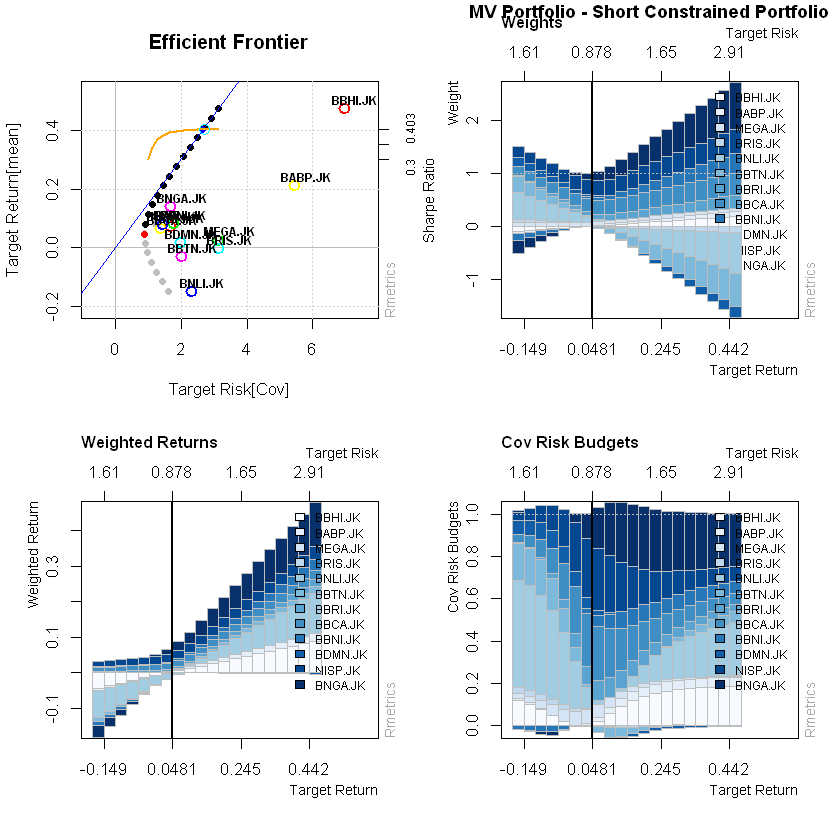

In [75]:
par(mfrow=c(2,2))
setNFrontierPoints(shortSpec) <- 20
shortFrontier <- portfolioFrontier(data = ts_returns, spec = shortSpec,
                                   constraints = "Short")
tailoredFrontierPlot(object = shortFrontier, mText = "MV Portfolio - Short Constraints",
                     risk = "Cov")
weightsPlot(shortFrontier)
text <- "MV Portfolio - Short Constrained Portfolio"
mtext(text, side = 3, line = 3, font = 2, cex = 0.9)
weightedReturnsPlot(shortFrontier)
covRiskBudgetsPlot(shortFrontier)

### 5.4 THE BOX-CONSTRAINED PORTFOLIO FRONTIER

In [76]:
boxSpec <- portfolioSpec()
setNFrontierPoints(boxSpec) <- 15
boxConstraints <- c("minW[1:6]=0.01","maxW[1:6]=0.5")
boxFrontier <- portfolioFrontier(data = ts_returns,
                                 spec = boxSpec,
                                 constraints = boxConstraints)
print(boxFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       minW maxW 
 Portfolio Points:  5 of 9 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0100  0.0100  0.0662  0.0338  0.4543  0.2488  0.0000  0.0420  0.0000
3  0.0100  0.0100  0.0680  0.0126  0.1603  0.0649  0.0656  0.2427  0.0000
5  0.0629  0.0307  0.0303  0.0100  0.0100  0.0100  0.0515  0.2153  0.0318
7  0.2056  0.0741  0.0100  0.0100  0.0100  0.0100  0.0000  0.0000  0.0000
9  0.4662  0.1022  0.0100  0.0100  0.0100  0.0100  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.1051  0.0299  0.0000
3  0.0754  0.2554  0.0351
5  0.0000  0.2257  0.3218
7  0.0000  0.0000  0.6803
9  0.0000  0.0000  0.3916

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0116  0.0069  0.0317  0.0214  0.6588  0.1974  0.0000  0.0112  0.0000
3  0.0188  0.012

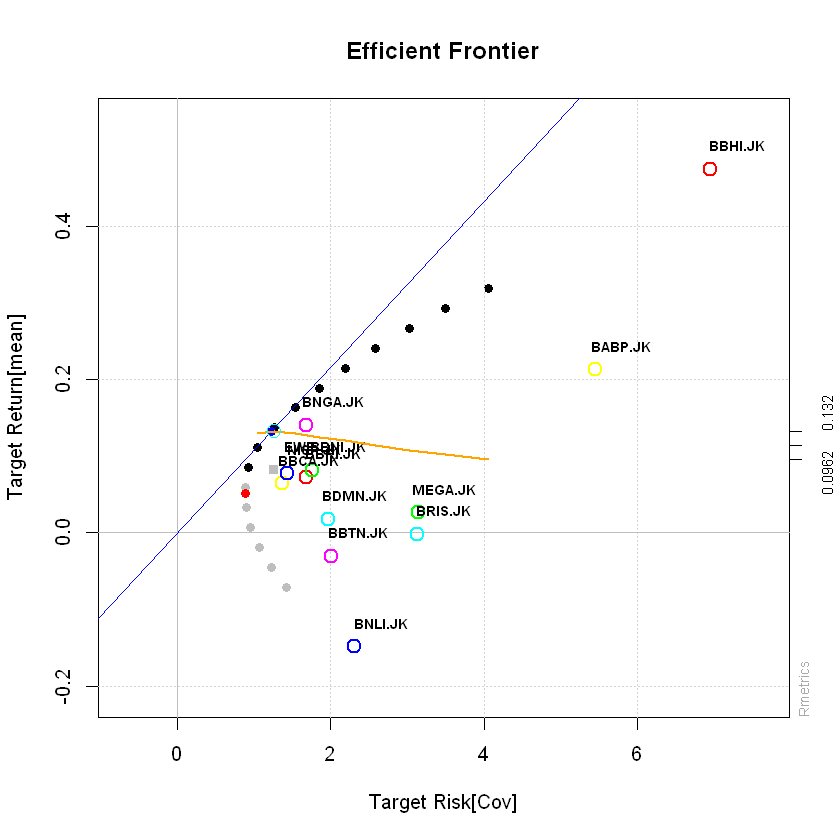

In [77]:
setNFrontierPoints(boxSpec) <- 25
boxFrontier <- portfolioFrontier(data = ts_returns, spec = boxSpec,
                                 constraints = boxConstraints)
tailoredFrontierPlot(object = boxFrontier, mText = "MV Portfolio - Box Constraints",
                     risk = "Cov")

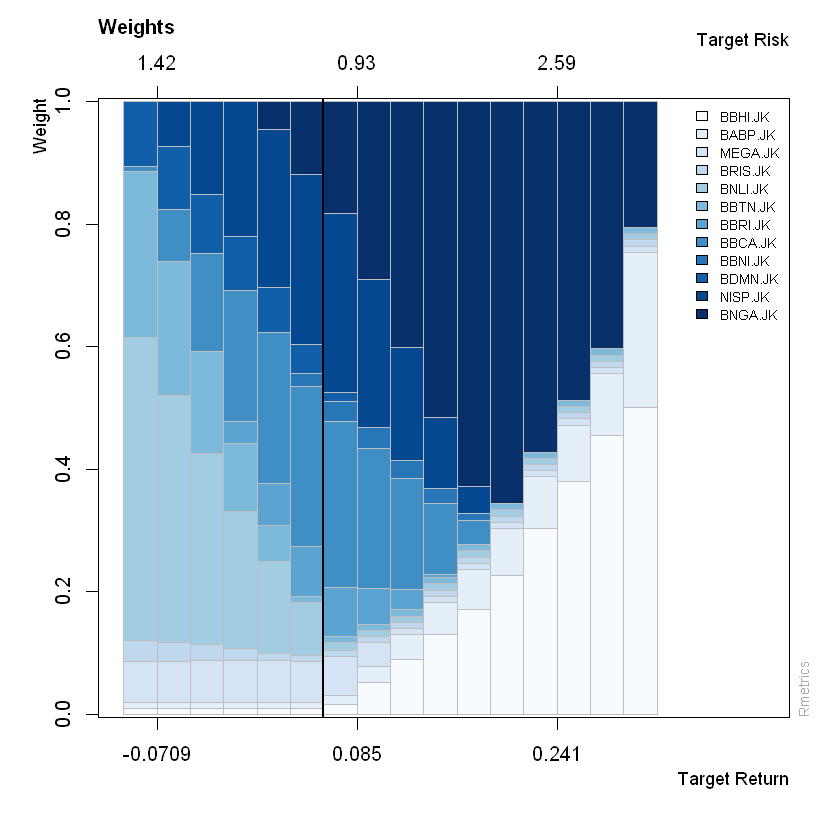

In [78]:
weightsPlot(boxFrontier)

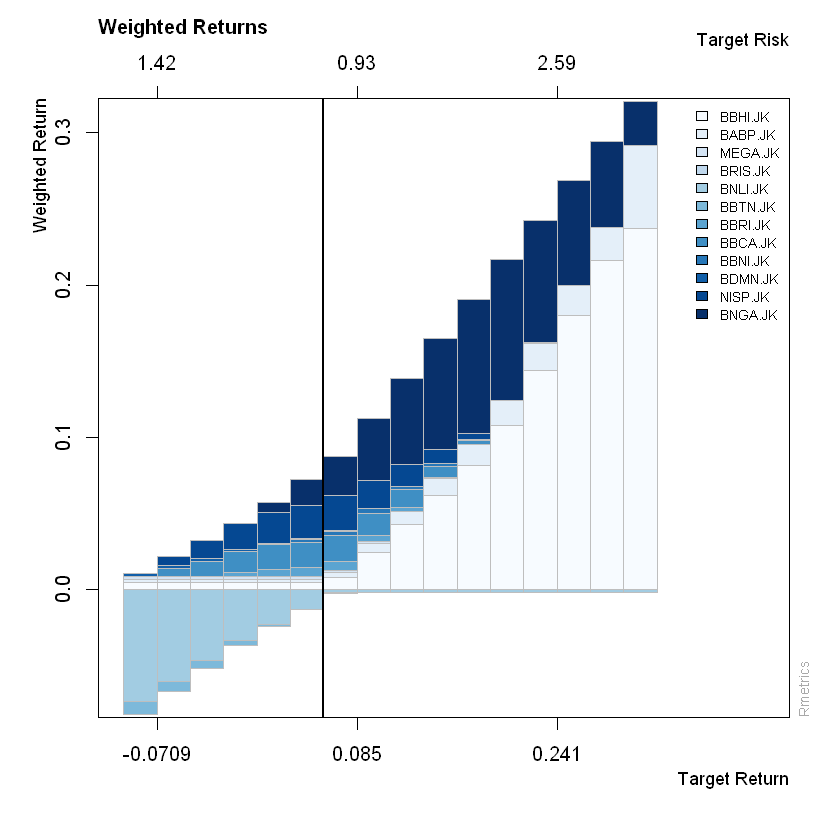

In [79]:
weightedReturnsPlot(boxFrontier)

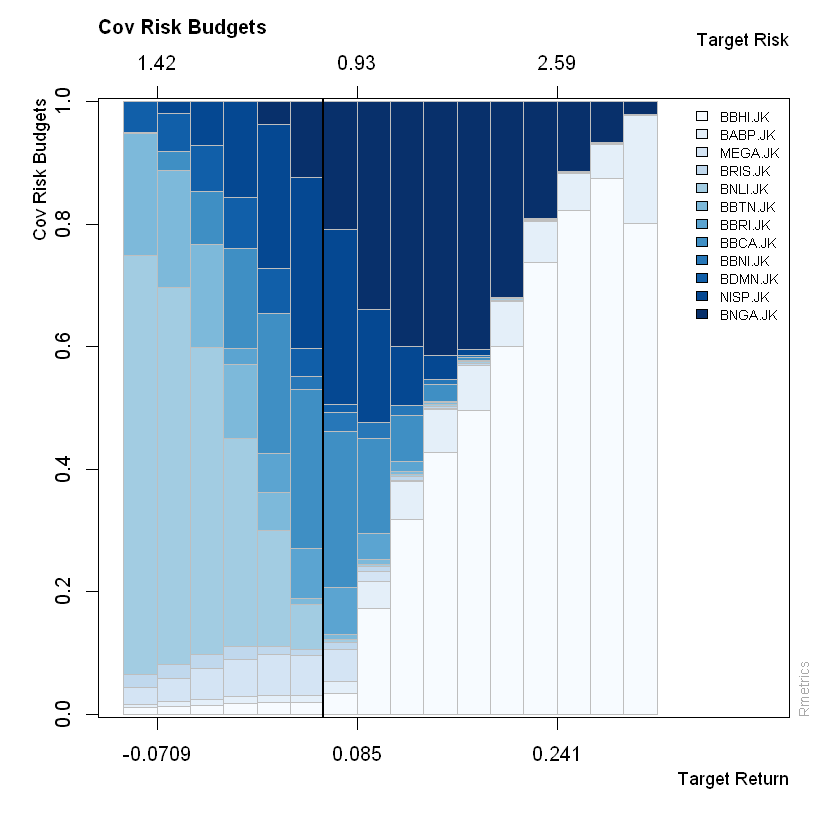

In [80]:
covRiskBudgetsPlot(boxFrontier)

###  5.5 THE GROUP-CONSTRAINED PORTFOLIO FRONTIER

In [81]:
groupSpec <- portfolioSpec()
setNFrontierPoints(groupSpec) <- 7
groupConstraints <- c("minsumW[c(1,4)]=0.3",
                      "maxsumW[c(2,5)]=0.5")
groupFrontier <- portfolioFrontier(data = ts_returns,
                                   spec = groupSpec,
                                   constraints = groupConstraints)
print(groupFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       minsumW maxsumW 
 Portfolio Points:  5 of 6 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.0428  0.3000  0.3594  0.0972  0.0000  0.0817  0.0000
2  0.0475  0.0000  0.0443  0.2525  0.0592  0.0000  0.0000  0.2702  0.0000
3  0.1685  0.0342  0.0000  0.1315  0.0000  0.0000  0.0000  0.1384  0.0000
4  0.3578  0.0929  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
6  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.0587  0.0602  0.0000
2  0.0250  0.2489  0.0524
3  0.0000  0.1138  0.4135
4  0.0000  0.0000  0.5493
6  0.0000  0.0000  0.0000

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.0168  0.5002  0.3670  0.0579  0.0000  0.0209  0.0000
2  0.1067 

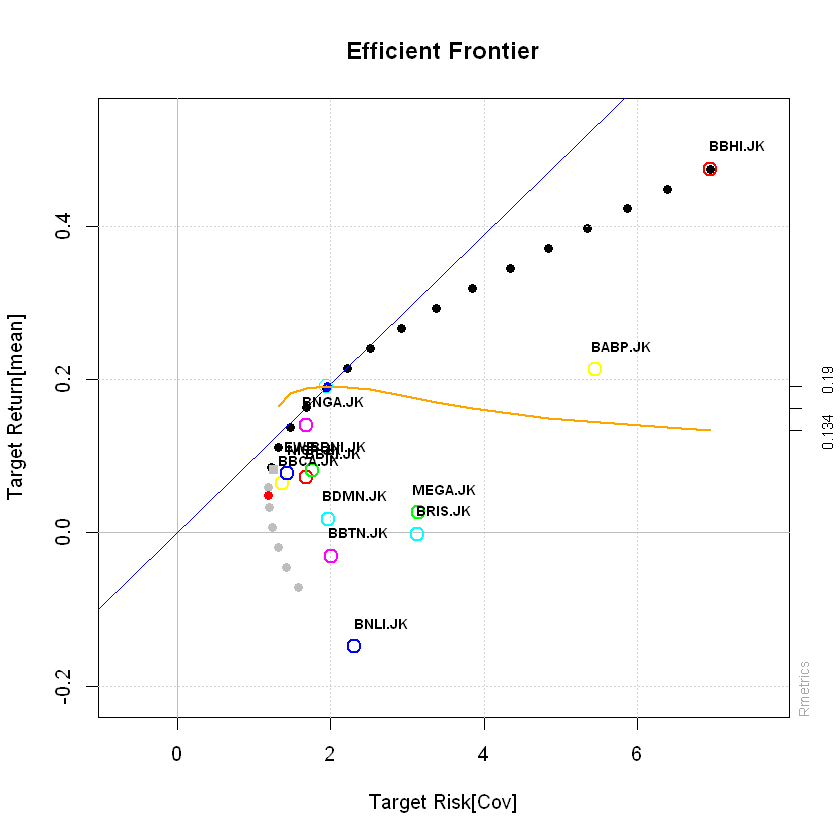

In [82]:
groupSpec <- portfolioSpec()
setNFrontierPoints(groupSpec) <- 25
groupFrontier <- portfolioFrontier(data = ts_returns, spec = groupSpec,
                                   constraints = groupConstraints)
tailoredFrontierPlot(object = groupFrontier, mText = "MV Portfolio - Group Constraints",
                     risk = "Cov")

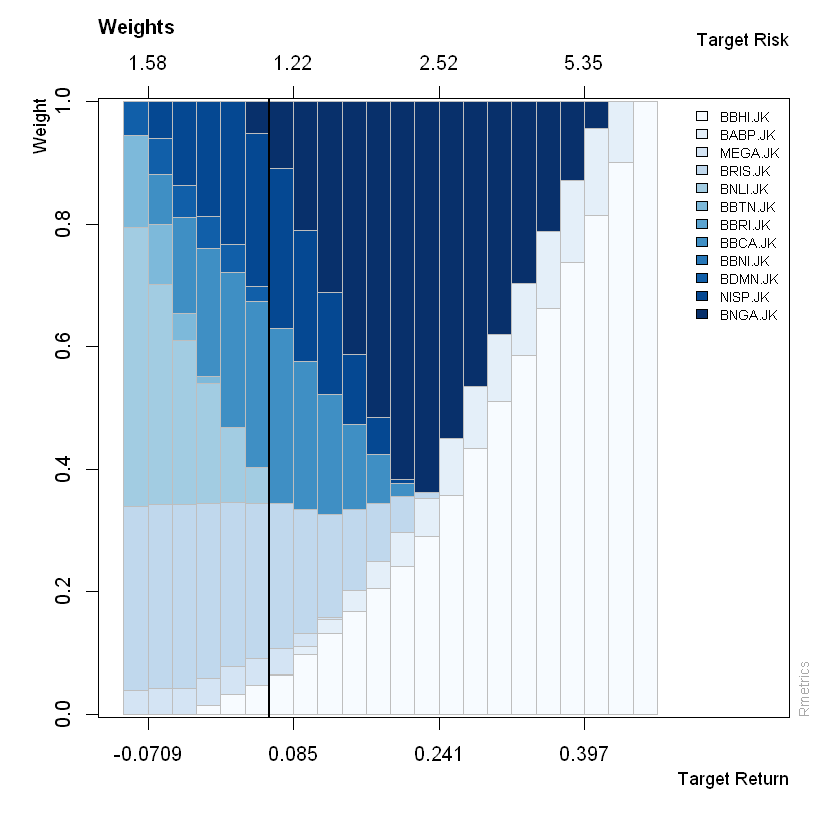

In [83]:
weightsPlot(groupFrontier)

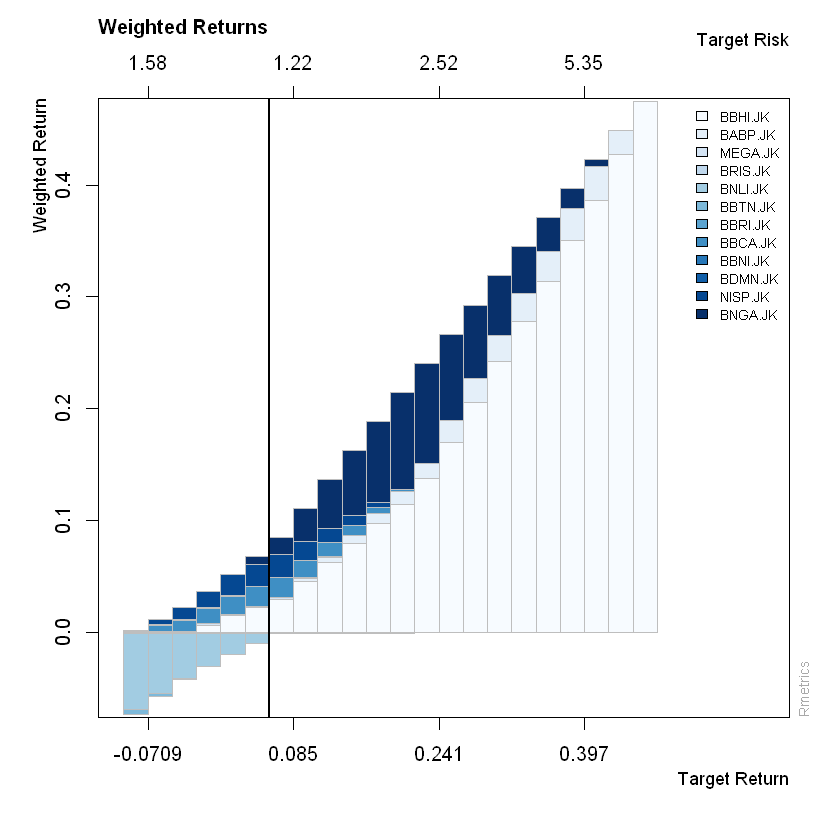

In [84]:
weightedReturnsPlot(groupFrontier)

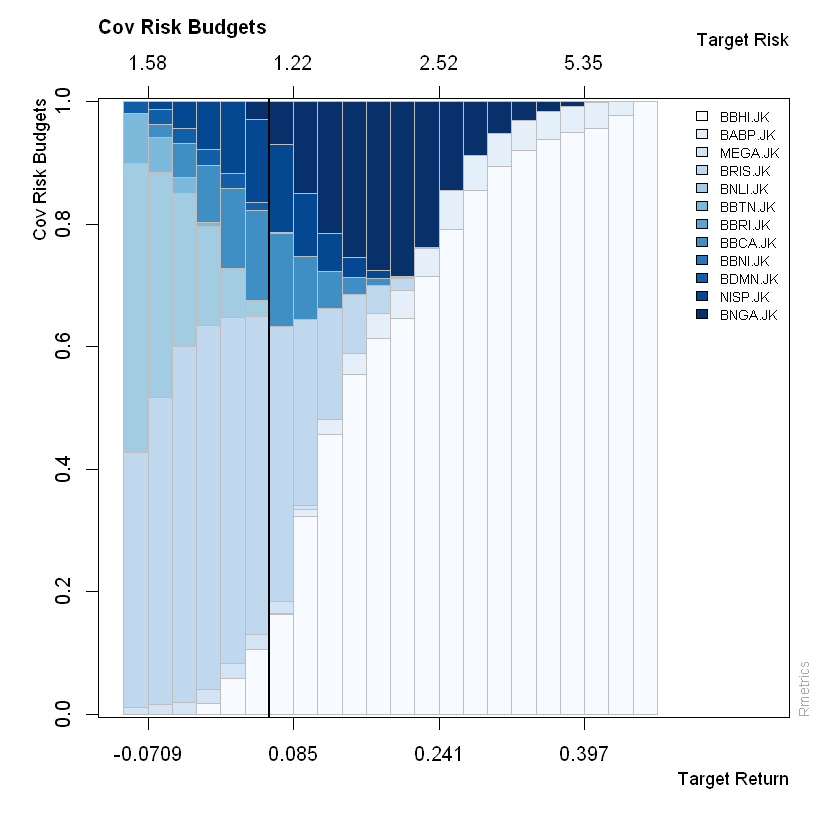

In [85]:
covRiskBudgetsPlot(groupFrontier)

### 5.6 THE BOX/GROUP-CONSTRAINED PORTFOLIO FRONTIER

In [86]:
boxgroupSpec <- portfolioSpec()
setNFrontierPoints(boxgroupSpec) <- 15
boxgroupConstraints <- c(boxConstraints,
                         groupConstraints)
boxgroupFrontier <- portfolioFrontier(data = ts_returns,
                                      spec = boxgroupSpec,
constraints = boxgroupConstraints)
print(boxgroupFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       minW maxW minsumW maxsumW 
 Portfolio Points:  5 of 9 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0100  0.0100  0.0419  0.2900  0.4328  0.1455  0.0000  0.0089  0.0000
3  0.0285  0.0100  0.0442  0.2715  0.1341  0.0100  0.0000  0.2401  0.0000
5  0.1121  0.0168  0.0126  0.1879  0.0100  0.0100  0.0000  0.2128  0.0000
7  0.2369  0.0532  0.0100  0.0631  0.0100  0.0100  0.0000  0.0132  0.0000
9  0.4662  0.1022  0.0100  0.0100  0.0100  0.0100  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.0608  0.0000  0.0000
3  0.0422  0.2194  0.0000
5  0.0000  0.1884  0.2494
7  0.0000  0.0059  0.5976
9  0.0000  0.0000  0.3916

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0093  0.0054  0.0140  0.4101  0.4546  0.0825  0.0000  0.0016  0.0000


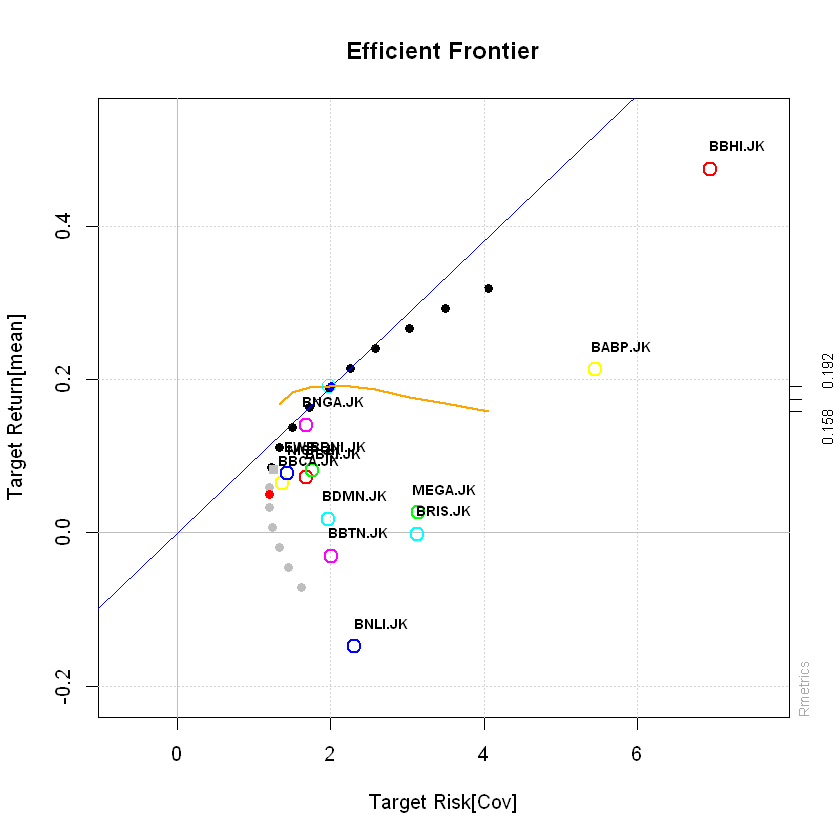

In [87]:
boxgroupSpec <- portfolioSpec()
setNFrontierPoints(boxgroupSpec) <- 25
boxgroupFrontier <- portfolioFrontier(
    data = ts_returns,
    spec = boxgroupSpec,
    constraints = boxgroupConstraints)
tailoredFrontierPlot(object = boxgroupFrontier,
                     mText = "MV Portfolio - Box/Group Constraints",
                     risk = "Cov")

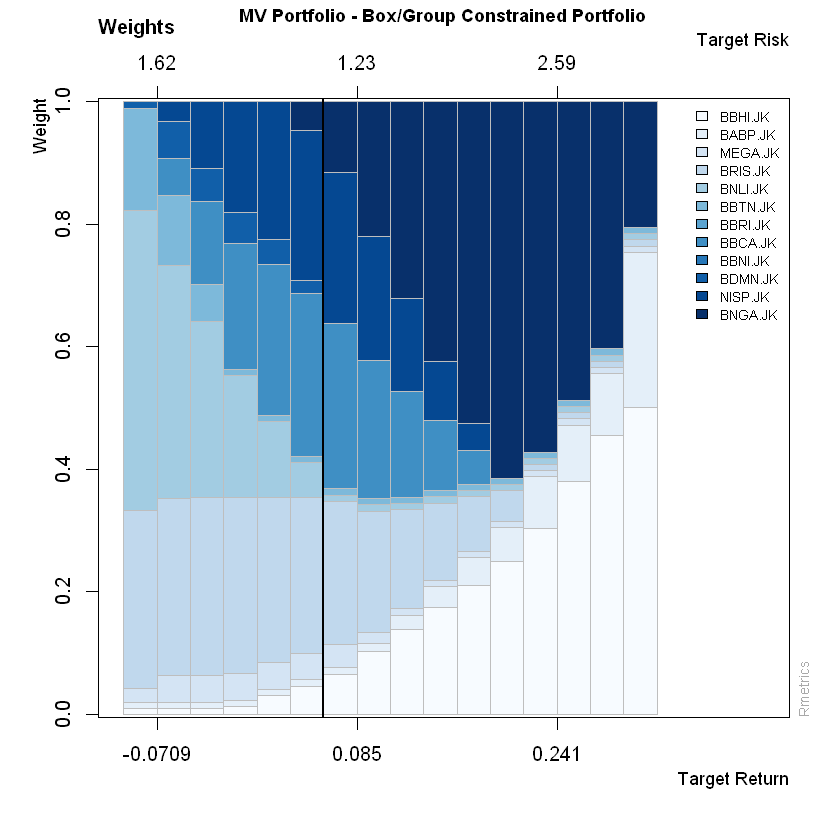

In [88]:
weightsPlot(boxgroupFrontier)
text <- "MV Portfolio - Box/Group Constrained Portfolio"
mtext(text, side = 3, line = 3, font = 2, cex = 0.9)

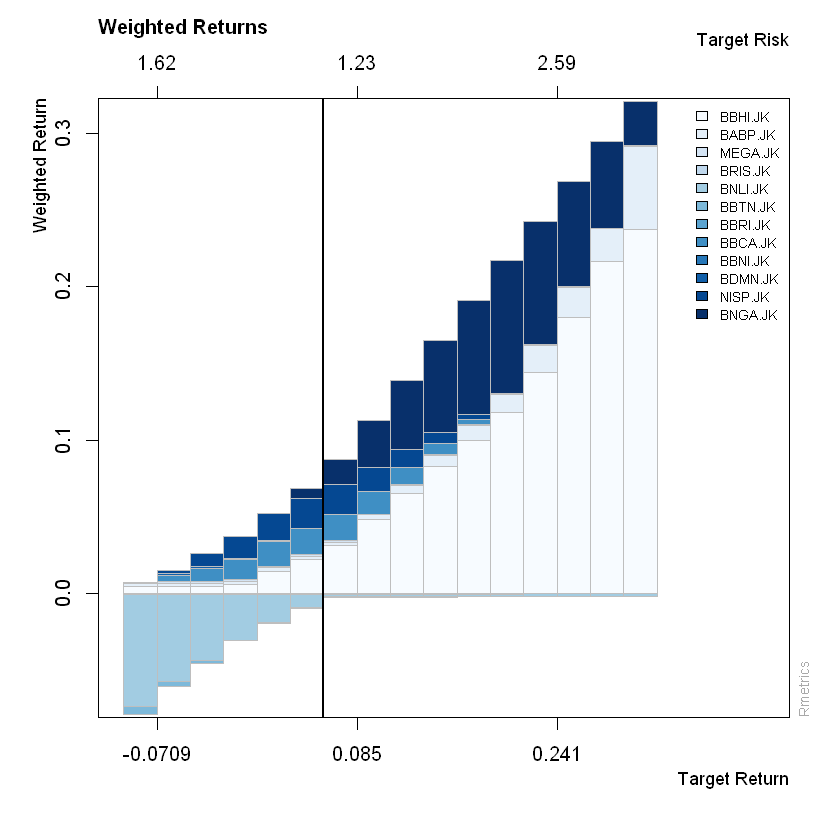

In [89]:
weightedReturnsPlot(boxgroupFrontier)

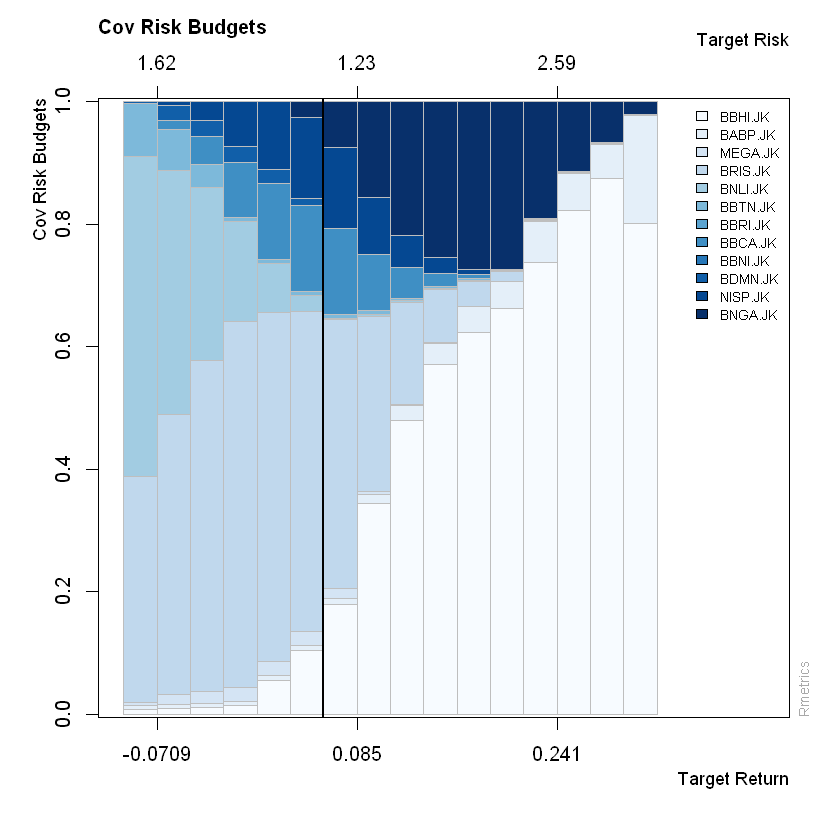

In [90]:
covRiskBudgetsPlot(boxgroupFrontier)

### 5.7 CREATING DIFFERENT ‘REWARD/RISK VIEWS’ ON THE EFFICIENT FRONTIER

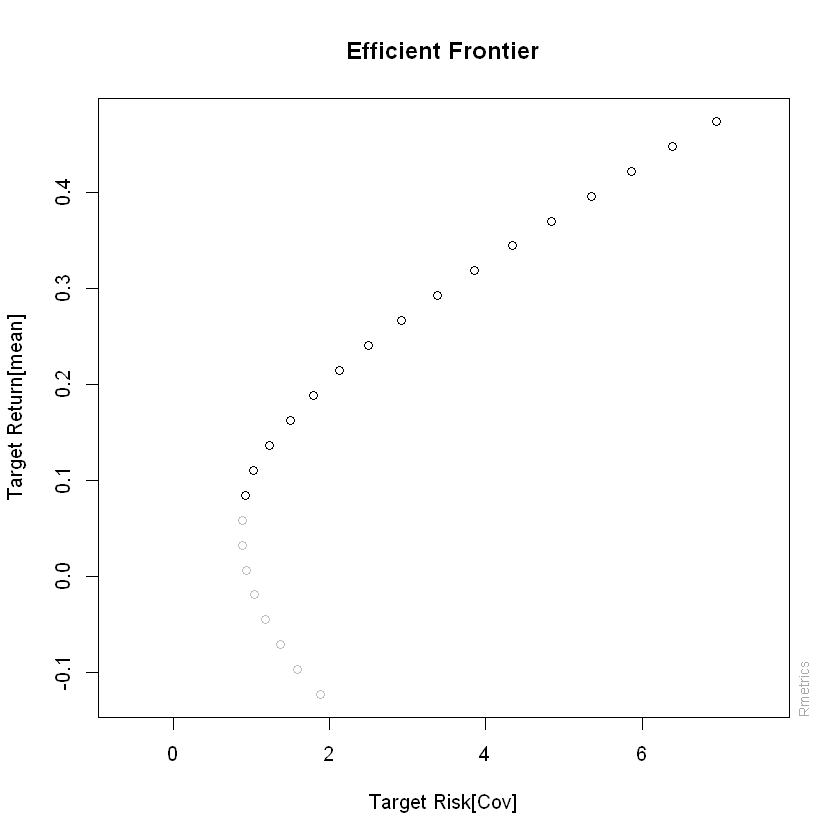

In [91]:
frontierPlot(longFrontier, auto = TRUE)

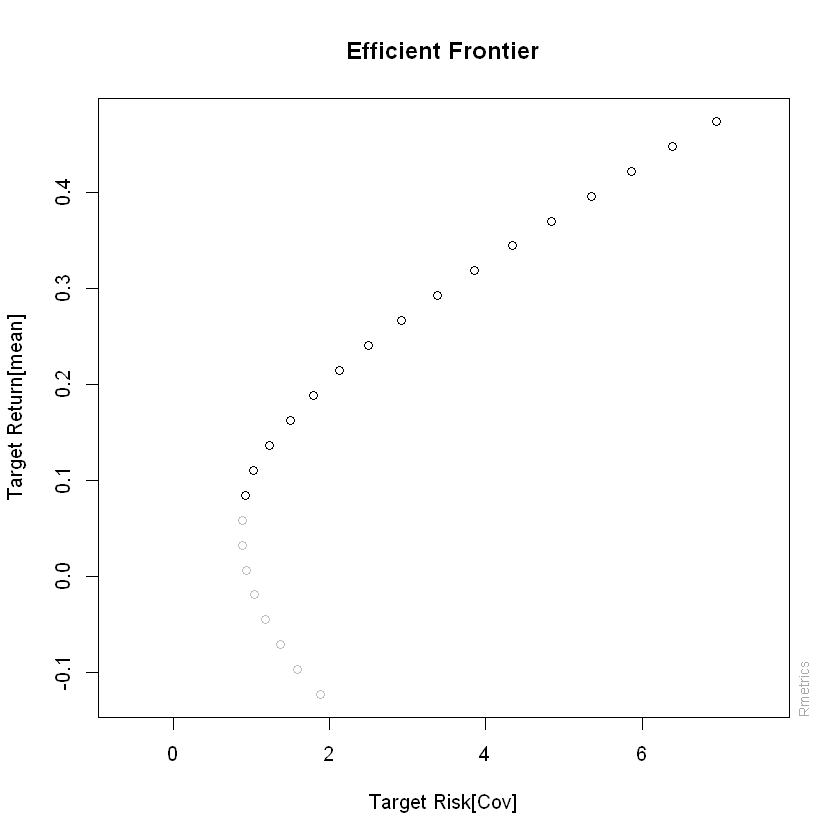

In [92]:
frontierPlot(longFrontier, return = "mean", 
             risk = "Cov", auto = FALSE)

Warning message in par(mfrows = c(1, 2)):
""mfrows" is not a graphical parameter"


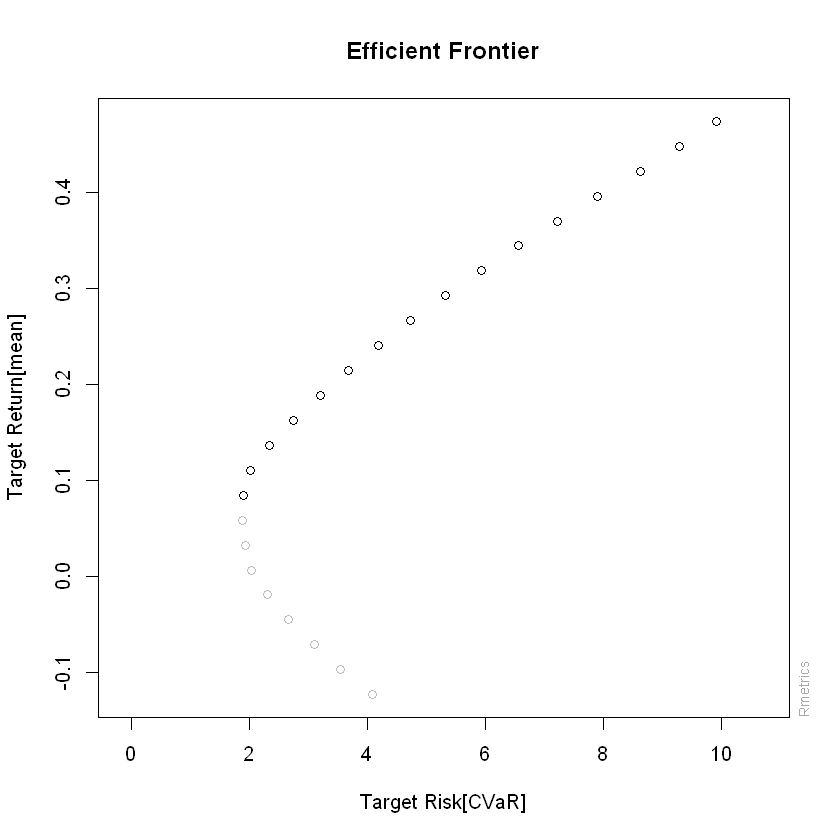

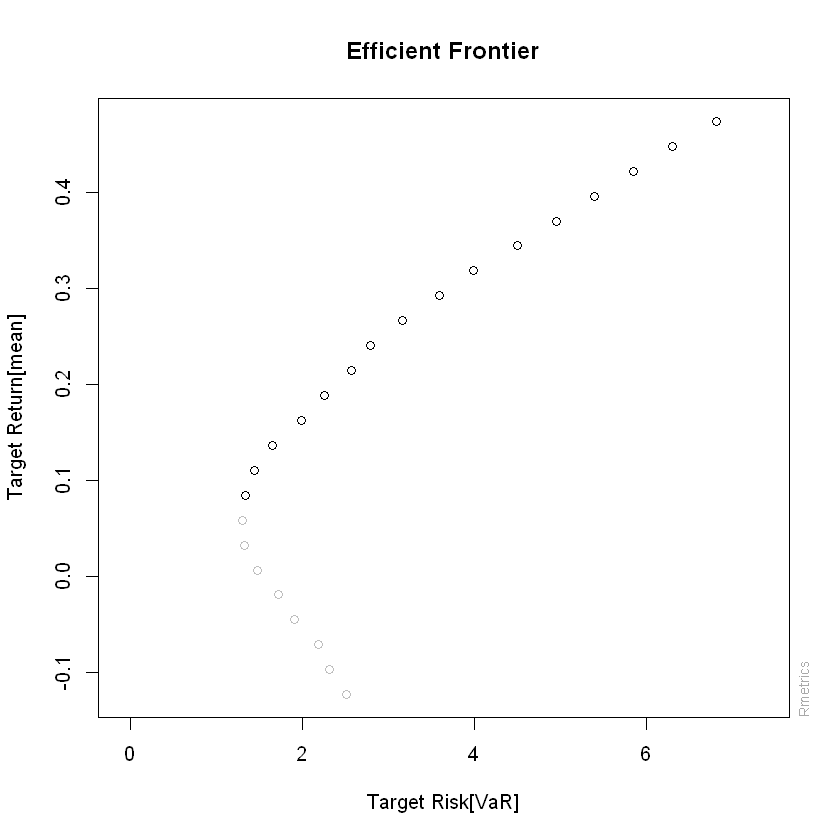

In [93]:
par(mfrows=c(1,2))
frontierPlot(longFrontier, return = "mean", risk = "CVaR",auto = FALSE)
frontierPlot(longFrontier, return = "mean", risk = "VaR",auto = FALSE)

## 6. ROBUST PORTFOLIOS AND COVARIANCE ESTIMATION

## 6.1  ROBUST MEAN AND COVARIANCE ESTIMATORS

In [94]:
getEstimator(portfolioSpec())

[1] "covEstimator"

## 6.2 THE MCD ROBUSTIFIED MEAN-VARIANCE PORTFOLIO

In [95]:
covMcdEstimate <- covMcdEstimator(ts_returns)
fastCovMcdEstimator <- function(x, spec = NULL, ...) covMcdEstimate

In [96]:
covMcdSpec <- portfolioSpec()
setEstimator(covMcdSpec) <- "fastCovMcdEstimator"
setNFrontierPoints(covMcdSpec) <- 5

In [97]:
covMcdFrontier <- portfolioFrontier(data = ts_returns, spec = covMcdSpec)
print(covMcdFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         fastCovMcdEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 Portfolio Points:  4 of 4 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.2444  0.0000  0.2507  0.0000  0.0670  0.1017  0.0387
2  0.1535  0.0558  0.1554  0.0000  0.0000  0.0000  0.0449  0.0489  0.0397
3  0.5062  0.1260  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
4  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.0762  0.1449  0.0764
2  0.0000  0.0973  0.4046
3  0.0000  0.0000  0.3678
4  0.0000  0.0000  0.0000

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.4835  0.0000  0.2923  0.0000  0.0302  0.0437  0.0186
2  0.5184  0.0722  0.0961  0.0000  0.0000  0.0000  0.0123  0.0093  0.0129
3  0.8849  0.0652  0.0000  0.0000  0

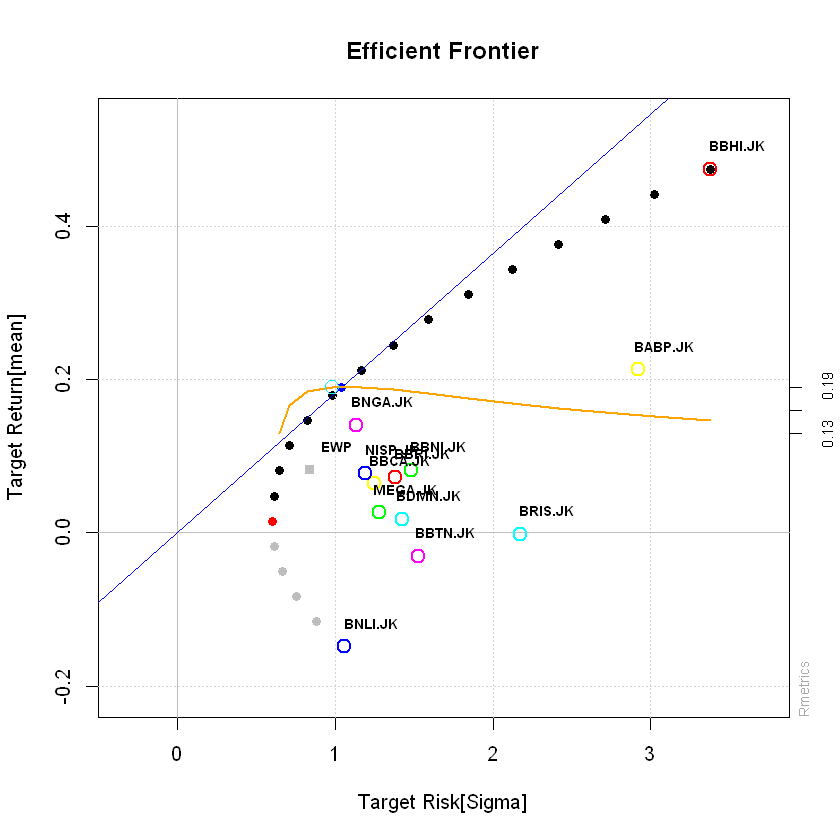

In [98]:
setNFrontierPoints(covMcdSpec) <- 20
covMcdFrontier <- portfolioFrontier(data = ts_returns, spec = covMcdSpec)
tailoredFrontierPlot(covMcdFrontier,mText = "MCD Robustified MV Portfolio",risk = "Sigma")

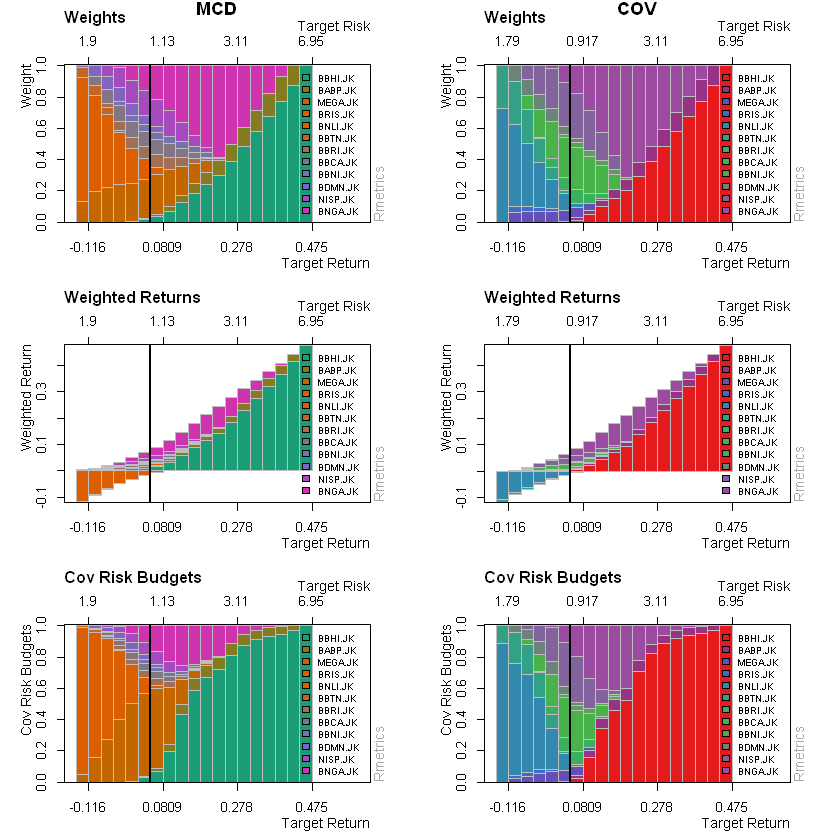

In [99]:
 ## MCD robustified portfolio
par(mfcol = c(3, 2), mar = c(3.5, 4, 4, 3) + 0.1)
col = qualiPalette(30, "Dark2")
weightsPlot(covMcdFrontier, col = col)
text <- "MCD"
mtext(text, side = 3, line = 3, font = 2, cex = 0.9)
weightedReturnsPlot(covMcdFrontier, col = col)
covRiskBudgetsPlot(covMcdFrontier, col = col)
## Sample covariance MV portfolio
longSpec <- portfolioSpec()
setNFrontierPoints(longSpec) <- 20
longFrontier <- portfolioFrontier(data = ts_returns, spec = longSpec)
col = qualiPalette(30, "Set1")
weightsPlot(longFrontier, col = col)
text <- "COV"
mtext(text, side = 3, line = 3, font = 2, cex = 0.9)
weightedReturnsPlot(longFrontier, col = col)
covRiskBudgetsPlot(longFrontier, col = col)

## 6.3 THE MVE ROBUSTIFIED MEAN-VARIANCE PORTFOLIO

mveEstimate <- mveEstimator(ts_returns)
fastMveEstimator <- function(x, spec = NULL, ...) mveEstimate

weightedReturnsPlot(mveFrontier, col = col)
boxL()

covRiskBudgetsPlot(mveFrontier, col = col)
boxL()

## 6.4  THE OGK ROBUSTIFIED MEAN-VARIANCE PORTFOLIO

## 6.5  THE SHRINKED MEAN-VARIANCE PORTFOLIO

# 7. MEAN-CVAR PORTFOLIO SETTINGS

### 7.0 PORTFOLIO SPECIFICATION

In [100]:
cvarSpec <- portfolioSpec()
setType(cvarSpec) = "CVaR"
setAlpha(cvarSpec) = 0.05
setSolver(cvarSpec) = "solveRglpk"

Solver set to solveRquadprog

setSolver: solveRglpk



In [101]:
print(cvarSpec)


Model List:	
 Type:                      CVaR
 Optimize:                  minRisk
 Estimator:                 covEstimator
 Params:                    alpha = 0.05

Portfolio List:	
 Target Weights:            NULL
 Target Return:             NULL
 Target Risk:               NULL
 Risk-Free Rate:            0
 Number of Frontier Points: 50

Optim List:	
 Solver:                    solveRglpk
 Objective:                 portfolioObjective portfolioReturn portfolioRisk
 Trace:                     FALSE


### 7.1 COMPUTE A FEASIBLE MEAN-CVAR PORTFOLIO


In [102]:
cvarSpec <- portfolioSpec()
setType(cvarSpec) <- "CVAR"
nAssets <- ncol(ts_returns)
setWeights(cvarSpec) <- rep(1/nAssets, times = nAssets)
setSolver(cvarSpec) <- "solveRglpk.CVAR"
ewPortfolio <- feasiblePortfolio(
    data = ts_returns,
    spec = cvarSpec,
    constraints = "LongOnly")
print(ewPortfolio)

Solver set to solveRquadprog




Title:
 CVAR Feasible Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRglpk.CVAR 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833 
NISP.JK BNGA.JK 
 0.0833  0.0833 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.2846  0.1904  0.0543  0.0908  0.0478  0.0620  0.0501  0.0337  0.0566  0.0514 
NISP.JK BNGA.JK 
 0.0293  0.0490 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0823 1.2630 2.5273 1.7434 

Description:
 Mon Sep  4 10:18:31 2023 by user: Kevin 


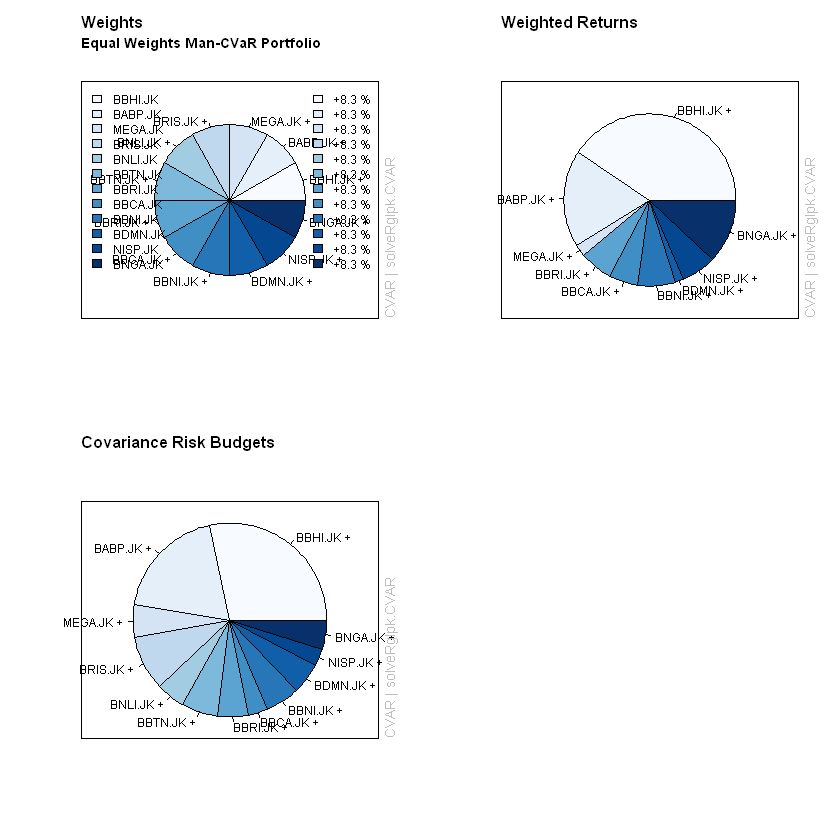

In [103]:
par(mfrow=c(2,2))
weightsPie(ewPortfolio, radius = 0.7)
text <- "Equal Weights Man-CVaR Portfolio"
mtext(text, side = 3, line = 1.5, font = 2, cex = 0.7, adj = 0)
weightedReturnsPie(ewPortfolio, radius = 0.8, legend = FALSE)
covRiskBudgetsPie(ewPortfolio, radius = 0.9, legend = FALSE)

In [104]:
setAlpha(cvarSpec) = 0.10
ew10Portfolio <- feasiblePortfolio(
data = ts_returns,
spec = cvarSpec,
constraints = "LongOnly")
print(ew10Portfolio)


Title:
 CVAR Feasible Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRglpk.CVAR 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833 
NISP.JK BNGA.JK 
 0.0833  0.0833 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.2846  0.1904  0.0543  0.0908  0.0478  0.0620  0.0501  0.0337  0.0566  0.0514 
NISP.JK BNGA.JK 
 0.0293  0.0490 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0823 1.2630 2.0466 1.3414 

Description:
 Mon Sep  4 10:18:32 2023 by user: Kevin 


### 7. 2 COMPUTE THE MEAN-CVAR PORTFOLIO WITH THE LOWEST RISK FOR A GIVEN RETURN

In [105]:
minriskSpec <- portfolioSpec()
setType(minriskSpec) <- "CVaR"
setAlpha(minriskSpec) <- 0.05
setSolver(minriskSpec) <- "solveRglpk.CVAR"
setTargetReturn(minriskSpec) <- getTargetReturn(ewPortfolio@portfolio)["mean"]
minriskPortfolio <- efficientPortfolio(data = ts_returns, spec = minriskSpec,constraints = "LongOnly")
print(minriskPortfolio)

Solver set to solveRquadprog

setSolver: solveRglpk




Title:
 CVaR Efficient Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRglpk.CVAR 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 VaR Alpha:         0.05 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0155  0.0229  0.0429  0.0000  0.0302  0.0000  0.0705  0.2503  0.0223  0.0773 
NISP.JK BNGA.JK 
 0.2679  0.2003 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0320  0.0374  0.0255  0.0000  0.0143  0.0000  0.0648  0.2239  0.0213  0.0809 
NISP.JK BNGA.JK 
 0.2559  0.2440 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0823 0.9319 1.8391 1.3285 

Description:
 Mon Sep  4 10:18:33 2023 by user: Kevin 


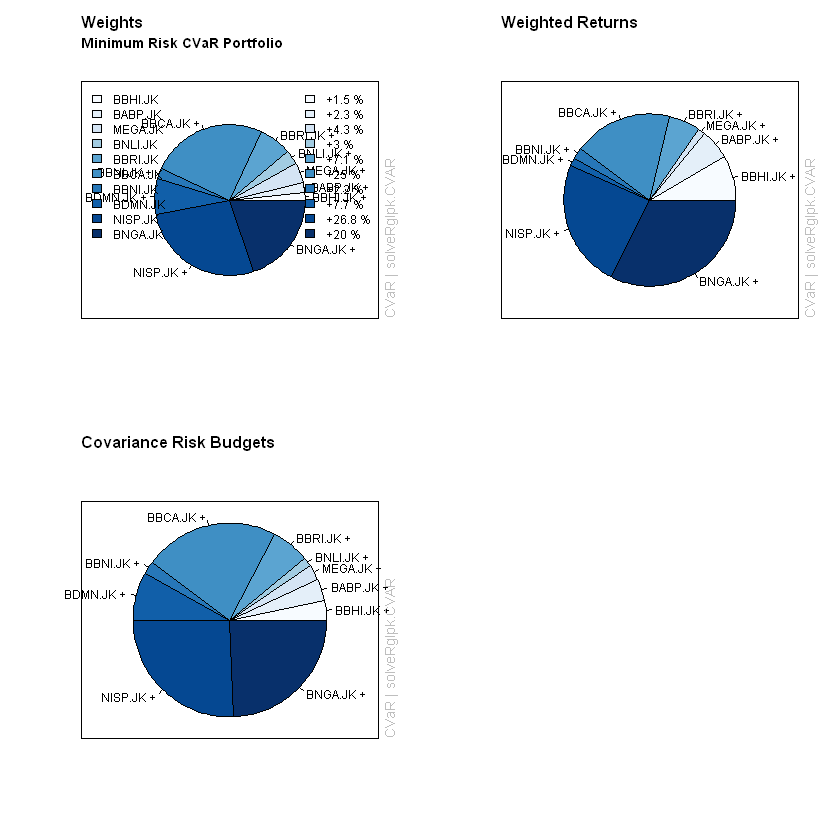

In [106]:
par(mfrow=c(2,2))
weightsPie(minriskPortfolio, radius = 0.7)
text <- "Minimum Risk CVaR Portfolio"
mtext(text, side = 3, line = 1.5, font = 2, cex = 0.7, adj = 0)

weightedReturnsPie(minriskPortfolio, radius = 0.8, legend = FALSE)
covRiskBudgetsPie(minriskPortfolio, radius = 0.9, legend = FALSE)

### 7.3 COMPUTE THE GLOBAL MINIMUM MEAN-CVAR PORTFOLIO

In [107]:
globminSpec <- portfolioSpec()
setType(globminSpec) <- "CVaR"
setAlpha(globminSpec) <- 0.05
setSolver(globminSpec) <- "solveRglpk.CVAR"
setTargetReturn(globminSpec) <- getTargetReturn(ewPortfolio@portfolio)["mean"]
globminPortfolio <- minriskPortfolio(data = ts_returns, spec = globminSpec,constraints = "LongOnly")
print(globminPortfolio)

Solver set to solveRquadprog

setSolver: solveRglpk




Title:
 CVaR Minimum Risk Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRglpk.CVAR 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 VaR Alpha:         0.05 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0160  0.0182  0.0452  0.0000  0.0480  0.0000  0.0675  0.2661  0.0255  0.1336 
NISP.JK BNGA.JK 
 0.2354  0.1444 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0326  0.0273  0.0296  0.0000  0.0284  0.0000  0.0642  0.2554  0.0260  0.1678 
NISP.JK BNGA.JK 
 0.2086  0.1601 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0706 0.9222 1.8311 1.3743 

Description:
 Mon Sep  4 10:18:34 2023 by user: Kevin 


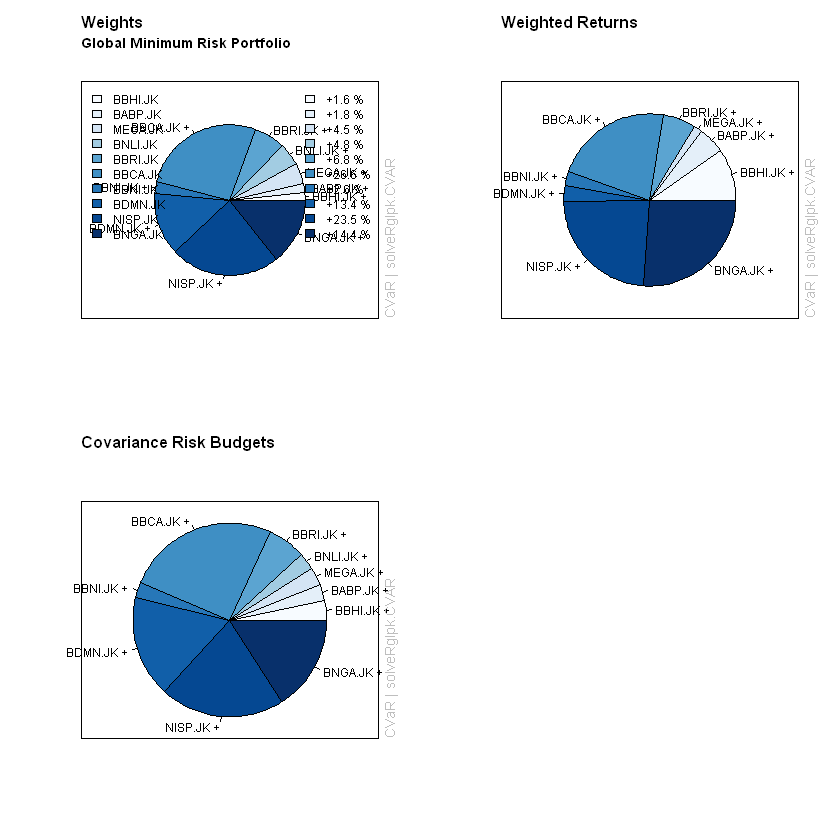

In [108]:
par(mfrow=c(2,2))
weightsPie(globminPortfolio, radius = 0.7)
text <- "Global Minimum Risk Portfolio"
mtext(text, side = 3, line = 1.5, font = 2, cex = 0.7, adj = 0)
weightedReturnsPie(globminPortfolio, radius = 0.8, legend = FALSE)
covRiskBudgetsPie(globminPortfolio, radius = 0.9, legend = FALSE)

In [109]:
ratioSpec <- portfolioSpec()
setType(ratioSpec) <- "CVaR"
setAlpha(ratioSpec) <- 0.05
setSolver(ratioSpec) <- "solveRglpk.CVAR"
setRiskFreeRate(ratioSpec) <- 0
ratioPortfolio <- maxratioPortfolio(data = ts_returns, 
                                    spec = ratioSpec,
                                    constraints = "LongOnly")
print(ratioPortfolio)

Solver set to solveRquadprog

setSolver: solveRglpk




Title:
 CVaR Max Return/Risk Ratio Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRglpk.CVAR 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 VaR Alpha:         0.05 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.1238  0.1178  0.0123  0.0000  0.0000  0.0000  0.0068  0.0749  0.0000  0.0000 
NISP.JK BNGA.JK 
 0.1753  0.4891 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.3621  0.2212  0.0009  0.0000  0.0000  0.0000  0.0016  0.0126  0.0000  0.0000 
NISP.JK BNGA.JK 
 0.0610  0.3407 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.1719 1.6380 2.8530 2.0854 

Description:
 Mon Sep  4 10:19:11 2023 by user: Kevin 


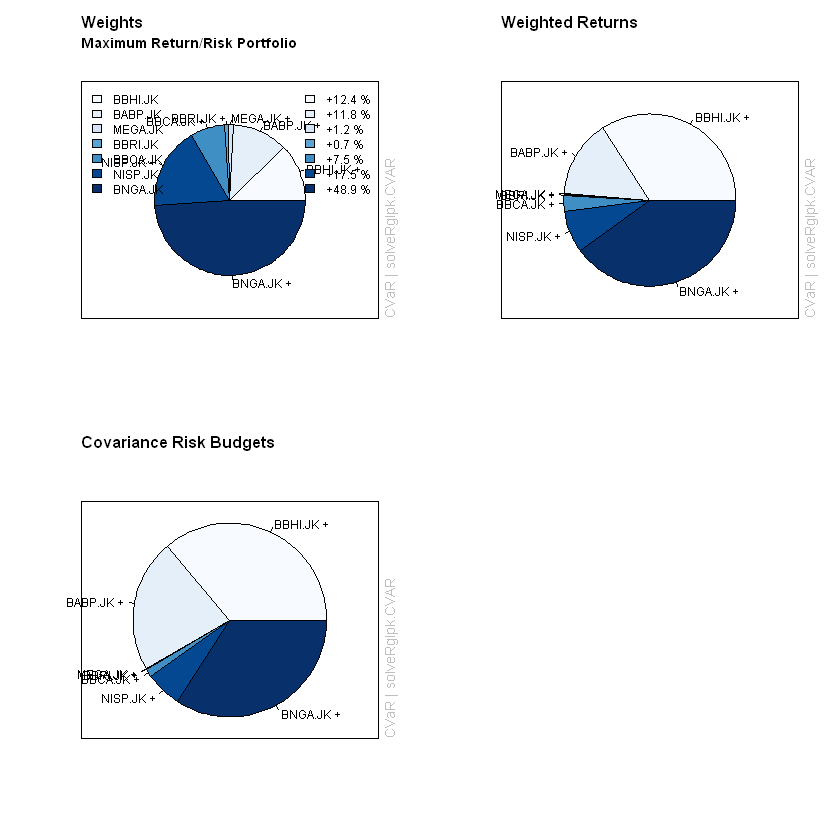

In [110]:
par(mfrow=c(2,2))
weightsPie(ratioPortfolio, radius = 0.7)
text <- "Maximum Return/Risk Portfolio"
mtext(text, side = 3, line = 1.5, font = 2, cex = 0.7, adj = 0)
weightedReturnsPie(ratioPortfolio, radius = 0.8, legend = FALSE)
covRiskBudgetsPie(ratioPortfolio, radius = 0.9, legend = FALSE)

# 8. PORTFOLIO BACKTESTING

## 8.1 Tangency vs Equal Mean Weight

In [111]:
ts_back <- cbind(ts_returns, rowMeans(ts_returns))
names(ts_back)[13] <- 'Avg'
head(ts_back)

GMT
              BBHI.JK   BABP.JK   MEGA.JK    BRIS.JK    BNLI.JK    BBTN.JK
2021-01-05  7.0707071  0.000000  0.000000 -0.4237327 -1.0000053 -0.5494509
2021-01-06  0.9433962  0.000000  0.000000  6.8085211 -2.3568982 -0.2762433
2021-01-07  0.9345794  0.000000  5.714281  7.9681217  2.4137888  0.2770085
2021-01-08 -2.3148148  2.000000 19.932438  5.5350608 -1.0100980  2.4861893
2021-01-11 -2.8436019 -1.960784 20.000000  6.2937034  1.3605430  2.9649543
2021-01-12 24.3902439  2.000000 19.953048 23.6842086  0.3355723 -0.2617736
             BBRI.JK    BBCA.JK    BBNI.JK    BDMN.JK    NISP.JK    BNGA.JK
2021-01-05 -0.928080  3.7307999  1.9607723  0.0000000 -0.6097573 -1.4705869
2021-01-06 -1.639345 -2.0451392 -1.5384619 -0.6249964 -0.6134981 -0.9950295
2021-01-07  1.904754  0.2879785  0.3906292  0.0000000  4.3209876  3.0150811
2021-01-08  2.570107  1.2203811  0.7782103  3.1446527 -3.5502947 -1.4634133
2021-01-11  5.922551  4.1844102  0.7722009  4.8780531  0.0000000 -0.4950518
2021-01-12  1.5

In [112]:
BankSpec <- portfolioSpec()
BankConstraints <- "LongOnly"
BankBacktest <- portfolioBacktest()
BankFormula <- Avg ~ BBHI.JK+BABP.JK+MEGA.JK+BRIS.JK+BNLI.JK+BBTN.JK+BBRI.JK+BBCA.JK+BBNI.JK+BDMN.JK+NISP.JK+BNGA.JK 

In [113]:
BankPortfolios <- portfolioBacktesting(formula = BankFormula,
                                      data = ts_back, spec = BankSpec, 
                                      constraints = BankConstraints,
                                      backtest = BankBacktest, trace = FALSE)

In [119]:
Weights <- round(100 * BankPortfolios$weights, 2)
setSmootherLambda(BankPortfolios$backtest) <- "3m"
BankSmoothPortfolios <- portfolioSmoothing(object = BankPortfolios,trace = FALSE)
smoothWeights <- round(100 * BankSmoothPortfolios$smoothWeights,2)

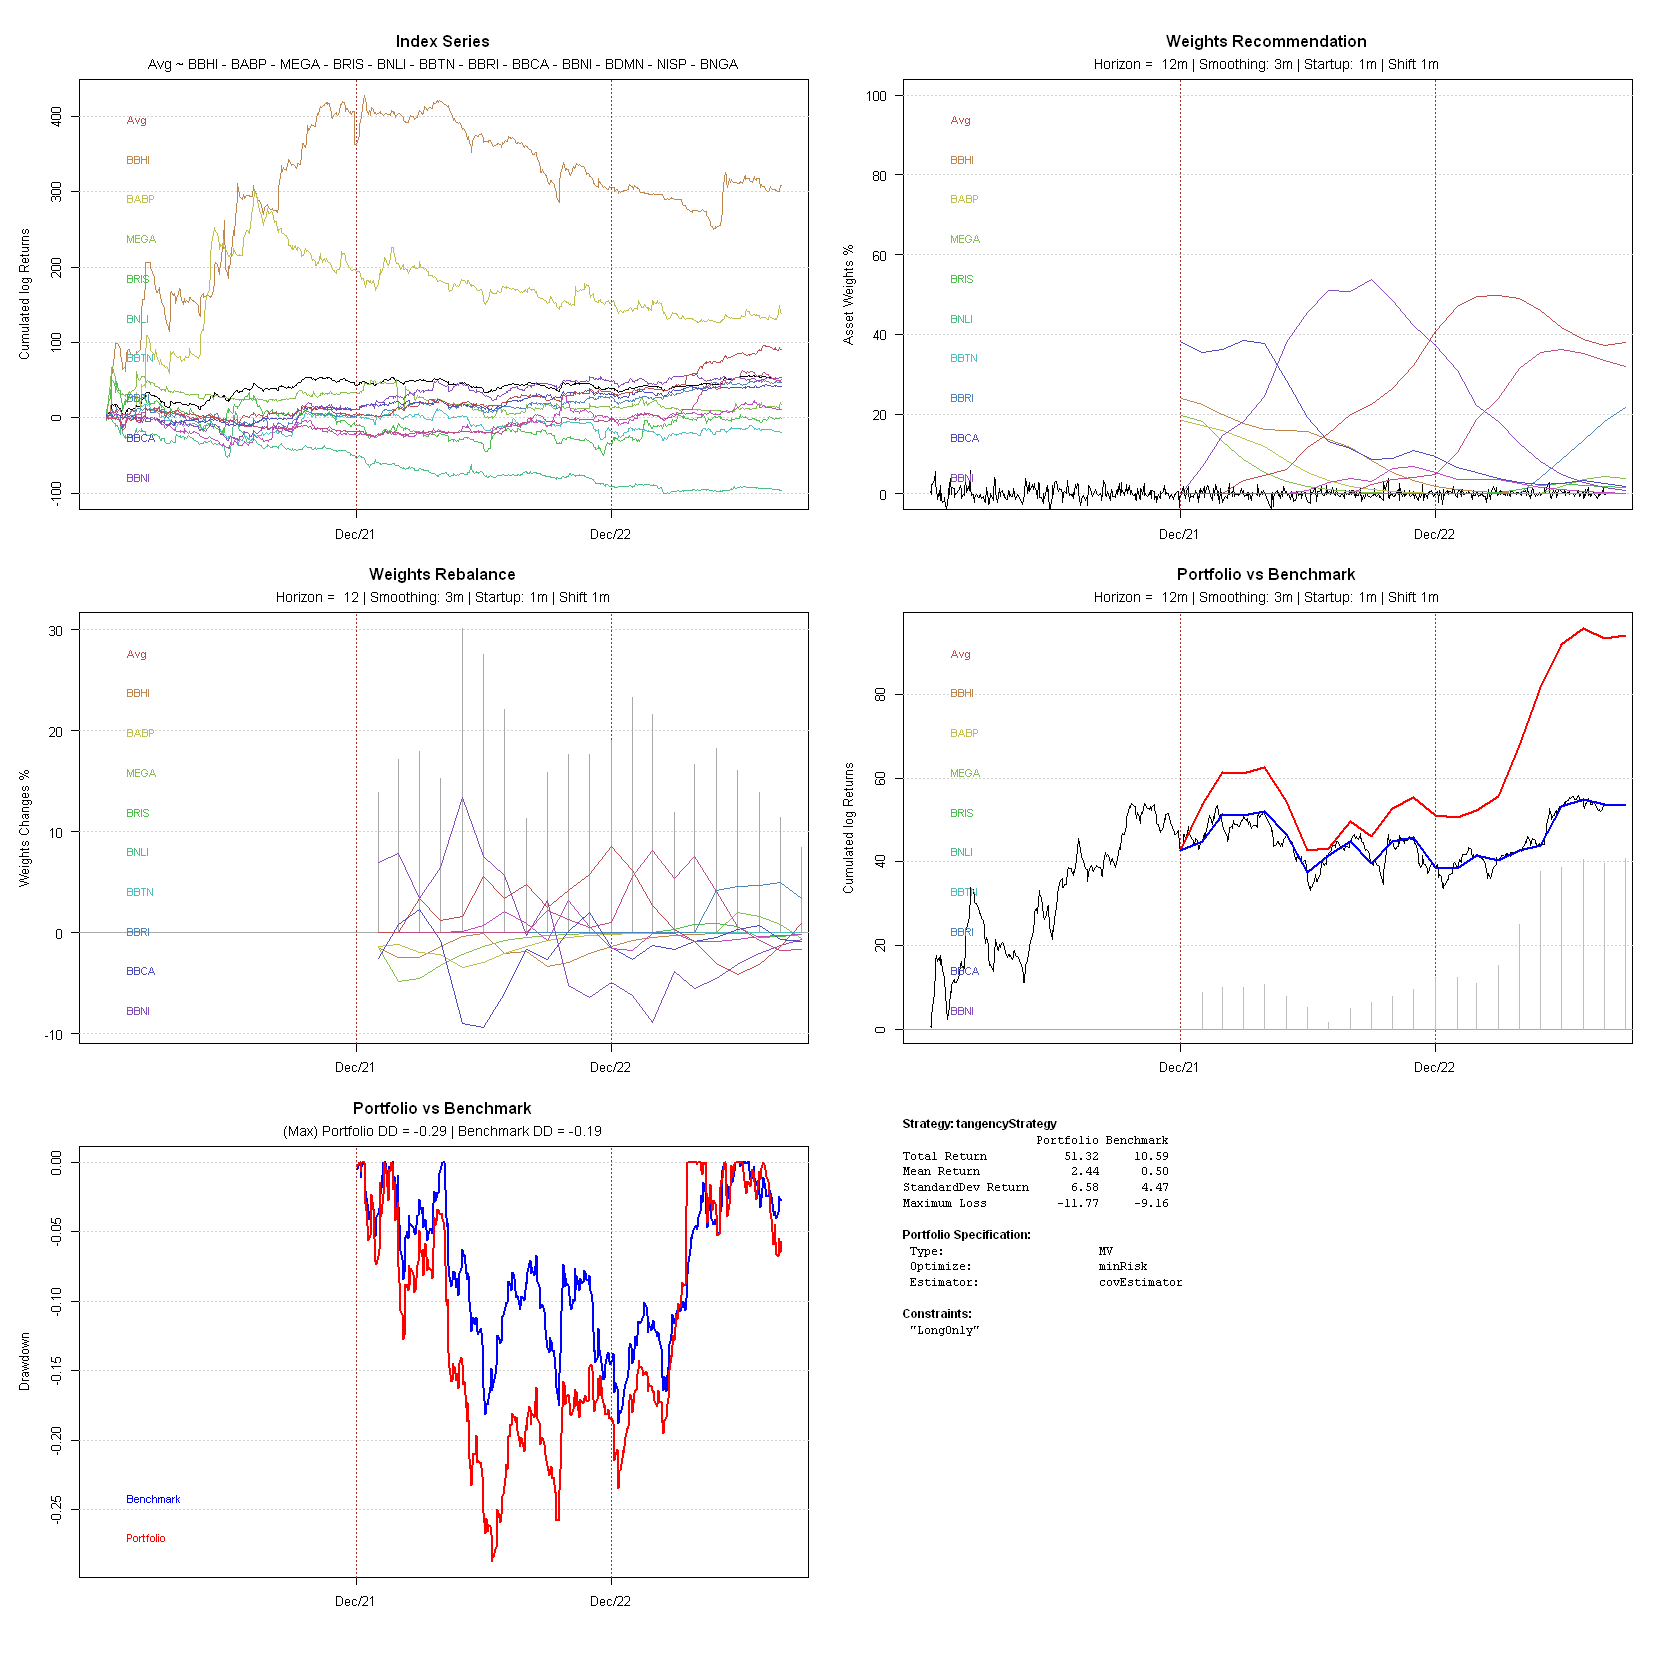

In [118]:
options(repr.plot.width=14, repr.plot.height=14)
backtestPlot(BankSmoothPortfolios, cex = 0.6, font = 1, family = "mono")


## 8.2 Tangency vs JKFINA

In [120]:
ticker <- c('^JKFINA')
benchmark <-getSymbols.yahoo(ticker, from='2021-01-01',periodicity='daily', auto.assign=FALSE)[, 6]
colSums(is.na(benchmark))

Warning message:
"^JKFINA contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."


JKFINA.Adjusted 
              1

In [127]:
benchmark_returns<- returns(timeSeries(na.approx(benchmark)), method='simple')*100
tail(benchmark_returns)

GMT
           JKFINA.Adjusted
2023-08-25     -0.13085685
2023-08-28      0.15086196
2023-08-29      0.05657111
2023-08-30     -0.24172135
2023-08-31      0.61144996
2023-09-01     -0.26760341

In [128]:
ts_back2 <- cbind(ts_returns, FINA= benchmark_returns)
head(ts_back2)

GMT
              BBHI.JK   BABP.JK   MEGA.JK    BRIS.JK    BNLI.JK    BBTN.JK
2021-01-05  7.0707071  0.000000  0.000000 -0.4237327 -1.0000053 -0.5494509
2021-01-06  0.9433962  0.000000  0.000000  6.8085211 -2.3568982 -0.2762433
2021-01-07  0.9345794  0.000000  5.714281  7.9681217  2.4137888  0.2770085
2021-01-08 -2.3148148  2.000000 19.932438  5.5350608 -1.0100980  2.4861893
2021-01-11 -2.8436019 -1.960784 20.000000  6.2937034  1.3605430  2.9649543
2021-01-12 24.3902439  2.000000 19.953048 23.6842086  0.3355723 -0.2617736
             BBRI.JK    BBCA.JK    BBNI.JK    BDMN.JK    NISP.JK    BNGA.JK
2021-01-05 -0.928080  3.7307999  1.9607723  0.0000000 -0.6097573 -1.4705869
2021-01-06 -1.639345 -2.0451392 -1.5384619 -0.6249964 -0.6134981 -0.9950295
2021-01-07  1.904754  0.2879785  0.3906292  0.0000000  4.3209876  3.0150811
2021-01-08  2.570107  1.2203811  0.7782103  3.1446527 -3.5502947 -1.4634133
2021-01-11  5.922551  4.1844102  0.7722009  4.8780531  0.0000000 -0.4950518
2021-01-12  1.5

In [131]:
spiSpec <- portfolioSpec()
spiConstraints <- "LongOnly"
spiBacktest <- portfolioBacktest()
spiFormula <-FINA ~ BBHI.JK+BABP.JK+MEGA.JK+BRIS.JK+BNLI.JK+BBTN.JK+BBRI.JK+BBCA.JK+BBNI.JK+BDMN.JK+NISP.JK+BNGA.JK 

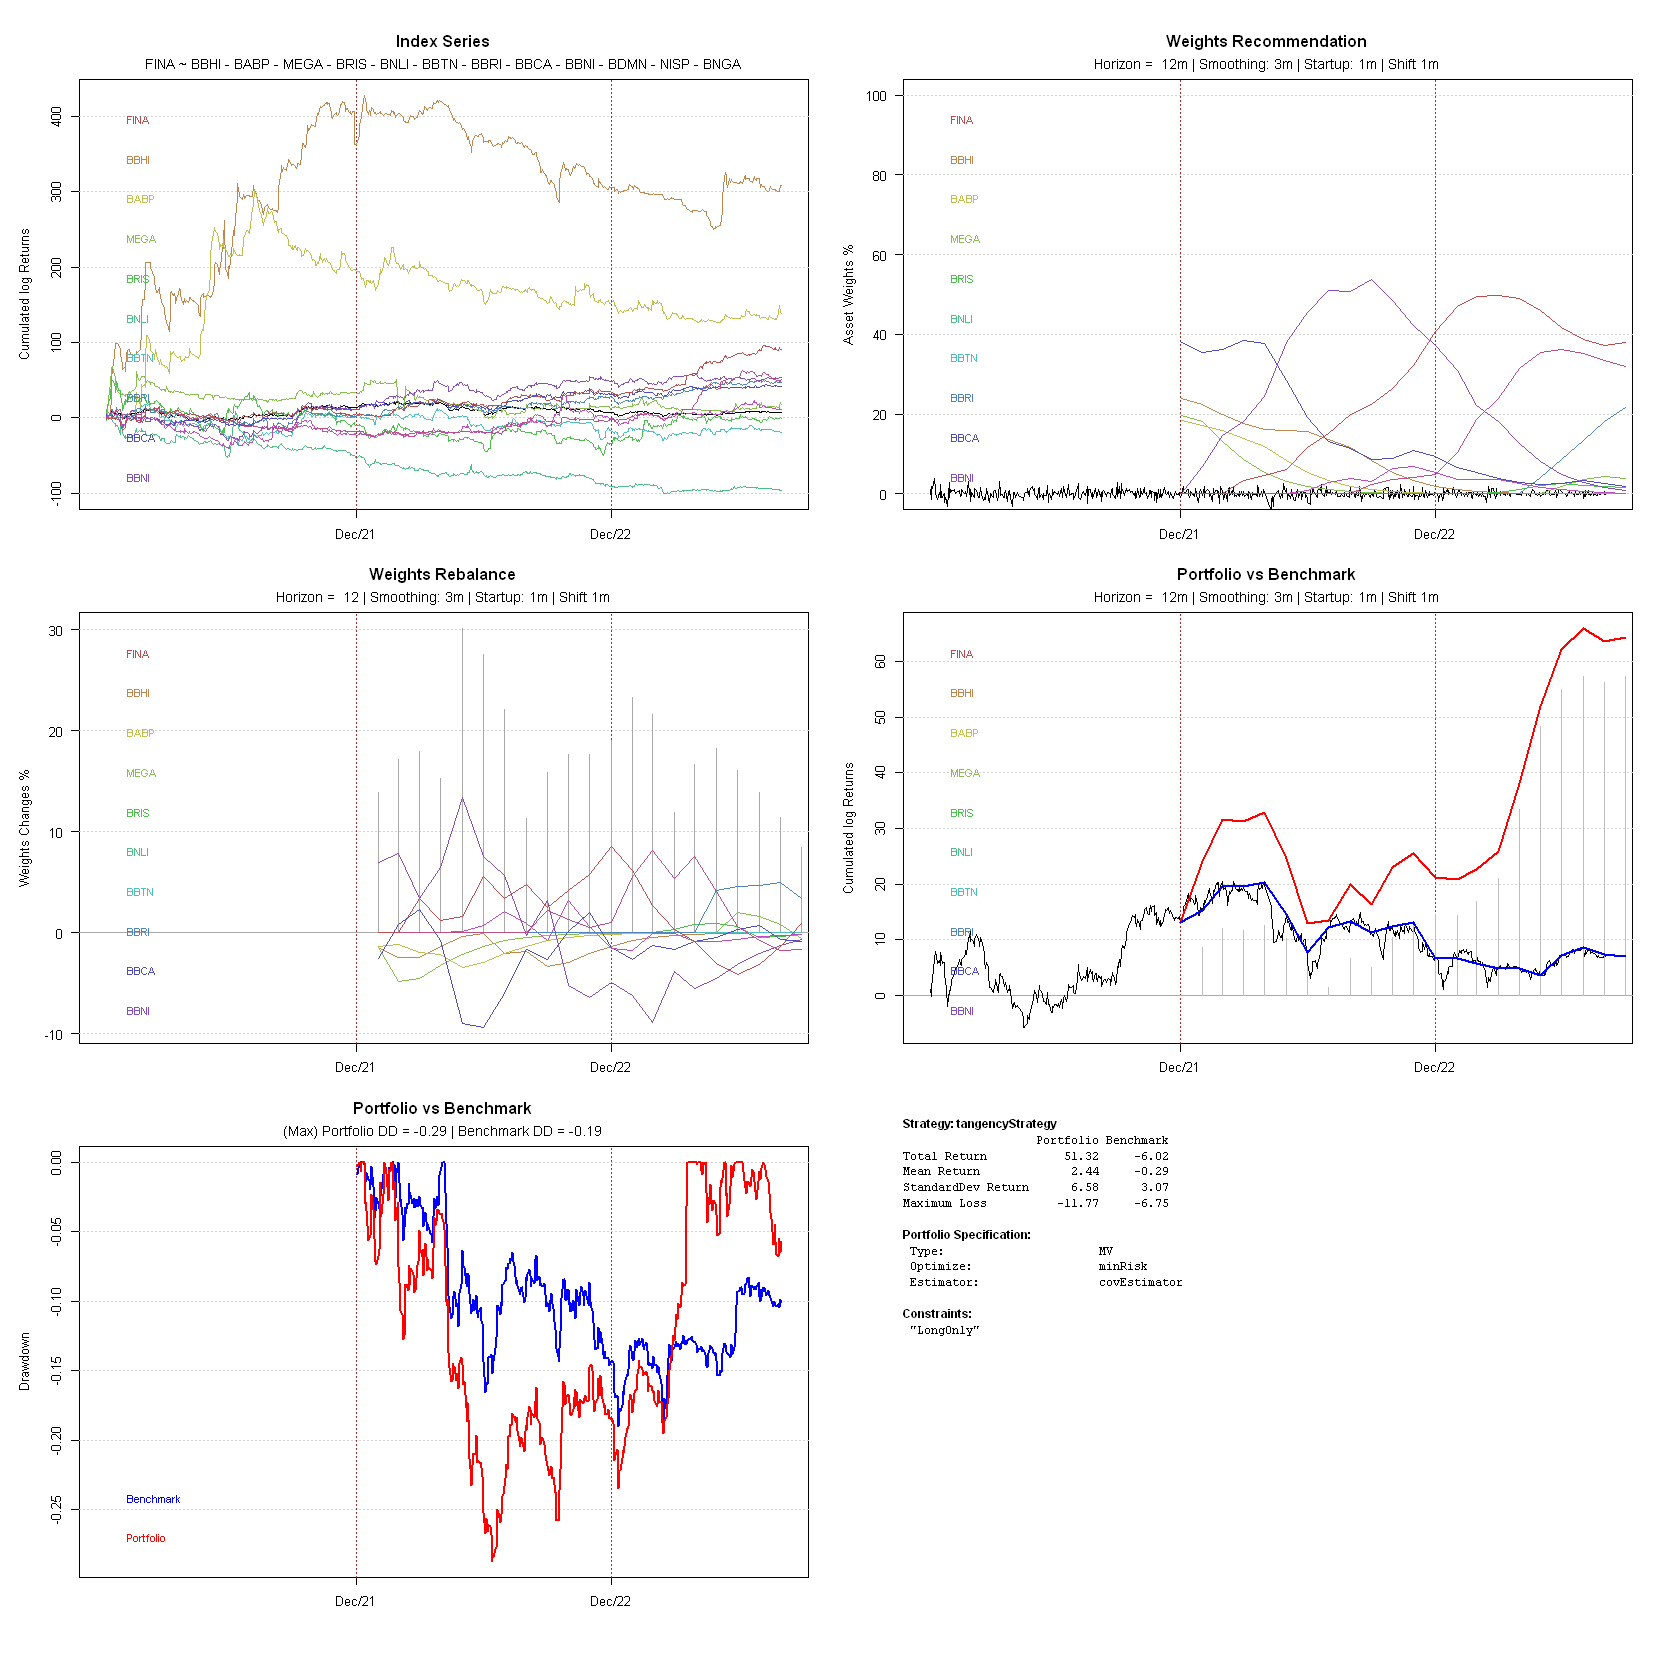

In [132]:
options(repr.plot.width=14, repr.plot.height=14)
spiPortfolios <- portfolioBacktesting(formula = spiFormula,
                                      data = ts_back2, spec = spiSpec, 
                                      constraints = spiConstraints,
                                      backtest = spiBacktest, trace = FALSE)
Weights <- round(100 * spiPortfolios$weights, 2)[1:12, ]
setSmootherLambda(spiPortfolios$backtest) <- "3m"
spiSmoothPortfolios <- portfolioSmoothing(object = spiPortfolios,trace = FALSE)
smoothWeights <- round(100 * spiSmoothPortfolios$smoothWeights,2)[1:12, ]
backtestPlot(spiSmoothPortfolios, cex = 0.6, font = 1, family = "mono")

## 8.3 Static Simulation of Tangency Portfolio on the Unseen Data

In [144]:
static_dat <- window(ts_returns, '2023-01-01', '2023-05-12')

In [152]:
tgPortfolio_static<- tangencyPortfolio(data = static_dat,
                                 spec = tgSpec,
                                 constraints = "LongOnly")
print(tgPortfolio)


Title:
 MV Tangency Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0000  0.0000  0.0965  0.1385  0.0000  0.0000  0.0423  0.0000  0.0000  0.0000 
NISP.JK BNGA.JK 
 0.4914  0.2313 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0000  0.0000 -0.0016  0.1486  0.0000  0.0000  0.0131  0.0000  0.0000  0.0000 
NISP.JK BNGA.JK 
 0.5994  0.2405 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.4161 1.1628 1.7792 1.0285 

Description:
 Mon Sep  4 10:38:35 2023 by user: Kevin 


In [153]:
getWeights(tgPortfolio_static)

BBHI.JK    BABP.JK    MEGA.JK    BRIS.JK    BNLI.JK    BBTN.JK    BBRI.JK 
0.00000000 0.00000000 0.09652846 0.13854618 0.00000000 0.00000000 0.04230374 
   BBCA.JK    BBNI.JK    BDMN.JK    NISP.JK    BNGA.JK 
0.00000000 0.00000000 0.00000000 0.49137016 0.23125145

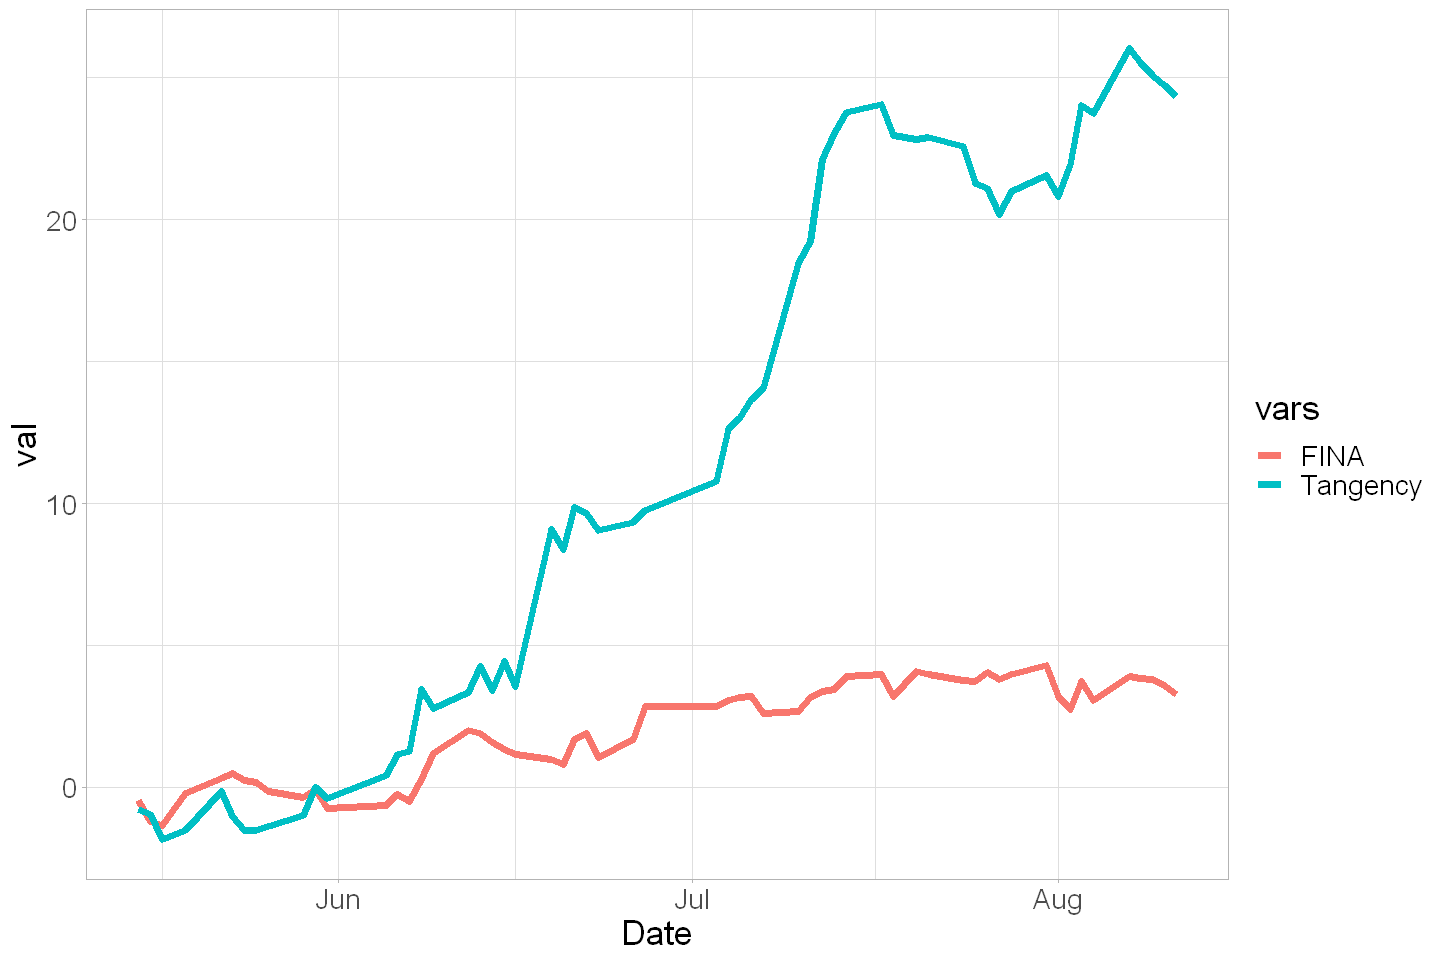

In [155]:
options(repr.plot.width=12, repr.plot.height=8)
test_dat <- window(ts_returns, '2023-05-13', '2023-08-13')
test_dat_result <-rowSums(test_dat*getWeights(tgPortfolio_static))
bench_result<-window(benchmark_returns, '2023-05-13', '2023-08-13')
cbind(Tangency=(cumprod(test_dat_result/100 +1)-1)*100, FINA = (cumprod(bench_result/100 +1)-1)*100)   %>% data.frame()  %>% mutate(Date=as.Date(rownames(.)))  %>% gather('vars','val', -Date)  %>% 
ggplot(aes(Date, val, group=vars, color=vars)) + geom_line(lwd=2)  + theme_light() + theme(text=element_text(size=21))

# 9.  Monthly CAPM 

For the purpose of demonstration, I assume the risk free rate is 6.8%. Real data of indonesian goverment yield is very cumbersome to access.

## 9.1 Gettingn the data

In [193]:
rfrate<- 6.8/100/12
rfrate

[1] 0.005666667

In [210]:
tickers <- c('BBCA.JK','BBRI.JK', 'BRIS.JK', 'MEGA.JK', 'BBTN.JK', 'BBHI.JK',
             'BABP.JK', 'BBNI.JK', 'NISP.JK', 'BDMN.JK', 'BNGA.JK', 'BNLI.JK')
portfolioPrices <- NULL
for(ticker in tickers){
    portfolioPrices <- cbind(portfolioPrices,getSymbols.yahoo(ticker, from='2021-01-01',
                                            periodicity='monthly', auto.assign=FALSE)[, 6])
}
ts <- timeSeries(na.approx(portfolioPrices),units= tickers)
ts_returns<- returns(ts, method='simple')

In [194]:
ticker <- c('^JKSE')
jkse <-getSymbols.yahoo(ticker, from='2021-01-01',periodicity='monthly', auto.assign=FALSE)[, 6]
jkse<- returns(timeSeries(na.approx(benchmark)), method='simple')
tail(jkse)

GMT
           JKSE.Adjusted
2023-03-31   0.016228431
2023-04-30  -0.040842423
2023-05-31   0.004314269
2023-06-30   0.040451048
2023-07-31   0.003159680
2023-08-31   0.003508289

In [213]:
summary(jkse)

Start Record: 2021-01-31 
End Record:   2023-08-31 
Observations: 32 
Format:       %Y-%m-%d 
FinCenter:    GMT 

 JKSE.Adjusted      
 Min.   :-0.041058  
 1st Qu.:-0.006168  
 Median : 0.005018  
 Mean   : 0.005745  
 3rd Qu.: 0.017726  
 Max.   : 0.064726

## 9.2 Calculating distribution of beta

In [249]:
estimate_capm_beta<- function(data) {
    data <- data.frame(data)
    fit <- lm(ret_excess ~ mkt_excess, data = data)
    beta <- as.numeric(coefficients(fit)[2])
    beta
}

In [271]:
estimate_capm_alpha<- function(data) {
    data <- data.frame(data)
    fit <- lm(ret_excess ~ mkt_excess, data = data)
    alpha <- as.numeric(coefficients(fit)[1])
    alpha
}

In [256]:
by <- periods(time(ts_returns), "7m","2m")
by

$from
GMT
 [1] [2021-01-01] [2021-03-01] [2021-05-01] [2021-07-01] [2021-09-01]
 [6] [2021-11-01] [2022-01-01] [2022-03-01] [2022-05-01] [2022-07-01]
[11] [2022-09-01] [2022-11-01] [2023-01-01]

$to
GMT
 [1] [2021-07-31] [2021-09-30] [2021-11-30] [2022-01-31] [2022-03-31]
 [6] [2022-05-31] [2022-07-31] [2022-09-30] [2022-11-30] [2023-01-31]
[11] [2023-03-31] [2023-05-31] [2023-07-31]

attr(,"control")
GMT
       start          end 
[2021-01-31] [2023-08-31] 

In [274]:
dist_beta<-sapply(1:length(tickers), function(tick){
    data <- cbind(ts_returns[,tick]-rfrate , jkse-rfrate)  %>% data.frame()
    names(data) <- c('ret_excess', 'mkt_excess')
    dat_s <- as.timeSeries(data)
    sapply(1:length(by$from), function(x) estimate_capm_beta(window(dat_s,by$from[x],by$to[x] )))
})%>% data.frame()

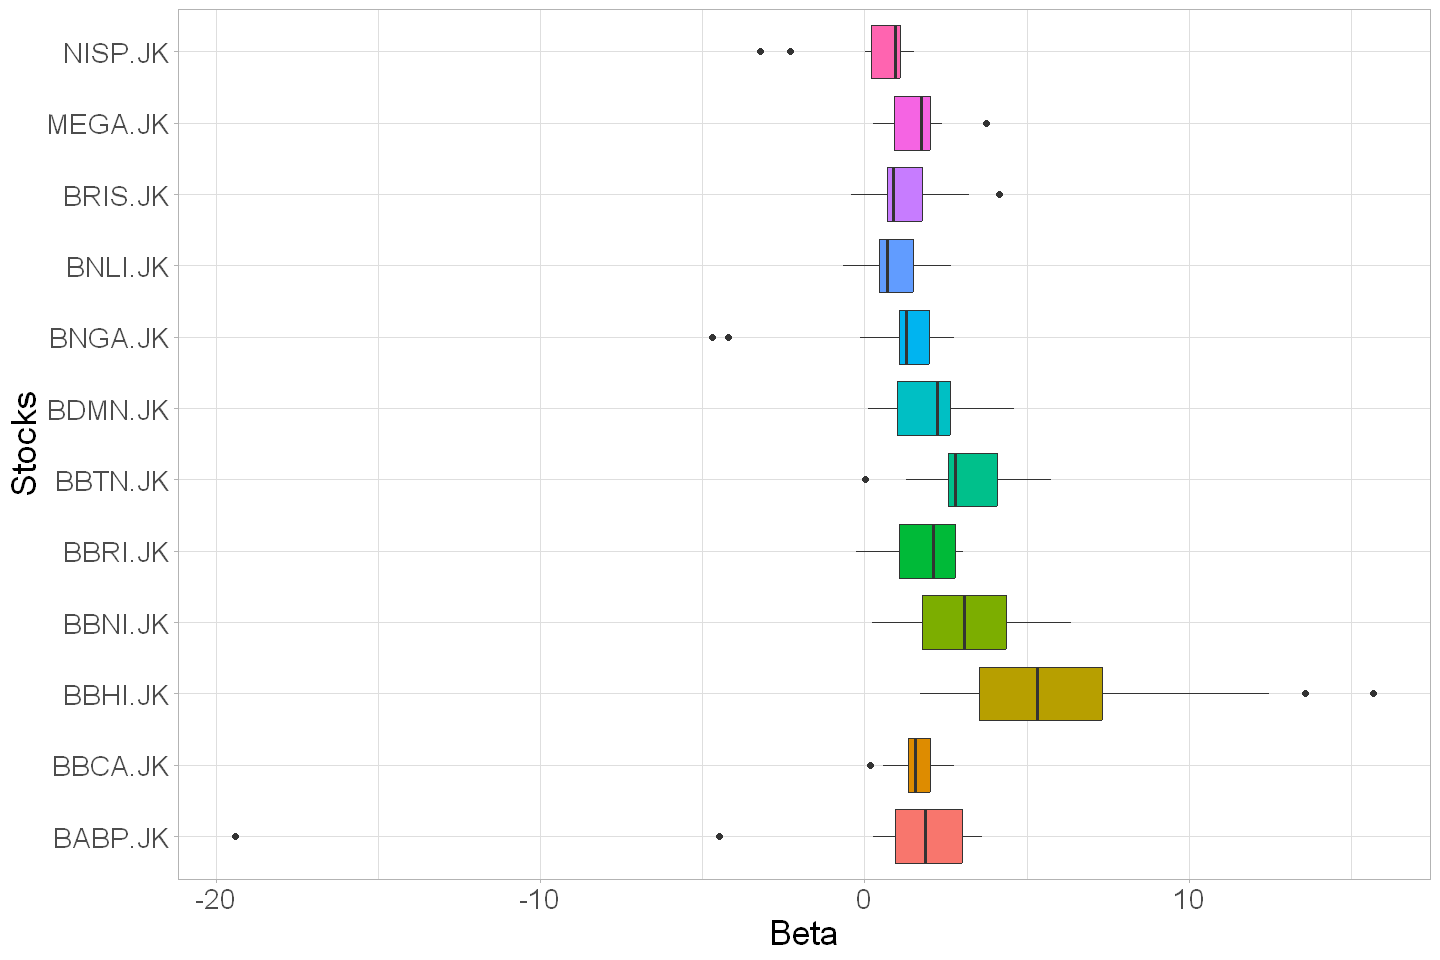

In [275]:
names(dist_beta) <-names(ts_returns)
dist_beta  %>%  gather('var', 'val')  %>% ggplot(aes(val, y=var, group=var, fill=var)) + geom_boxplot()+
theme_light() + theme(text=element_text(size=21)) +  theme(legend.position = "none") + labs(x='Beta', y='Stocks')

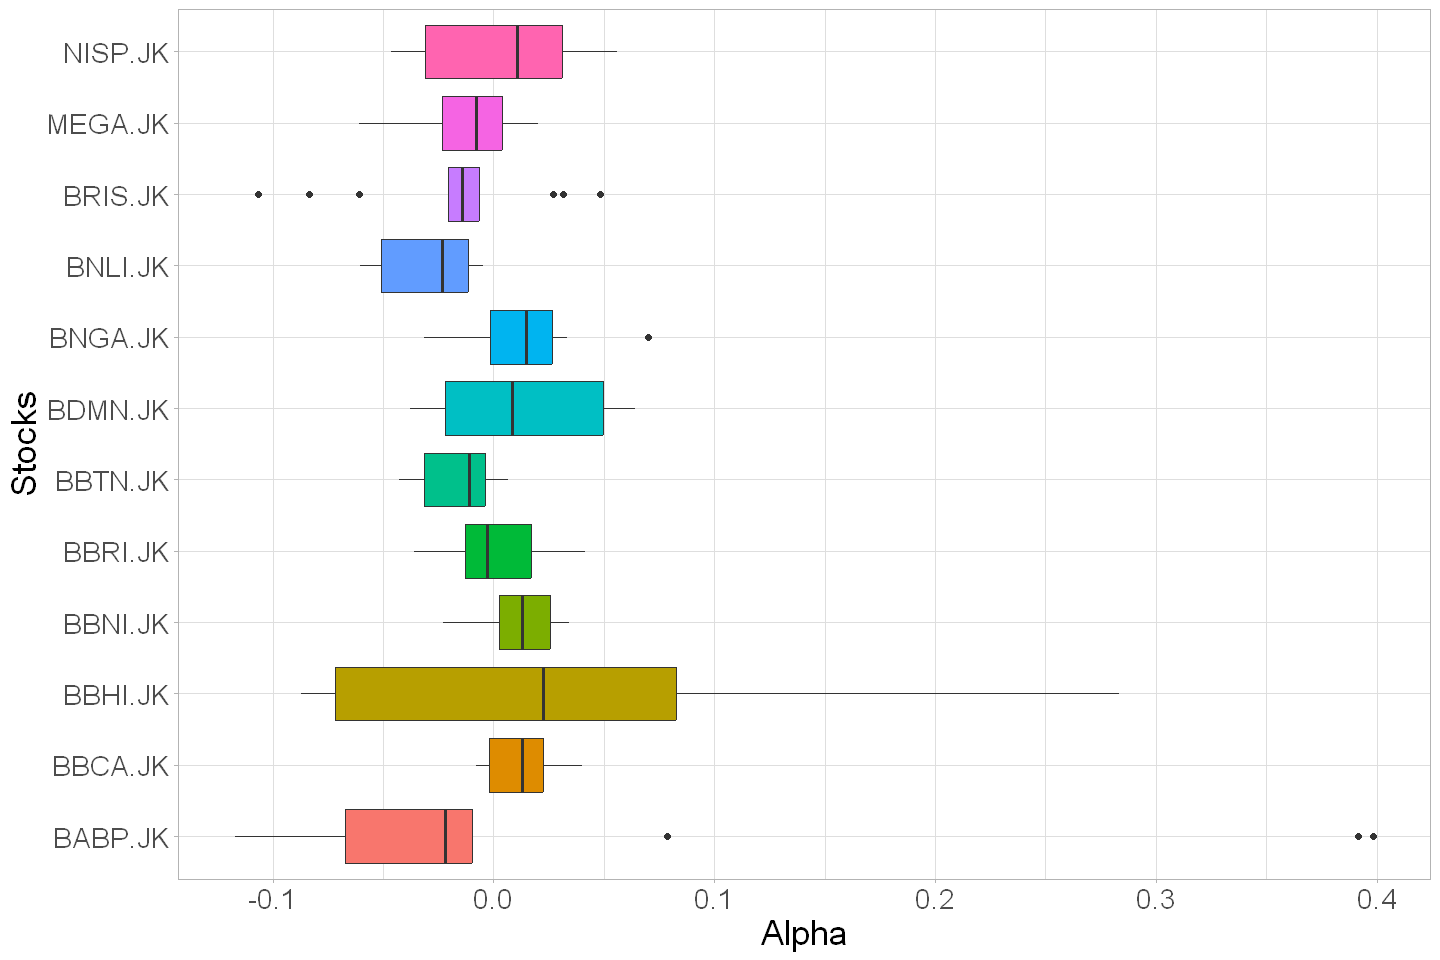

In [276]:
dist_alpha<-sapply(1:length(tickers), function(tick){
    data <- cbind((ts_returns[,tick])-rfrate , jkse-rfrate)  %>% data.frame()
    names(data) <- c('ret_excess', 'mkt_excess')
    dat_s <- as.timeSeries(data)
    sapply(1:length(by$from), function(x) estimate_capm_alpha(window(dat_s,by$from[x],by$to[x] )))
})%>% data.frame()
names(dist_alpha) <-names(ts_returns)
dist_alpha  %>%  gather('var', 'val')  %>% ggplot(aes(val, y=var, group=var, fill=var)) + geom_boxplot()+
theme_light() + theme(text=element_text(size=21)) +  theme(legend.position = "none") + labs(x='Alpha', y='Stocks')

## 9.3 Fama french emerging market (just getting the data)

In [290]:
emerging_ff <- download_french_data("Fama/French Emerging 5 Factors")
emerging_ff <- emerging_ff$subsets$data[[1]] %>% 
mutate(month = floor_date(ymd(str_c(date, "01")), "month"))  %>% 
data.frame() %>% dplyr::filter(month <= ymd("2023-8-31") & month >= ymd("1960-01-01"))
tail(emerging_ff)

New names:
• `` -> `...1`
New names:
• `` -> `...1`


date   Mkt.RF SMB   HML   RMW   CMA   RF   month     
404 202302 -5.67   2.21  0.97  0.73  1.70 0.34 2023-02-01
405 202303  2.26  -2.17 -1.27  0.88 -1.15 0.36 2023-03-01
406 202304 -0.73   1.52  5.05 -1.50  3.32 0.35 2023-04-01
407 202305 -1.45   0.72  0.87 -0.06  1.05 0.36 2023-05-01
408 202306  3.71   0.06  1.56 -0.61  0.34 0.40 2023-06-01
409 202307  5.36  -1.81  1.48 -1.03  0.97 0.45 2023-07-01

# 10. Other Projects

## 10.1 Price movement after EPS date

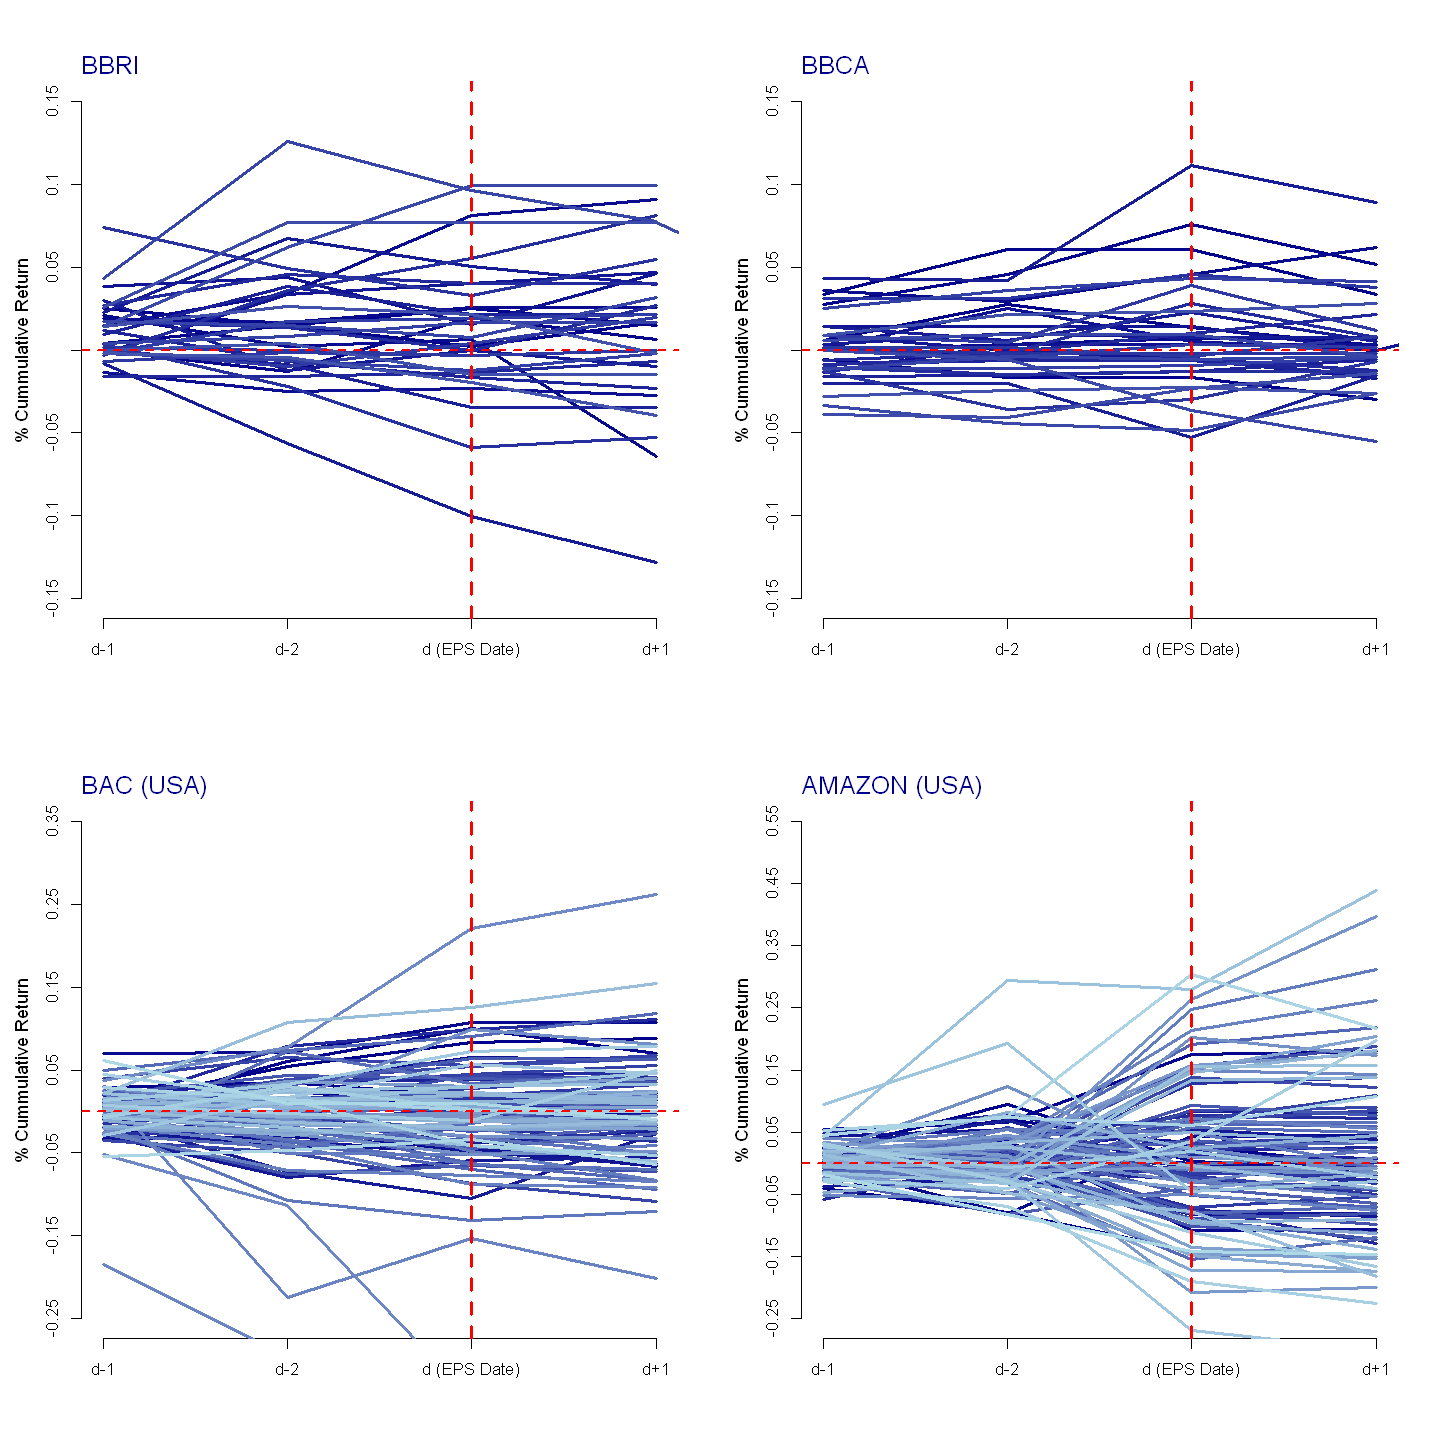

## 10.2 The danger of EXTRAPOLATION on the UNSEEN data: Overfitting? Should we keeep predicting? Is ensemble method promising?

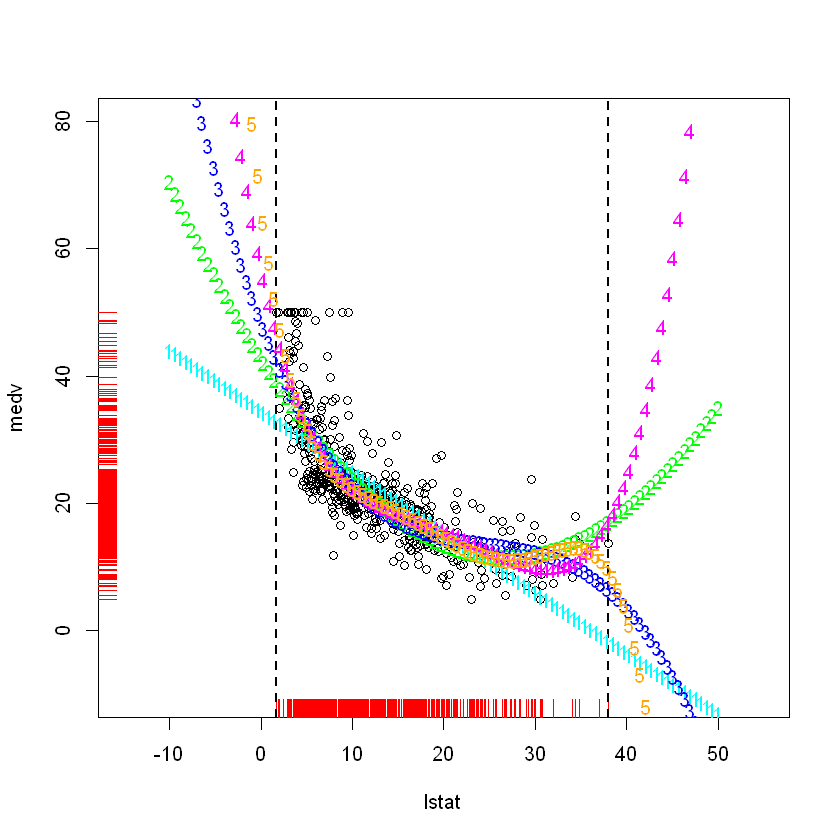

## 10.3 Exploring Free API (Yahoo Query)

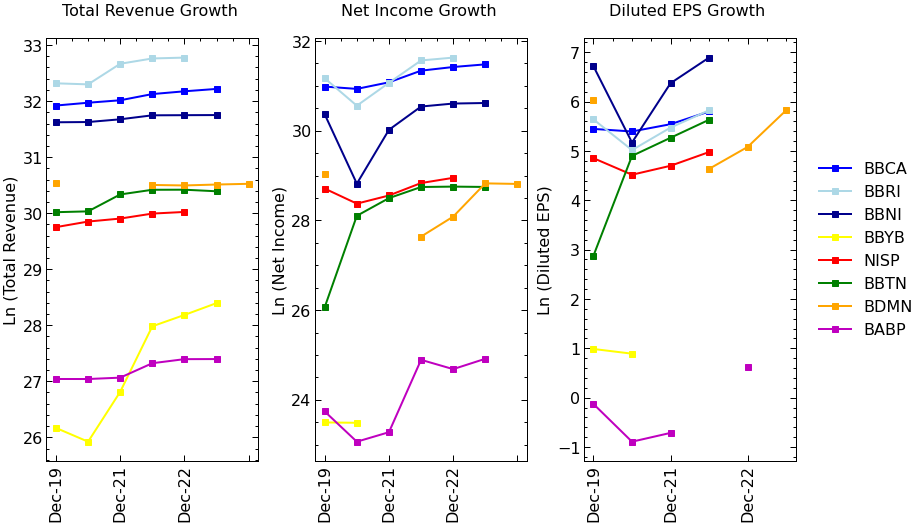

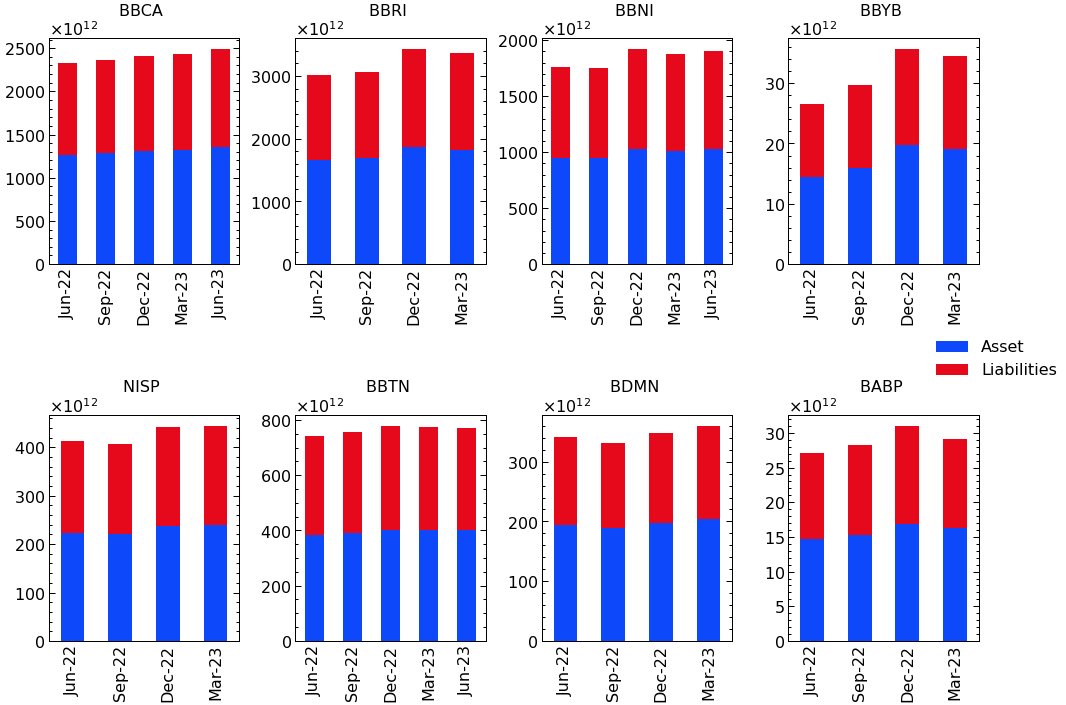